# House Prices Prediction (Regression)

## Tools

Add the tools that need to be imported.

In [413]:
# Packages
! pip install xgboost

In [414]:
# Libraries
import sys
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Models
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LassoLars
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor



# Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier

## Data

The area where all the data is worked on.

#### SubCategories:
* Imports
* Training
> 1. Handling Missing Values
> 2. Convert Categorical to Numerical
> 3. Feature Engineering
> 4. Feature Importance
* Testing
> 1. Filtering out the Numeric and Categorical columns
> 2. Handling Missing Values in Numerical Columns
> 3. Handling Missing Values in the Categorical Columns
> 4. Converting Categorical into Numerical

### Imports

In [415]:
# Import training set
df_train = pd.read_csv('data/train.csv')

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [416]:
# Import the testing set
df_test = pd.read_csv('data/test.csv')

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Training

In [417]:
# Check the Na
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [418]:
# Check the Info sheet
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Things to be noted so far : 
* Some column has missing values 
* Find out the Integer column which has missing values try to replace with mean or median, wont be optimal though. 
* For Categorical Column gotta do Pandas Dummy or OneHot Encoding or ColumnTransformerer

#### 1. Handling Missing Values (train)


In [419]:
df_train.loc[:, df_train.dtypes == np.object]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [420]:
# Check where is the NaN
nan_cols = [i for i in df_train.columns if df_train[i].isna().any()]
for cols in nan_cols:
    print(f'{str(cols)}: {int(len(cols))}')

LotFrontage: 11
Alley: 5
MasVnrType: 10
MasVnrArea: 10
BsmtQual: 8
BsmtCond: 8
BsmtExposure: 12
BsmtFinType1: 12
BsmtFinType2: 12
Electrical: 10
FireplaceQu: 11
GarageType: 10
GarageYrBlt: 11
GarageFinish: 12
GarageQual: 10
GarageCond: 10
PoolQC: 6
Fence: 5
MiscFeature: 11


In [421]:
# Create a database with the missing values count
missing_val_count_by_column = (df_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [422]:
# Create a copy of the training dataset
df_copy = df_train.copy()

In [423]:
# Set up a numeric and a categorical dataframe
num_df_train = df_train.select_dtypes(np.number)
cat_df_train = df_train.select_dtypes('O')

In [424]:
num_train_col = []
for i in num_df_train.columns:
    num_train_col.append(i)
print(num_train_col)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [425]:
cat_train_col = []
for col in cat_df_train.columns:
    cat_train_col.append(col)
print(cat_train_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Fill in the missing numerical columns
* LotFrontage  
* MasVnrArea 
* GarageYrBlt

In [426]:
# Fill the Na in the numerical columns

df_copy['LotFrontage'].fillna(df_copy['LotFrontage'].mean() , inplace=True)
df_copy['MasVnrArea'].fillna(df_copy['MasVnrArea'].mean() , inplace=True)
df_copy['GarageYrBlt'].fillna(df_copy['GarageYrBlt'].mean() , inplace=True)

Filling in the missing categorical columns 

* MasVnrType , 
* BsmtQual         
* BsmtCond         
* BsmtExposure     
* BsmtFinType1     
* BsmtFinType2     
* Electrical        
* FireplaceQu     
* GarageType  
* GarageFinish     
* GarageQual       
* GarageCond   
* PoolQC 
* Fence  
* MiscFeature 
* Alley

In [427]:
# Describe the Categories with Nan values

describe_cat_train = []

describe_cat_train = [
    
df_copy['MasVnrType'].unique() # They didnt add the Masonry veneer type which is why nan
,
df_copy['BsmtQual'].unique() # Replace nan with NA which means No basement
,
df_copy['BsmtCond'].unique() # Replace nan with NA which means No basement
,
df_copy['BsmtExposure'].unique() # Replace nan with NA which means No basement
,
df_copy['BsmtFinType1'].unique() # Replace nan with NA which means No basement
,
df_copy['BsmtFinType2'].unique() # Replace nan with NA which means No basement
,
df_copy['Electrical'].unique()
##### Two options here #####
# 1. Either drop 1 row
# 2. Fill in with mode which is most frequent value 
,
df_copy['FireplaceQu'].unique() # Replace nan with NA which means No fireplace
,
df_copy['GarageType'].unique()# Replace nan with NA which means No garage
,
df_copy['GarageFinish'].unique() # Replace nan with NA which means No garage
,
df_copy['GarageCond'].unique() # Replace nan with NA which means No garage
,
df_copy['GarageQual'].unique()# Replace nan with NA which means No garage
]


describe_cat_train

[array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object),
 array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object),
 array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object),
 array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object),
 array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object),
 array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object),
 array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object),
 array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object),
 array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
       dtype=object),
 array(['RFn', 'Unf', 'Fin', nan], dtype=object),
 array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object),
 array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)]

In [428]:
na_train_col = ['Electrical' , 'MasVnrType']

replace_col_train = ['GarageQual' , 'GarageCond' , 'GarageFinish' , 'GarageType' , 
              'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'BsmtCond',
              'BsmtQual' , 'PoolQC', 'Fence' , 'MiscFeature' , 'Alley', 'FireplaceQu']

In [429]:
for col in replace_col_train:
    if col in na_train_col:
        df_copy[col].replace(np.nan , 'NA' , inplace=True)
    else:
        df_copy[col].replace(np.nan , 'NO' , inplace=True)

# Masnory Veener Type isnt added so lets put them NA - not added 
df_copy['MasVnrType'].replace(np.nan , 'NA' , inplace=True)

In [430]:
for col in na_train_col: 
    df_copy[col].replace(np.nan , 'NA' , inplace=True)

In [431]:
# No missing values in entire train df
missing_val_count_df = (df_copy.isnull().sum())
print(missing_val_count_df[missing_val_count_df > 0])

Series([], dtype: int64)


#### 2. Convert Categorical to Numerical

In [432]:
object_df = df_copy.select_dtypes('O')

In [433]:
num_df = df_copy.select_dtypes(np.number)
num_df.shape

(1460, 38)

In [434]:
num_df.drop('Id' , axis=1 , inplace=True)

C:\Users\Rudi\Documents\DataScience\House_Prices\env\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [435]:
# Making a list of categorical features 
categorical_features = []
for cols in object_df.columns:
    categorical_features.append(cols)
print(categorical_features)
print(len(categorical_features))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


In [436]:
df_copy.drop('Id' , axis=1 , inplace=True)

In [437]:
# Splitting into X and y 
X = df_copy.drop('SalePrice' , axis=1)
y = df_copy['SalePrice']

In [438]:
# Encoding the categorical features 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot ,
                                  categorical_features)],
                               remainder='passthrough')
X = transformer.fit_transform(X)

In [439]:
X = X.toarray()

In [440]:
# Another way 
df_dummy = pd.get_dummies(df_copy[categorical_features])

#### 3. Feature Engineering

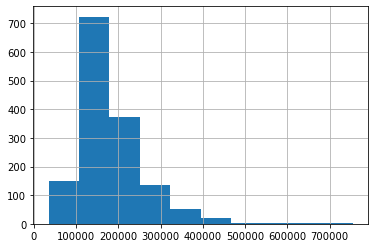

In [441]:
# Check the distribution of SalePrice

df_copy['SalePrice'].hist()

In [442]:
# Create a new copy of the training dataframe
df_new = df_copy.copy()

The column is MSSubClass


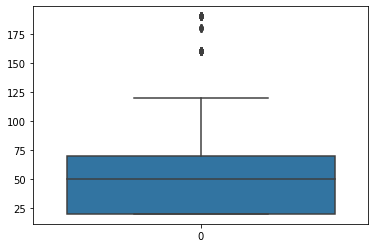

The column is LotFrontage


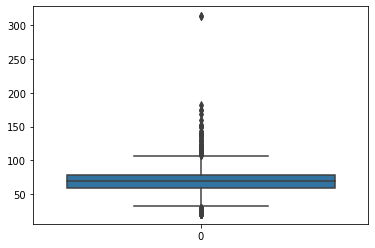

The column is LotArea


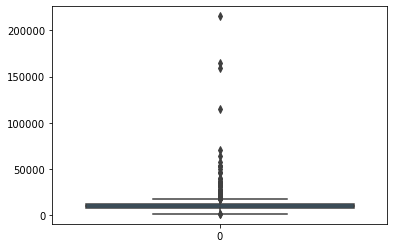

The column is OverallQual


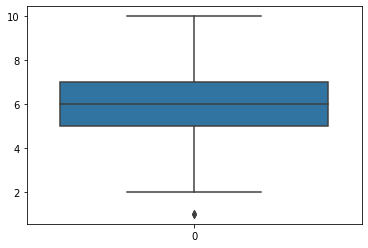

The column is OverallCond


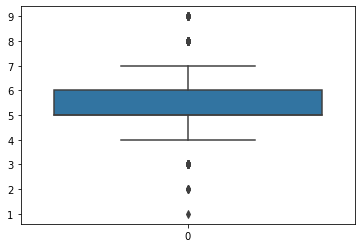

The column is YearBuilt


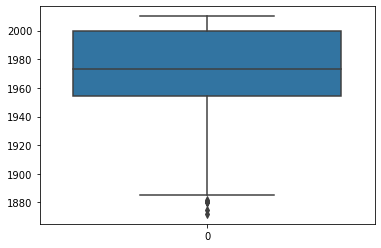

The column is YearRemodAdd


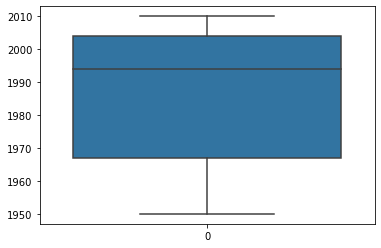

The column is MasVnrArea


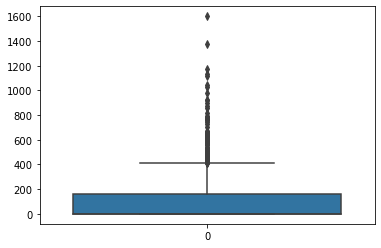

The column is BsmtFinSF1


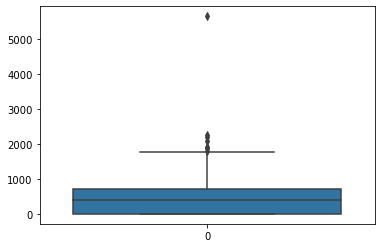

The column is BsmtFinSF2


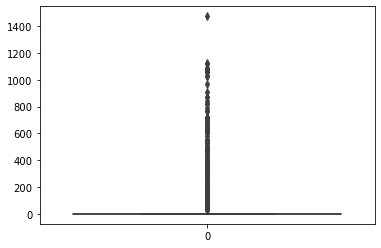

The column is BsmtUnfSF


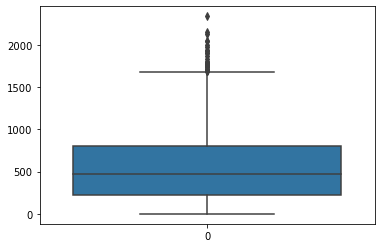

The column is TotalBsmtSF


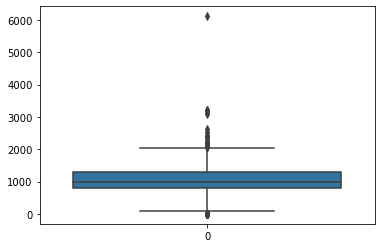

The column is 1stFlrSF


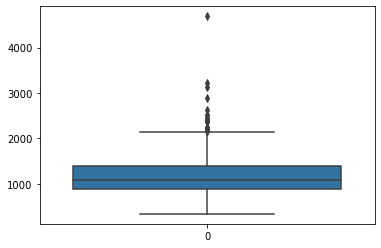

The column is 2ndFlrSF


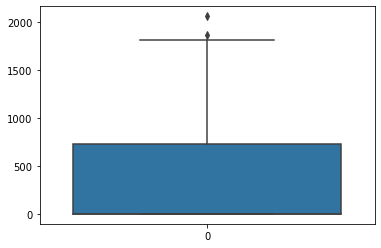

The column is LowQualFinSF


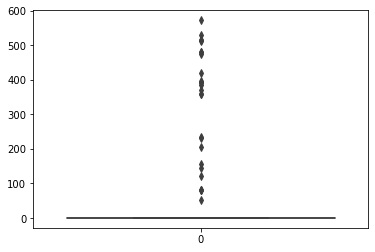

The column is GrLivArea


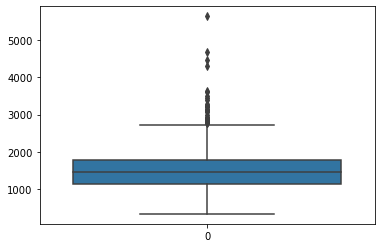

The column is BsmtFullBath


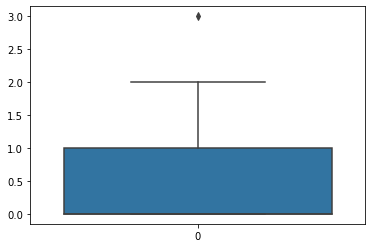

The column is BsmtHalfBath


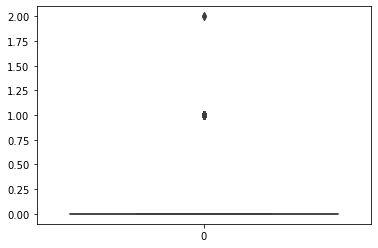

The column is FullBath


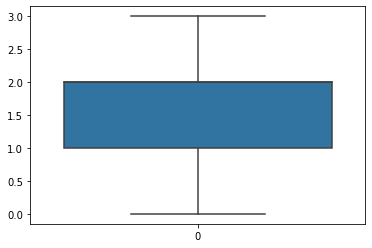

The column is HalfBath


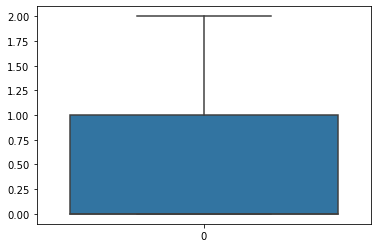

The column is BedroomAbvGr


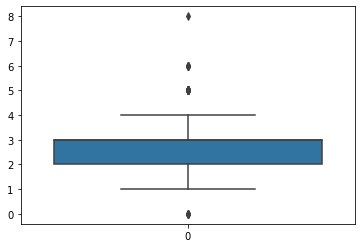

The column is KitchenAbvGr


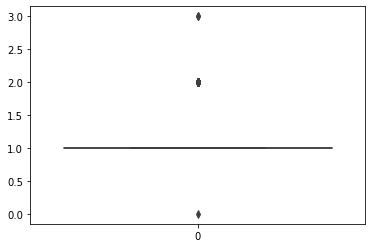

The column is TotRmsAbvGrd


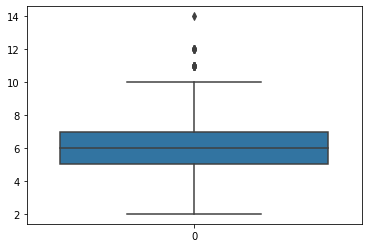

The column is Fireplaces


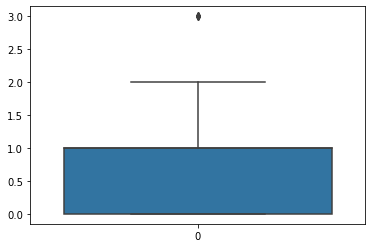

The column is GarageYrBlt


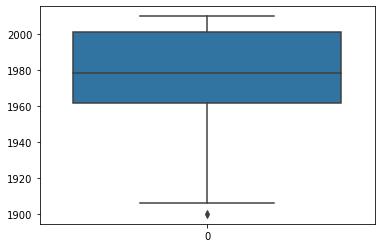

The column is GarageCars


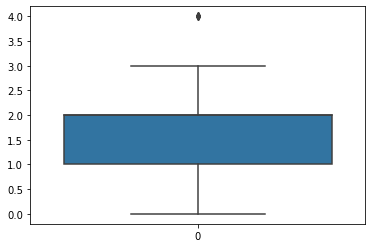

The column is GarageArea


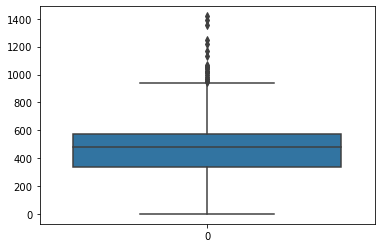

The column is WoodDeckSF


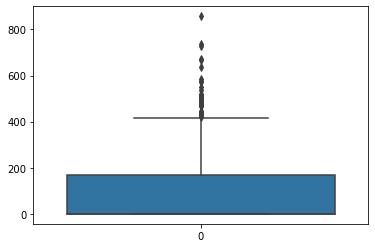

The column is OpenPorchSF


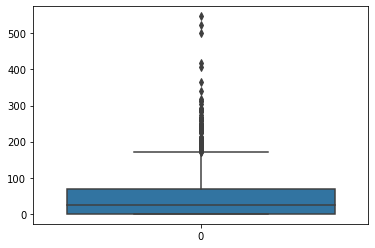

The column is EnclosedPorch


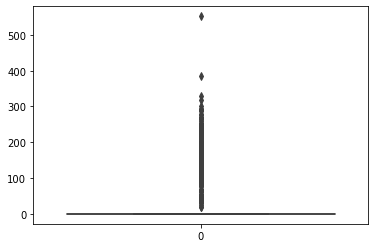

The column is 3SsnPorch


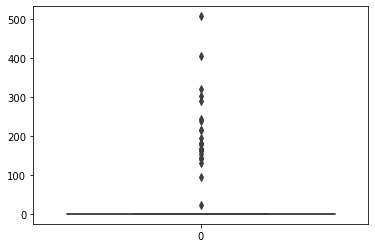

The column is ScreenPorch


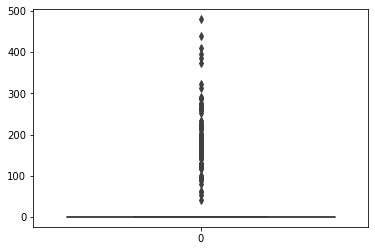

The column is PoolArea


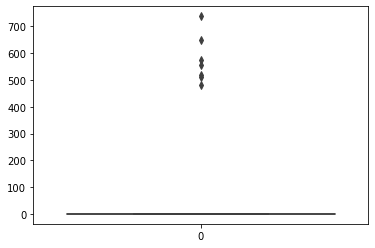

The column is MiscVal


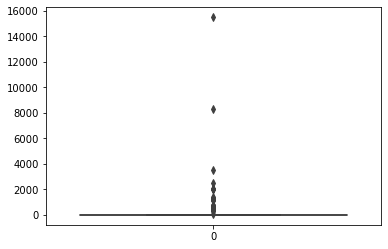

The column is MoSold


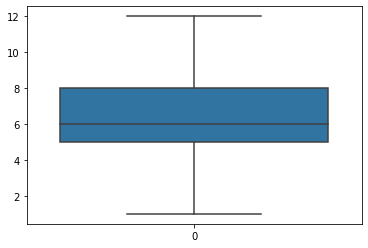

The column is YrSold


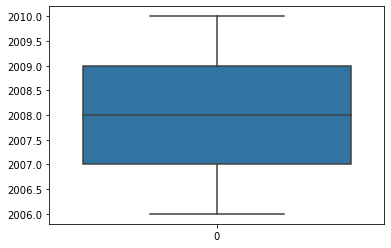

The column is SalePrice


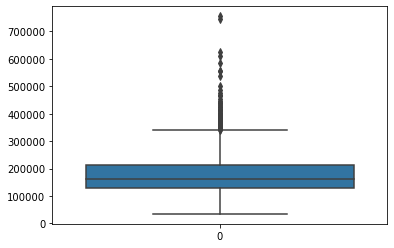

In [443]:
for cols in num_df.columns:
    print(f'The column is {cols}')
    sns.boxplot(data = num_df[cols])
    plt.show()

In [444]:
# Organized the Corr
corr_df = df_copy.corr()
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.36,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.07,-0.07,-0.14,-0.24,-0.25,0.31,0.05,0.07,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.08,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.08
LotFrontage,-0.36,1.00,0.31,0.23,-0.05,0.12,0.08,0.18,0.22,0.04,0.12,0.36,0.41,0.07,0.04,0.37,0.09,-0.01,0.18,0.05,0.24,-0.01,0.32,0.24,0.06,0.27,0.32,0.08,0.14,0.01,0.06,0.04,0.18,0.00,0.01,0.01,0.33
LotArea,-0.14,0.31,1.00,0.11,-0.01,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.05,0.13,0.01,0.12,-0.02,0.19,0.27,-0.02,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26


In [445]:
# Feature Selection with Univariate Method 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

feature_X = df_copy.drop('SalePrice' , axis=1)
feature_y = df_copy['SalePrice']

feature_X.shape , feature_y.shape

((1460, 79), (1460,))

In [446]:
# Applying Kboost to extract 'k' best features 
best_features = SelectKBest(score_func=chi2 , k=25)
fit = best_features.fit(X,y)

In [447]:
train_df = pd.concat([df_dummy , num_df] , axis=1)
train_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NO,Alley_Pave,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,1,0,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,0,1,0,0,1,0,1,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,0,1,0,0,1,0,1,0,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,0,1,0,0,1,0,1,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,0,1,0,0,1,0,1,0,...,192,84,0,0,0,0,0,12,2008,250000


In [448]:
df_real_train = train_df

In [449]:
# Splitting into X and y 

X = df_real_train.drop("SalePrice", axis=1)
y = df_train['SalePrice']

X.shape , y.shape

((1460, 304), (1460,))

In [450]:
# Applying Kboost to extract 'k' best features 
best_features = SelectKBest(score_func=chi2 , k=10)
best_features.fit(X,y)

SelectKBest(score_func=<function chi2 at 0x0000027211ED4D30>)

In [451]:
# Score and the columns 

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [452]:
# Concating both to have a clear picture whats happening here

feature_score = pd.concat([dfcolumns , dfscores] , axis=1)
feature_score.columns=['Columns' , 'Scores']

feature_score.nlargest(20 , 'Scores')

,Columns,Scores
270,LotArea,1.011497e+07
301,MiscVal,6.253332e+06
281,2ndFlrSF,4.648841e+05
276,BsmtFinSF1,3.999851e+05
300,PoolArea,3.835642e+05
277,BsmtFinSF2,3.688827e+05
275,MasVnrArea,2.857403e+05
278,BsmtUnfSF,2.747512e+05
282,LowQualFinSF,2.448810e+05
283,GrLivArea,1.968501e+05


**`n_largest` returns the largest in those columns we can customize by adding values inside the bracket. If we want 20 then `n_largest(20)`**

* Play with n_largest and select features by increasing features little by little.
* See the accuracy if its low add some more features and build the model again. 
* Experiment with this. Like a cycle 

#### 4. Feature Importance

Feature importance gives score of each of your data, higher the score the more relevant or important the features towards your output variable y.

Its an inbuilt class comes with Tree based Classifiers

In [453]:
clf = ExtraTreesClassifier()
clf.fit(X,y)

ExtraTreesClassifier()

In [454]:
# Out of 303 printing only 20 
clf.feature_importances_[:20]

array([3.31701310e-04, 1.68558594e-03, 5.35803978e-04, 4.91683112e-03,
       3.60968431e-03, 1.18884480e-04, 1.84061484e-04, 1.43326414e-03,
       2.22615842e-03, 1.23338092e-03, 8.84973999e-03, 1.95450210e-03,
       4.43611440e-04, 9.26098701e-03, 1.88216098e-03, 1.86196833e-03,
       1.26179634e-03, 4.29525730e-03, 2.22693054e-05, 2.33945887e-05])

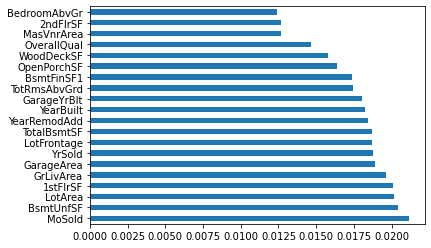

In [455]:
# For better visualization plotting a graph 
feature_imp = pd.Series(clf.feature_importances_ , index=X.columns)
feature_imp
feature_imp.nlargest(20).plot(kind='barh')

In [456]:
feature_imp.nlargest()

MoSold       0.021144
BsmtUnfSF    0.020436
LotArea      0.020151
1stFlrSF     0.020097
GrLivArea    0.019619
dtype: float64

### Test DataSet

In [523]:
df_test.drop('Id' , axis=1 ,inplace=True)

KeyError: "['Id'] not found in axis"

In [524]:
# Check the missing values in the test set
missing_val_count_by_column = (df_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [525]:
# Check the information about the Test DataFrame
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [526]:
test_numeric_col = df_test.select_dtypes(np.number)
test_numeric_col

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [527]:
test_cat_col = df_test.select_dtypes('O')
test_cat_col

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


#### 1. Filtering out the Numeric and Object Columns

In [528]:
# Numerical variable list
test_num_columns = []
for i in test_numeric_col.columns:
    test_num_columns.append(i)
print(test_num_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [529]:
# Turned whole column into a list 
test_col_list = []
for i in df_test.columns:
    test_col_list.append(i)
print(test_col_list)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [530]:
# Category variables 
test_object_col = []
for i in test_cat_col.columns:
    test_object_col.append(i)
print(test_object_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [531]:
# Both are equal 

len(test_object_col) + len(test_num_columns) , len(test_col_list)

(79, 79)

#### 2. Handling Missing values in the Numerical Column

In [532]:
test_missing_val_count_num_col = (df_test[test_num_columns].isnull().sum())
print(test_missing_val_count_num_col[test_missing_val_count_num_col > 0])

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


In [533]:
# Create a copy of test to work on 
test_copy = df_test.copy()

In [534]:
test_copy['LotFrontage'].fillna(test_copy['LotFrontage'].mean() , inplace=True)

test_copy['MasVnrArea'].fillna(test_copy['MasVnrArea'].mean() , inplace=True)

test_copy['BsmtFinSF1'].fillna(test_copy['BsmtFinSF1'].mean() , inplace=True)

test_copy['BsmtFinSF2'].fillna(test_copy['BsmtFinSF2'].mean() , inplace=True)

test_copy['BsmtUnfSF'].fillna(test_copy['BsmtUnfSF'].mean() , inplace=True)

test_copy['BsmtFullBath'].fillna(test_copy['BsmtFullBath'].mean() , inplace=True)

test_copy['BsmtHalfBath'].fillna(test_copy['BsmtHalfBath'].mean() , inplace=True)

test_copy['GarageYrBlt'].fillna(test_copy['GarageYrBlt'].mean() , inplace=True)

test_copy['GarageCars'].fillna(test_copy['GarageCars'].mean() , inplace=True)

test_copy['GarageArea'].fillna(test_copy['GarageArea'].mean() , inplace=True)

test_copy['TotalBsmtSF'].fillna(test_copy['TotalBsmtSF'].mean() , inplace=True)

In [535]:
# Checking again for missing values 

test_missing_val_count_num_col = (test_copy[test_num_columns].isnull().sum())
print(test_missing_val_count_num_col[test_missing_val_count_num_col > 0])

Series([], dtype: int64)


In [536]:
# Hence no missing values 

test_copy[test_num_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

#### 3. Handling missing data in the Categorical Columns

In [537]:
test_missing_val_count_obj_col = (test_copy[test_object_col].isnull().sum())
print(test_missing_val_count_obj_col[test_missing_val_count_obj_col > 0])

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [538]:
replace_col_test = list(test_missing_val_count_obj_col[test_missing_val_count_obj_col > 0].index)

In [539]:
# Not added columns 
na_col = ['MasVnrType' , 'MSZoning' , 'Utilities' , 'Exterior1st','Exterior2nd',
         'KitchenQual' , 'Functional' , 'SaleType' ]

In [540]:
for col in replace_col_test:
    if col in na_col:
        test_copy[col].replace(np.nan , 'NA' , inplace=True)
    else:
        test_copy[col].replace(np.nan , 'NO' , inplace=True)

In [541]:
# Checking for missing values

test_missing_val_count_obj_col = (test_copy[test_object_col].isnull().sum())
print(test_missing_val_count_obj_col[test_missing_val_count_obj_col > 0])

Series([], dtype: int64)


In [542]:
# Check the whole dataframe for missing values
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

#### 4. Converting Categorical into Numerical

In [543]:
df_dum_test = pd.get_dummies(test_copy[test_object_col])

In [544]:
test_df = pd.concat([df_dum_test , test_numeric_col] , axis=1)

#### 5. Making test the same as train

In [648]:
# Make a list with all the missing columns

not_in_train = ['MSZoning_NA', 'Utilities_NA', 'Exterior1st_NA', 'Exterior2nd_NA', 'KitchenQual_NA', 'Functional_NA',
                'SaleType_NA']
                
                

not_in_test = ['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin',
               'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc',
               'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix',
               'Electrical_NA', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']

# Drop them from where they should be dropped
dropped_test = test_df.copy()
dropped_X = X.copy()

dropped_test = dropped_test.drop(not_in_train, axis=1)
dropped_X = dropped_X.drop(not_in_test, axis=1)

In [649]:
dropped_test.shape, dropped_X.shape

((1459, 285), (1460, 285))

In [650]:
clf.fit(dropped_X,y)

ExtraTreesClassifier()

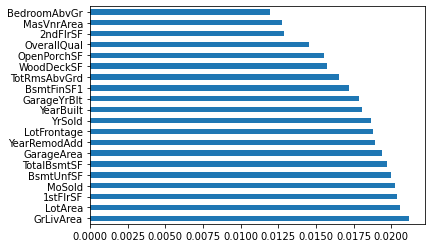

In [651]:
# For better visualization plotting a graph 
dropped_feature_imp = pd.Series(clf.feature_importances_ , index=dropped_X.columns)
dropped_feature_imp
dropped_feature_imp.nlargest(20).plot(kind='barh')

## Modeling

This is where all the models are worked on.

#### SubCategories:
* Train Test Split
* Function for the SKLearn Models
> 1. Create a Func that predicts Y for Sklearn Models
> 2. SKLearn Model Evaluation
* Catboost
* XGBoost Regressor
* Evaluation of all the models

Since this is a regression problem, I am going to use regression models for it. 
The models I intend on trying are:
    * Lasso
    * Elastic-Net
    * Ridge Regression
    * SVR linear
    * Lasso LARS

### Train, Test, Split

Im going to split the datae into a training and a testing set so that we can experiment with what model works the best. 
After I have decided which model to use I will train the model with the whole train.csv database.

In [479]:
feature_df = pd.DataFrame(feature_imp)

def extract_features(num_cols):
    '''
    This function takes in a integer and returns a list of largest columns based on the integer.
    '''
    colum_list = []
    for i in range(num_cols):
        large_col = feature_df[0].nlargest(i)
        for cols in large_col.index:
            colum_list.append(cols)
    return list(set(colum_list))

X[extract_features(5)]

,1stFlrSF,BsmtUnfSF,MoSold,LotArea
0,856,150,2,8450
1,1262,284,5,9600
2,920,434,9,11250
3,961,540,2,9550
4,1145,490,12,14260
...,...,...,...,...
1455,953,953,8,7917
1456,2073,589,2,13175
1457,1188,877,5,9042
1458,1078,0,4,9717


In [667]:
# Random seed for reproducibility
np.random.seed(7)

# Split into train & test set for each amount of features

# 20 features 
X_train, X_test, y_train, y_test = train_test_split(dropped_X[extract_features(250)], # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

X_train.shape ,X_test.shape, y_train.shape, y_test.shape



KeyError: "['HouseStyle_2.5Fin'] not in index"

y### Function for the SKLearn Models

In [481]:
# Put models in a dictionary
models = {"Lasso": Lasso(alpha=0.1),
          "Elastic-Net": ElasticNet(random_state=0), 
          "Ridge Regr": Ridge(alpha=1.0),
          "SVR_linear": svm.SVR(kernel='linear'),
          "LassoLars": LassoLars(alpha=0.01),
          "K-Neighbour Regr": KNeighborsRegressor(n_neighbors=2),
          "Decision_Tree": DecisionTreeRegressor(random_state=0),
          "RandomForestRegr": RandomForestRegressor(max_depth=2, random_state=0),
          "AdaBoost": AdaBoostRegressor(random_state=0, n_estimators=100),
          "SVR": make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))}

# Create function to fit models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(7)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [482]:
# run fit_and_score with 20 features
model_scores = fit_and_score(models=models,
                             X_train= X_train,
                             X_test= X_test,
                             y_train= y_train,
                             y_test= y_test)
model_scores

C:\Users\Rudi\Documents\DataScience\House_Prices\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194689754432.40063, tolerance: 708975524.4729695
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rudi\Documents\DataScience\House_Prices\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719082095234.9044, tolerance: 708975524.4729695
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rudi\Documents\DataScience\House_Prices\env\lib\site-packages\sklearn\linear_model\_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 62 iterations, i.e. alpha=5.500e+01, with an active set of 60 regressors, and the smallest cholesky pivot element being 9.246e-08. Reduce max_iter or i

{'Lasso': 0.5910190047621067,
 'Elastic-Net': 0.8504201138537725,
 'Ridge Regr': 0.8552114759225997,
 'SVR_linear': 0.771249780188038,
 'LassoLars': 0.7653129532962776,
 'K-Neighbour Regr': 0.6700898405571848,
 'Decision_Tree': 0.8128752072784291,
 'RandomForestRegr': 0.7166175801368158,
 'AdaBoost': 0.8262649805544799,
 'SVR': -0.06692313021351803}

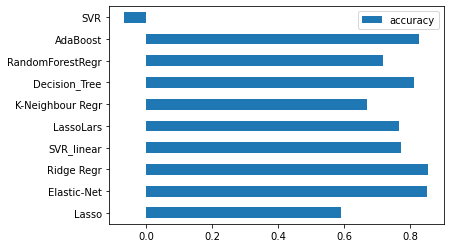

In [483]:
# Compare the base score
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.barh();

#### 1. Function to Predict Y for the SKlearn Models

In [484]:
def predict_models(models, X_train, X_test, y_train, y_test):
    # Random seed for reproducible results
    np.random.seed(7)
    # Make a list to keep model preds
    model_preds = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Add a y-Preds
        model_preds[name] = model.predict(X_test)
    return model_preds

In [485]:
twenty_model_preds = predict_models(models=models,
                             X_train= X_train,
                             X_test= X_test,
                             y_train= y_train,
                             y_test= y_test)
twenty_model_preds

C:\Users\Rudi\Documents\DataScience\House_Prices\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194689754432.40063, tolerance: 708975524.4729695
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rudi\Documents\DataScience\House_Prices\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719082095234.9044, tolerance: 708975524.4729695
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rudi\Documents\DataScience\House_Prices\env\lib\site-packages\sklearn\linear_model\_least_angle.py:570: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 62 iterations, i.e. alpha=5.500e+01, with an active set of 60 regressors, and the smallest cholesky pivot element being 9.246e-08. Reduce max_iter or i

{'Lasso': array([ 139584.42904152,  201163.34981356,  187101.71135362,
          96076.34175088,  116804.07572465,  335789.48871351,
         130486.04973083,  109622.34088822,  230364.29490243,
         109954.34987101,  226042.04298565,  170779.71284809,
         108516.33921765,  190412.43845106,  197128.79696388,
         176161.8716088 ,  243052.22299696,  152729.20538181,
         138712.61392162,  183505.43859287,  189272.62223012,
         137080.85643895,  120372.64725565,  247172.52265699,
         294275.77316726,  167392.02089935,  105129.79913233,
         177584.09445339,  231232.17093158,  124179.56816854,
         182514.1061189 ,  240949.55380107,  286026.49390047,
         244264.3317987 ,  182983.39001317,  284440.07116706,
         149487.10300072,  133945.36805092,  254030.55177101,
         213423.81823765,  112402.58988965,  195000.33340292,
         154164.52973186,  157750.3748924 ,  299085.83317208,
         223765.96095538,  203092.19115416,  192571.78044052,

In [486]:
# Put all the predictions into a DataFrame
twenty_predict_df = pd.DataFrame(twenty_model_preds)
twenty_predict_df

,Lasso,Elastic-Net,Ridge Regr,SVR_linear,LassoLars,K-Neighbour Regr,Decision_Tree,RandomForestRegr,AdaBoost,SVR
0,139584.429042,161438.864022,158442.814201,173846.738482,146278.515364,130575.0,152000.0,134350.988801,179180.867314,163019.292297
1,201163.349814,213421.684571,202786.403577,212520.601283,198780.121060,164500.0,274970.0,162600.308162,233497.778571,163041.204515
2,187101.711354,178599.162226,175487.470539,180624.798874,183222.357115,205115.0,173900.0,160647.979338,187607.735099,163062.854306
3,96076.341751,110052.786754,92099.027628,130455.998299,99751.760178,158216.0,149350.0,133192.983683,130594.078431,162997.600686
4,116804.075725,142097.544607,136929.107667,140315.364617,134223.667450,134930.0,140000.0,134350.988801,120861.000000,163002.048245
...,...,...,...,...,...,...,...,...,...,...
287,71821.907874,57556.888038,106396.950082,4292.521938,145039.268939,177450.0,126000.0,136829.875263,135234.450593,162999.854552
288,122710.926682,112994.546238,121518.209462,121047.371025,122753.839450,133750.0,140000.0,132767.810166,118676.300000,162996.344053
289,146027.816782,165320.751316,144304.969322,170370.937082,153831.775452,123500.0,154000.0,134350.988801,166576.736000,163032.301984
290,97844.715216,132978.468210,113779.384574,124991.347827,110875.777335,166950.0,135900.0,156585.914241,130594.078431,162996.494607


#### 2. SKLearn Model Evaluation

The metric used for the competition is evaluated on the Root-Mean-Squared-Error (RMSE). So the baseline score from the score function does not mean anything... We have to compare the models against the RMSE metric.

In [487]:
# Check the different rmse values for the models
twenty_rmse_scores = {
   "Lasso": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["Lasso"]))],
   "Elastic-Net": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["Elastic-Net"]))],
   "Ridge Regr": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["Ridge Regr"]))],
   "SVR_linear": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["SVR_linear"]))],
   "LassoLars": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["LassoLars"]))],
   "K-Neighbour Regr": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["K-Neighbour Regr"]))],
   "Decision_Tree": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["Decision_Tree"]))],
   "RandomForestRegr": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["RandomForestRegr"]))],
   "AdaBoost": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["AdaBoost"]))],
   "SVR": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["SVR"]))],}

twenty_rmse_scores_df = pd.DataFrame(twenty_rmse_scores)


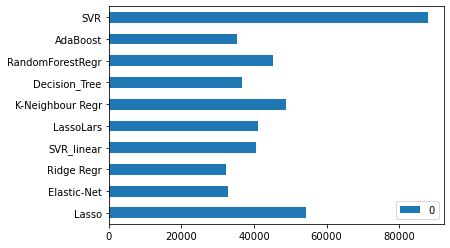

In [488]:
twenty_rmse_scores_df.T.plot.barh();

### Catboost

In [653]:
dropped_feature_df = pd.DataFrame(dropped_feature_imp)

def dropped_extract_features(num_cols):
    '''
    This function takes in a integer and returns a list of largest columns based on the integer.
    '''
    colum_list = []
    for i in range(num_cols):
        large_col = dropped_feature_df[0].nlargest(i)
        for cols in large_col.index:
            colum_list.append(cols)
    return list(set(colum_list))

dropped_X[extract_features(5)]

,1stFlrSF,BsmtUnfSF,MoSold,LotArea
0,856,150,2,8450
1,1262,284,5,9600
2,920,434,9,11250
3,961,540,2,9550
4,1145,490,12,14260
...,...,...,...,...
1455,953,953,8,7917
1456,2073,589,2,13175
1457,1188,877,5,9042
1458,1078,0,4,9717


((1460, 285), (1168,))

In [656]:
dropped_X_train = dropped_X[dropped_extract_features(250)]
dropped_y_train = y

catboost_model = CatBoostRegressor(loss_function="RMSE",
                           eval_metric="RMSE",
                           learning_rate=0.01,
                            iterations=18000,
                           l2_leaf_reg=2,
                           random_seed=42,
                           od_type="Iter",
                           depth=2)
catboost_model.fit(X_train , y_train)

0:	learn: 79009.4883588	total: 230ms	remaining: 1h 9m 1s
1:	learn: 78572.8943685	total: 237ms	remaining: 35m 36s
2:	learn: 78198.4314506	total: 305ms	remaining: 30m 29s
3:	learn: 77773.7824792	total: 324ms	remaining: 24m 17s
4:	learn: 77337.9062546	total: 329ms	remaining: 19m 45s
5:	learn: 76937.2282896	total: 355ms	remaining: 17m 45s
6:	learn: 76548.8208096	total: 366ms	remaining: 15m 40s
7:	learn: 76142.3401503	total: 372ms	remaining: 13m 57s
8:	learn: 75757.6396252	total: 378ms	remaining: 12m 34s
9:	learn: 75365.5029151	total: 389ms	remaining: 11m 40s
10:	learn: 74971.7354897	total: 405ms	remaining: 11m 2s
11:	learn: 74577.0103601	total: 423ms	remaining: 10m 33s
12:	learn: 74221.5773278	total: 437ms	remaining: 10m 4s
13:	learn: 73825.5246815	total: 445ms	remaining: 9m 31s
14:	learn: 73459.2453173	total: 454ms	remaining: 9m 4s
15:	learn: 73073.5913346	total: 467ms	remaining: 8m 45s
16:	learn: 72686.7974306	total: 477ms	remaining: 8m 24s
17:	learn: 72305.5565625	total: 504ms	remaining

147:	learn: 44853.4386572	total: 3.39s	remaining: 6m 49s
148:	learn: 44736.5666092	total: 3.4s	remaining: 6m 47s
149:	learn: 44621.2066426	total: 3.41s	remaining: 6m 46s
150:	learn: 44519.5906738	total: 3.42s	remaining: 6m 44s
151:	learn: 44395.0688753	total: 3.44s	remaining: 6m 43s
152:	learn: 44300.0487393	total: 3.49s	remaining: 6m 47s
153:	learn: 44194.4405588	total: 3.52s	remaining: 6m 48s
154:	learn: 44073.6656764	total: 3.58s	remaining: 6m 52s
155:	learn: 43976.9710767	total: 3.63s	remaining: 6m 55s
156:	learn: 43880.8272754	total: 3.65s	remaining: 6m 54s
157:	learn: 43761.9579465	total: 3.67s	remaining: 6m 54s
158:	learn: 43655.4949181	total: 3.72s	remaining: 6m 57s
159:	learn: 43547.7579841	total: 3.74s	remaining: 6m 56s
160:	learn: 43447.7175916	total: 3.78s	remaining: 6m 59s
161:	learn: 43347.7865456	total: 3.81s	remaining: 6m 59s
162:	learn: 43249.2519440	total: 3.87s	remaining: 7m 4s
163:	learn: 43149.7618931	total: 3.89s	remaining: 7m 3s
164:	learn: 43047.3557362	total: 3

294:	learn: 34724.8425625	total: 6.5s	remaining: 6m 30s
295:	learn: 34682.0819835	total: 6.5s	remaining: 6m 28s
296:	learn: 34635.2118997	total: 6.51s	remaining: 6m 28s
297:	learn: 34594.9081944	total: 6.52s	remaining: 6m 27s
298:	learn: 34554.9140885	total: 6.53s	remaining: 6m 26s
299:	learn: 34516.9848559	total: 6.54s	remaining: 6m 25s
300:	learn: 34472.0357741	total: 6.55s	remaining: 6m 24s
301:	learn: 34426.9976423	total: 6.6s	remaining: 6m 26s
302:	learn: 34377.5767428	total: 6.69s	remaining: 6m 30s
303:	learn: 34338.4069438	total: 6.73s	remaining: 6m 31s
304:	learn: 34303.2018770	total: 6.75s	remaining: 6m 31s
305:	learn: 34266.6323340	total: 6.79s	remaining: 6m 32s
306:	learn: 34230.4424100	total: 6.8s	remaining: 6m 31s
307:	learn: 34199.8390635	total: 6.81s	remaining: 6m 31s
308:	learn: 34166.0618253	total: 6.82s	remaining: 6m 30s
309:	learn: 34131.8398501	total: 6.86s	remaining: 6m 31s
310:	learn: 34097.9813906	total: 6.87s	remaining: 6m 30s
311:	learn: 34062.0329975	total: 6.

443:	learn: 30098.9130886	total: 8.86s	remaining: 5m 50s
444:	learn: 30080.9635342	total: 8.89s	remaining: 5m 50s
445:	learn: 30064.1523263	total: 8.9s	remaining: 5m 50s
446:	learn: 30041.2609034	total: 8.92s	remaining: 5m 50s
447:	learn: 30017.9970410	total: 8.93s	remaining: 5m 49s
448:	learn: 29994.4644141	total: 8.94s	remaining: 5m 49s
449:	learn: 29974.3139261	total: 8.95s	remaining: 5m 49s
450:	learn: 29954.6714904	total: 8.99s	remaining: 5m 49s
451:	learn: 29936.0819775	total: 8.99s	remaining: 5m 49s
452:	learn: 29917.8054826	total: 9s	remaining: 5m 48s
453:	learn: 29898.4736198	total: 9.01s	remaining: 5m 48s
454:	learn: 29874.1193194	total: 9.02s	remaining: 5m 47s
455:	learn: 29853.5685750	total: 9.03s	remaining: 5m 47s
456:	learn: 29832.5544360	total: 9.03s	remaining: 5m 46s
457:	learn: 29814.8816453	total: 9.04s	remaining: 5m 46s
458:	learn: 29791.7850716	total: 9.05s	remaining: 5m 45s
459:	learn: 29772.7315797	total: 9.08s	remaining: 5m 46s
460:	learn: 29754.6194837	total: 9.

592:	learn: 27391.0826211	total: 11.6s	remaining: 5m 40s
593:	learn: 27378.5323607	total: 11.6s	remaining: 5m 40s
594:	learn: 27365.0038504	total: 11.6s	remaining: 5m 40s
595:	learn: 27345.5156512	total: 11.7s	remaining: 5m 41s
596:	learn: 27333.1314668	total: 11.7s	remaining: 5m 41s
597:	learn: 27322.0210008	total: 11.7s	remaining: 5m 41s
598:	learn: 27307.6482792	total: 11.7s	remaining: 5m 41s
599:	learn: 27295.4823963	total: 11.8s	remaining: 5m 40s
600:	learn: 27282.2725809	total: 11.8s	remaining: 5m 40s
601:	learn: 27269.6844965	total: 11.8s	remaining: 5m 40s
602:	learn: 27254.1389775	total: 11.8s	remaining: 5m 40s
603:	learn: 27243.9518053	total: 11.8s	remaining: 5m 40s
604:	learn: 27232.5754013	total: 11.8s	remaining: 5m 39s
605:	learn: 27217.2329306	total: 11.9s	remaining: 5m 41s
606:	learn: 27204.0412962	total: 11.9s	remaining: 5m 41s
607:	learn: 27191.0858323	total: 11.9s	remaining: 5m 40s
608:	learn: 27174.3759380	total: 11.9s	remaining: 5m 40s
609:	learn: 27155.0842145	total

739:	learn: 25605.8411888	total: 14.8s	remaining: 5m 45s
740:	learn: 25595.0427950	total: 14.8s	remaining: 5m 45s
741:	learn: 25580.8680053	total: 14.9s	remaining: 5m 45s
742:	learn: 25570.4945788	total: 14.9s	remaining: 5m 45s
743:	learn: 25558.0594098	total: 14.9s	remaining: 5m 45s
744:	learn: 25549.5718626	total: 14.9s	remaining: 5m 45s
745:	learn: 25538.3386112	total: 14.9s	remaining: 5m 45s
746:	learn: 25528.3599606	total: 15s	remaining: 5m 45s
747:	learn: 25520.0039963	total: 15s	remaining: 5m 45s
748:	learn: 25510.5214624	total: 15s	remaining: 5m 46s
749:	learn: 25498.6725961	total: 15s	remaining: 5m 45s
750:	learn: 25489.6216026	total: 15s	remaining: 5m 45s
751:	learn: 25482.7745144	total: 15s	remaining: 5m 45s
752:	learn: 25473.2803500	total: 15.1s	remaining: 5m 44s
753:	learn: 25450.7563910	total: 15.1s	remaining: 5m 45s
754:	learn: 25441.0137947	total: 15.1s	remaining: 5m 44s
755:	learn: 25432.2587872	total: 15.1s	remaining: 5m 44s
756:	learn: 25422.5463175	total: 15.1s	rema

890:	learn: 24214.6881820	total: 17.9s	remaining: 5m 42s
891:	learn: 24204.6289990	total: 17.9s	remaining: 5m 42s
892:	learn: 24197.7756547	total: 17.9s	remaining: 5m 42s
893:	learn: 24189.8300546	total: 17.9s	remaining: 5m 42s
894:	learn: 24182.5567597	total: 18s	remaining: 5m 44s
895:	learn: 24170.9349417	total: 18s	remaining: 5m 43s
896:	learn: 24163.4396566	total: 18s	remaining: 5m 43s
897:	learn: 24155.7660389	total: 18.1s	remaining: 5m 44s
898:	learn: 24148.6867734	total: 18.1s	remaining: 5m 44s
899:	learn: 24141.1119405	total: 18.1s	remaining: 5m 44s
900:	learn: 24133.8066971	total: 18.1s	remaining: 5m 44s
901:	learn: 24128.3389445	total: 18.1s	remaining: 5m 43s
902:	learn: 24118.4476590	total: 18.2s	remaining: 5m 43s
903:	learn: 24109.3168054	total: 18.2s	remaining: 5m 43s
904:	learn: 24101.5927908	total: 18.2s	remaining: 5m 43s
905:	learn: 24094.5508078	total: 18.2s	remaining: 5m 43s
906:	learn: 24087.8134483	total: 18.2s	remaining: 5m 42s
907:	learn: 24081.3209655	total: 18.2

1038:	learn: 23131.9796089	total: 20.5s	remaining: 5m 34s
1039:	learn: 23125.6824254	total: 20.5s	remaining: 5m 34s
1040:	learn: 23120.2432170	total: 20.6s	remaining: 5m 35s
1041:	learn: 23111.3297154	total: 20.6s	remaining: 5m 35s
1042:	learn: 23104.9829143	total: 20.7s	remaining: 5m 36s
1043:	learn: 23097.7151412	total: 20.8s	remaining: 5m 37s
1044:	learn: 23092.2436584	total: 20.8s	remaining: 5m 37s
1045:	learn: 23086.9390317	total: 20.9s	remaining: 5m 38s
1046:	learn: 23080.6332079	total: 20.9s	remaining: 5m 38s
1047:	learn: 23075.4458124	total: 20.9s	remaining: 5m 38s
1048:	learn: 23069.3462866	total: 21s	remaining: 5m 38s
1049:	learn: 23062.8259375	total: 21s	remaining: 5m 38s
1050:	learn: 23057.5115008	total: 21s	remaining: 5m 38s
1051:	learn: 23051.3517335	total: 21s	remaining: 5m 38s
1052:	learn: 23046.2498349	total: 21s	remaining: 5m 38s
1053:	learn: 23041.3598853	total: 21s	remaining: 5m 38s
1054:	learn: 23035.3823426	total: 21.1s	remaining: 5m 38s
1055:	learn: 23026.3138614

1186:	learn: 22265.9162245	total: 23.8s	remaining: 5m 37s
1187:	learn: 22252.9776652	total: 23.8s	remaining: 5m 37s
1188:	learn: 22248.6252748	total: 23.9s	remaining: 5m 37s
1189:	learn: 22240.3451930	total: 23.9s	remaining: 5m 37s
1190:	learn: 22236.1016871	total: 23.9s	remaining: 5m 37s
1191:	learn: 22232.0838151	total: 24s	remaining: 5m 37s
1192:	learn: 22227.0319720	total: 24s	remaining: 5m 37s
1193:	learn: 22222.4304893	total: 24s	remaining: 5m 37s
1194:	learn: 22218.1576120	total: 24s	remaining: 5m 37s
1195:	learn: 22214.1626849	total: 24s	remaining: 5m 37s
1196:	learn: 22208.7590752	total: 24.1s	remaining: 5m 38s
1197:	learn: 22202.4521435	total: 24.2s	remaining: 5m 39s
1198:	learn: 22198.5197277	total: 24.2s	remaining: 5m 39s
1199:	learn: 22194.4051929	total: 24.2s	remaining: 5m 39s
1200:	learn: 22190.3623965	total: 24.2s	remaining: 5m 39s
1201:	learn: 22186.6449564	total: 24.3s	remaining: 5m 38s
1202:	learn: 22182.7787114	total: 24.3s	remaining: 5m 39s
1203:	learn: 22177.71116

1328:	learn: 21541.0467869	total: 28.4s	remaining: 5m 55s
1329:	learn: 21536.6130080	total: 28.5s	remaining: 5m 57s
1330:	learn: 21532.6729135	total: 28.6s	remaining: 5m 58s
1331:	learn: 21529.1393876	total: 28.6s	remaining: 5m 58s
1332:	learn: 21521.8839275	total: 28.6s	remaining: 5m 57s
1333:	learn: 21518.5701947	total: 28.7s	remaining: 5m 59s
1334:	learn: 21515.3025011	total: 28.7s	remaining: 5m 58s
1335:	learn: 21511.6338055	total: 28.8s	remaining: 5m 58s
1336:	learn: 21507.5403913	total: 28.8s	remaining: 5m 58s
1337:	learn: 21504.3236566	total: 28.9s	remaining: 5m 59s
1338:	learn: 21498.6323644	total: 28.9s	remaining: 5m 59s
1339:	learn: 21494.0020118	total: 28.9s	remaining: 5m 59s
1340:	learn: 21488.6518650	total: 29s	remaining: 6m
1341:	learn: 21485.2005151	total: 29s	remaining: 5m 59s
1342:	learn: 21481.2247626	total: 29.1s	remaining: 6m
1343:	learn: 21478.0670599	total: 29.1s	remaining: 6m
1344:	learn: 21474.8586053	total: 29.1s	remaining: 6m
1345:	learn: 21468.3934941	total: 

1479:	learn: 20893.7375266	total: 33.2s	remaining: 6m 10s
1480:	learn: 20890.4620451	total: 33.2s	remaining: 6m 10s
1481:	learn: 20886.0255183	total: 33.3s	remaining: 6m 11s
1482:	learn: 20880.5630373	total: 33.3s	remaining: 6m 10s
1483:	learn: 20877.6056543	total: 33.3s	remaining: 6m 10s
1484:	learn: 20874.2962077	total: 33.3s	remaining: 6m 10s
1485:	learn: 20871.6534712	total: 33.3s	remaining: 6m 10s
1486:	learn: 20869.0435942	total: 33.4s	remaining: 6m 10s
1487:	learn: 20865.3546050	total: 33.4s	remaining: 6m 10s
1488:	learn: 20862.7756842	total: 33.4s	remaining: 6m 10s
1489:	learn: 20859.1238604	total: 33.4s	remaining: 6m 10s
1490:	learn: 20856.5783186	total: 33.4s	remaining: 6m 9s
1491:	learn: 20854.0644349	total: 33.4s	remaining: 6m 9s
1492:	learn: 20850.6399562	total: 33.4s	remaining: 6m 9s
1493:	learn: 20847.4321575	total: 33.5s	remaining: 6m 9s
1494:	learn: 20844.9468295	total: 33.5s	remaining: 6m 9s
1495:	learn: 20841.8253265	total: 33.5s	remaining: 6m 9s
1496:	learn: 20836.4

1624:	learn: 20371.0059942	total: 36.1s	remaining: 6m 3s
1625:	learn: 20367.0236741	total: 36.1s	remaining: 6m 3s
1626:	learn: 20364.2844050	total: 36.1s	remaining: 6m 3s
1627:	learn: 20361.3853788	total: 36.1s	remaining: 6m 3s
1628:	learn: 20358.6343169	total: 36.2s	remaining: 6m 3s
1629:	learn: 20351.7203969	total: 36.2s	remaining: 6m 3s
1630:	learn: 20349.3659220	total: 36.2s	remaining: 6m 3s
1631:	learn: 20345.9970464	total: 36.2s	remaining: 6m 2s
1632:	learn: 20342.2040255	total: 36.2s	remaining: 6m 2s
1633:	learn: 20338.3184995	total: 36.2s	remaining: 6m 2s
1634:	learn: 20331.6160135	total: 36.2s	remaining: 6m 2s
1635:	learn: 20329.6106141	total: 36.3s	remaining: 6m 2s
1636:	learn: 20327.8354872	total: 36.3s	remaining: 6m 3s
1637:	learn: 20324.7325083	total: 36.3s	remaining: 6m 2s
1638:	learn: 20321.6681212	total: 36.3s	remaining: 6m 2s
1639:	learn: 20316.8465279	total: 36.3s	remaining: 6m 2s
1640:	learn: 20313.8403179	total: 36.4s	remaining: 6m 2s
1641:	learn: 20311.2906701	tota

1770:	learn: 19935.4013672	total: 38.2s	remaining: 5m 50s
1771:	learn: 19934.1741755	total: 38.2s	remaining: 5m 50s
1772:	learn: 19931.4803640	total: 38.3s	remaining: 5m 50s
1773:	learn: 19928.9155971	total: 38.3s	remaining: 5m 50s
1774:	learn: 19927.2271775	total: 38.3s	remaining: 5m 50s
1775:	learn: 19922.1428771	total: 38.3s	remaining: 5m 50s
1776:	learn: 19919.9506867	total: 38.4s	remaining: 5m 50s
1777:	learn: 19917.4456074	total: 38.4s	remaining: 5m 50s
1778:	learn: 19912.4259932	total: 38.4s	remaining: 5m 49s
1779:	learn: 19909.0703408	total: 38.4s	remaining: 5m 49s
1780:	learn: 19901.2632174	total: 38.4s	remaining: 5m 49s
1781:	learn: 19896.9878781	total: 38.4s	remaining: 5m 49s
1782:	learn: 19893.5729673	total: 38.4s	remaining: 5m 49s
1783:	learn: 19890.9785633	total: 38.5s	remaining: 5m 49s
1784:	learn: 19885.9991719	total: 38.5s	remaining: 5m 49s
1785:	learn: 19883.9644213	total: 38.5s	remaining: 5m 49s
1786:	learn: 19882.6348665	total: 38.5s	remaining: 5m 49s
1787:	learn: 1

1913:	learn: 19534.1390595	total: 41s	remaining: 5m 44s
1914:	learn: 19531.4566763	total: 41s	remaining: 5m 44s
1915:	learn: 19529.3521544	total: 41s	remaining: 5m 43s
1916:	learn: 19526.8112146	total: 41s	remaining: 5m 43s
1917:	learn: 19525.6879363	total: 41s	remaining: 5m 43s
1918:	learn: 19520.3132887	total: 41s	remaining: 5m 43s
1919:	learn: 19517.8613747	total: 41.1s	remaining: 5m 43s
1920:	learn: 19516.8611322	total: 41.1s	remaining: 5m 43s
1921:	learn: 19513.7523690	total: 41.1s	remaining: 5m 43s
1922:	learn: 19511.4975529	total: 41.1s	remaining: 5m 43s
1923:	learn: 19509.1744281	total: 41.1s	remaining: 5m 43s
1924:	learn: 19507.2411517	total: 41.1s	remaining: 5m 43s
1925:	learn: 19504.9367442	total: 41.1s	remaining: 5m 43s
1926:	learn: 19502.4458268	total: 41.2s	remaining: 5m 43s
1927:	learn: 19500.4522191	total: 41.2s	remaining: 5m 43s
1928:	learn: 19496.9380234	total: 41.2s	remaining: 5m 43s
1929:	learn: 19493.0720334	total: 41.2s	remaining: 5m 43s
1930:	learn: 19492.3359953

2060:	learn: 19133.0780579	total: 43.4s	remaining: 5m 35s
2061:	learn: 19131.2279186	total: 43.4s	remaining: 5m 35s
2062:	learn: 19129.0310970	total: 43.4s	remaining: 5m 35s
2063:	learn: 19126.5926604	total: 43.4s	remaining: 5m 35s
2064:	learn: 19124.7562552	total: 43.4s	remaining: 5m 35s
2065:	learn: 19122.5771705	total: 43.5s	remaining: 5m 35s
2066:	learn: 19119.3953111	total: 43.5s	remaining: 5m 35s
2067:	learn: 19117.4726280	total: 43.5s	remaining: 5m 35s
2068:	learn: 19114.9270897	total: 43.6s	remaining: 5m 35s
2069:	learn: 19112.9211158	total: 43.6s	remaining: 5m 35s
2070:	learn: 19110.7735340	total: 43.6s	remaining: 5m 35s
2071:	learn: 19109.1419404	total: 43.6s	remaining: 5m 35s
2072:	learn: 19106.9864440	total: 43.6s	remaining: 5m 35s
2073:	learn: 19104.9482228	total: 43.6s	remaining: 5m 35s
2074:	learn: 19102.4313423	total: 43.6s	remaining: 5m 34s
2075:	learn: 19099.6565843	total: 43.6s	remaining: 5m 34s
2076:	learn: 19097.5509120	total: 43.7s	remaining: 5m 34s
2077:	learn: 1

2205:	learn: 18784.3900911	total: 46.2s	remaining: 5m 30s
2206:	learn: 18779.0753124	total: 46.2s	remaining: 5m 30s
2207:	learn: 18777.5788990	total: 46.3s	remaining: 5m 30s
2208:	learn: 18775.4338012	total: 46.3s	remaining: 5m 30s
2209:	learn: 18771.1856188	total: 46.3s	remaining: 5m 30s
2210:	learn: 18767.4668577	total: 46.3s	remaining: 5m 30s
2211:	learn: 18765.1581949	total: 46.4s	remaining: 5m 30s
2212:	learn: 18764.5471773	total: 46.4s	remaining: 5m 30s
2213:	learn: 18762.9341861	total: 46.4s	remaining: 5m 31s
2214:	learn: 18761.0808907	total: 46.5s	remaining: 5m 31s
2215:	learn: 18756.7782991	total: 46.5s	remaining: 5m 30s
2216:	learn: 18752.8755640	total: 46.5s	remaining: 5m 31s
2217:	learn: 18751.3525029	total: 46.5s	remaining: 5m 31s
2218:	learn: 18750.7449138	total: 46.6s	remaining: 5m 31s
2219:	learn: 18749.2712187	total: 46.6s	remaining: 5m 31s
2220:	learn: 18747.7672395	total: 46.6s	remaining: 5m 31s
2221:	learn: 18743.9322712	total: 46.6s	remaining: 5m 31s
2222:	learn: 1

2359:	learn: 18442.6903131	total: 49.4s	remaining: 5m 27s
2360:	learn: 18440.6199251	total: 49.4s	remaining: 5m 27s
2361:	learn: 18438.0272707	total: 49.5s	remaining: 5m 27s
2362:	learn: 18436.7097535	total: 49.5s	remaining: 5m 27s
2363:	learn: 18433.6660855	total: 49.6s	remaining: 5m 27s
2364:	learn: 18431.9890513	total: 49.6s	remaining: 5m 27s
2365:	learn: 18430.0154268	total: 49.6s	remaining: 5m 27s
2366:	learn: 18427.0024221	total: 49.6s	remaining: 5m 27s
2367:	learn: 18425.2101569	total: 49.7s	remaining: 5m 27s
2368:	learn: 18423.2513854	total: 49.7s	remaining: 5m 27s
2369:	learn: 18419.5546840	total: 49.7s	remaining: 5m 27s
2370:	learn: 18417.8226163	total: 49.7s	remaining: 5m 27s
2371:	learn: 18415.8801306	total: 49.7s	remaining: 5m 27s
2372:	learn: 18414.5161354	total: 49.7s	remaining: 5m 27s
2373:	learn: 18413.1024886	total: 49.8s	remaining: 5m 27s
2374:	learn: 18410.1280076	total: 49.8s	remaining: 5m 27s
2375:	learn: 18406.4139638	total: 49.8s	remaining: 5m 27s
2376:	learn: 1

2506:	learn: 18132.6944356	total: 51.6s	remaining: 5m 19s
2507:	learn: 18128.1720838	total: 51.7s	remaining: 5m 19s
2508:	learn: 18126.3768400	total: 51.7s	remaining: 5m 18s
2509:	learn: 18125.8523848	total: 51.7s	remaining: 5m 18s
2510:	learn: 18124.6907729	total: 51.7s	remaining: 5m 18s
2511:	learn: 18121.2986675	total: 51.7s	remaining: 5m 18s
2512:	learn: 18119.4059029	total: 51.7s	remaining: 5m 18s
2513:	learn: 18117.5433467	total: 51.7s	remaining: 5m 18s
2514:	learn: 18116.6419398	total: 51.8s	remaining: 5m 18s
2515:	learn: 18115.4370961	total: 51.8s	remaining: 5m 18s
2516:	learn: 18113.6907954	total: 51.8s	remaining: 5m 18s
2517:	learn: 18111.4341173	total: 51.9s	remaining: 5m 18s
2518:	learn: 18108.9568777	total: 51.9s	remaining: 5m 19s
2519:	learn: 18107.6544671	total: 52s	remaining: 5m 19s
2520:	learn: 18106.3719415	total: 52s	remaining: 5m 19s
2521:	learn: 18104.6188220	total: 52s	remaining: 5m 19s
2522:	learn: 18103.0315415	total: 52.1s	remaining: 5m 19s
2523:	learn: 18100.4

2652:	learn: 17849.5362387	total: 55s	remaining: 5m 18s
2653:	learn: 17846.9522574	total: 55s	remaining: 5m 18s
2654:	learn: 17845.1523716	total: 55.1s	remaining: 5m 18s
2655:	learn: 17843.9875484	total: 55.2s	remaining: 5m 18s
2656:	learn: 17842.8766933	total: 55.2s	remaining: 5m 18s
2657:	learn: 17841.0219320	total: 55.3s	remaining: 5m 19s
2658:	learn: 17838.9485199	total: 55.3s	remaining: 5m 19s
2659:	learn: 17837.2062088	total: 55.4s	remaining: 5m 19s
2660:	learn: 17835.7174218	total: 55.4s	remaining: 5m 19s
2661:	learn: 17835.2314414	total: 55.4s	remaining: 5m 19s
2662:	learn: 17834.0453712	total: 55.4s	remaining: 5m 19s
2663:	learn: 17832.6418526	total: 55.4s	remaining: 5m 19s
2664:	learn: 17828.2251466	total: 55.5s	remaining: 5m 19s
2665:	learn: 17825.0051663	total: 55.5s	remaining: 5m 19s
2666:	learn: 17823.3380187	total: 55.5s	remaining: 5m 18s
2667:	learn: 17820.1222187	total: 55.5s	remaining: 5m 18s
2668:	learn: 17819.0277976	total: 55.5s	remaining: 5m 18s
2669:	learn: 17815

2801:	learn: 17582.6609472	total: 57.7s	remaining: 5m 13s
2802:	learn: 17581.6222904	total: 57.7s	remaining: 5m 13s
2803:	learn: 17581.1711392	total: 57.8s	remaining: 5m 12s
2804:	learn: 17578.9137452	total: 57.8s	remaining: 5m 12s
2805:	learn: 17576.1716275	total: 57.8s	remaining: 5m 12s
2806:	learn: 17574.3790381	total: 57.8s	remaining: 5m 12s
2807:	learn: 17573.2458114	total: 57.8s	remaining: 5m 12s
2808:	learn: 17571.4412161	total: 57.9s	remaining: 5m 12s
2809:	learn: 17569.7000192	total: 57.9s	remaining: 5m 12s
2810:	learn: 17567.4735858	total: 57.9s	remaining: 5m 12s
2811:	learn: 17564.9572370	total: 57.9s	remaining: 5m 12s
2812:	learn: 17563.8429749	total: 57.9s	remaining: 5m 12s
2813:	learn: 17561.2501426	total: 57.9s	remaining: 5m 12s
2814:	learn: 17559.8693370	total: 58s	remaining: 5m 12s
2815:	learn: 17558.3291055	total: 58s	remaining: 5m 12s
2816:	learn: 17555.3609348	total: 58s	remaining: 5m 12s
2817:	learn: 17553.8048937	total: 58s	remaining: 5m 12s
2818:	learn: 17553.359

2949:	learn: 17323.4467455	total: 1m	remaining: 5m 7s
2950:	learn: 17323.0240481	total: 1m	remaining: 5m 6s
2951:	learn: 17322.0516277	total: 1m	remaining: 5m 6s
2952:	learn: 17318.5806201	total: 1m	remaining: 5m 6s
2953:	learn: 17317.1817614	total: 1m	remaining: 5m 7s
2954:	learn: 17316.4185307	total: 1m	remaining: 5m 7s
2955:	learn: 17315.5711905	total: 1m	remaining: 5m 7s
2956:	learn: 17315.1497703	total: 1m	remaining: 5m 7s
2957:	learn: 17314.8886807	total: 1m	remaining: 5m 7s
2958:	learn: 17311.9985296	total: 1m	remaining: 5m 7s
2959:	learn: 17310.6501811	total: 1m	remaining: 5m 7s
2960:	learn: 17309.2869280	total: 1m	remaining: 5m 7s
2961:	learn: 17307.1684282	total: 1m	remaining: 5m 7s
2962:	learn: 17306.8379117	total: 1m	remaining: 5m 7s
2963:	learn: 17304.8440188	total: 1m	remaining: 5m 7s
2964:	learn: 17302.7741620	total: 1m	remaining: 5m 7s
2965:	learn: 17302.3596941	total: 1m	remaining: 5m 7s
2966:	learn: 17301.4897020	total: 1m	remaining: 5m 7s
2967:	learn: 17300.0242029	t

3104:	learn: 17070.9858164	total: 1m 3s	remaining: 5m 3s
3105:	learn: 17068.2832702	total: 1m 3s	remaining: 5m 3s
3106:	learn: 17066.1851232	total: 1m 3s	remaining: 5m 3s
3107:	learn: 17063.3211529	total: 1m 3s	remaining: 5m 3s
3108:	learn: 17060.7861384	total: 1m 3s	remaining: 5m 3s
3109:	learn: 17058.2044543	total: 1m 3s	remaining: 5m 3s
3110:	learn: 17056.5179411	total: 1m 3s	remaining: 5m 3s
3111:	learn: 17055.0943144	total: 1m 3s	remaining: 5m 3s
3112:	learn: 17054.7176332	total: 1m 3s	remaining: 5m 3s
3113:	learn: 17052.3695309	total: 1m 3s	remaining: 5m 3s
3114:	learn: 17051.3386135	total: 1m 3s	remaining: 5m 3s
3115:	learn: 17049.9307956	total: 1m 3s	remaining: 5m 3s
3116:	learn: 17049.1730749	total: 1m 3s	remaining: 5m 3s
3117:	learn: 17047.4550689	total: 1m 3s	remaining: 5m 3s
3118:	learn: 17045.5847104	total: 1m 3s	remaining: 5m 3s
3119:	learn: 17044.2387722	total: 1m 3s	remaining: 5m 3s
3120:	learn: 17042.1815193	total: 1m 3s	remaining: 5m 3s
3121:	learn: 17040.5510777	tota

3249:	learn: 16839.6582613	total: 1m 5s	remaining: 4m 57s
3250:	learn: 16837.2913761	total: 1m 5s	remaining: 4m 57s
3251:	learn: 16835.3786790	total: 1m 5s	remaining: 4m 57s
3252:	learn: 16835.0278284	total: 1m 5s	remaining: 4m 57s
3253:	learn: 16833.8334707	total: 1m 5s	remaining: 4m 57s
3254:	learn: 16829.6658762	total: 1m 5s	remaining: 4m 56s
3255:	learn: 16827.5217116	total: 1m 5s	remaining: 4m 57s
3256:	learn: 16826.7411788	total: 1m 5s	remaining: 4m 57s
3257:	learn: 16826.3899468	total: 1m 5s	remaining: 4m 57s
3258:	learn: 16824.6815192	total: 1m 5s	remaining: 4m 57s
3259:	learn: 16823.1846934	total: 1m 5s	remaining: 4m 56s
3260:	learn: 16822.5606633	total: 1m 5s	remaining: 4m 57s
3261:	learn: 16821.5215386	total: 1m 5s	remaining: 4m 57s
3262:	learn: 16820.3361613	total: 1m 5s	remaining: 4m 57s
3263:	learn: 16818.5446023	total: 1m 5s	remaining: 4m 57s
3264:	learn: 16817.3808819	total: 1m 5s	remaining: 4m 57s
3265:	learn: 16815.4978594	total: 1m 5s	remaining: 4m 57s
3266:	learn: 1

3391:	learn: 16623.8765380	total: 1m 8s	remaining: 4m 56s
3392:	learn: 16622.6509610	total: 1m 8s	remaining: 4m 56s
3393:	learn: 16620.7395477	total: 1m 8s	remaining: 4m 56s
3394:	learn: 16619.1886084	total: 1m 8s	remaining: 4m 56s
3395:	learn: 16617.8230594	total: 1m 9s	remaining: 4m 56s
3396:	learn: 16614.1064250	total: 1m 9s	remaining: 4m 56s
3397:	learn: 16611.6024328	total: 1m 9s	remaining: 4m 56s
3398:	learn: 16610.9054617	total: 1m 9s	remaining: 4m 57s
3399:	learn: 16608.9596124	total: 1m 9s	remaining: 4m 57s
3400:	learn: 16605.7932205	total: 1m 9s	remaining: 4m 56s
3401:	learn: 16604.1916575	total: 1m 9s	remaining: 4m 56s
3402:	learn: 16600.7209700	total: 1m 9s	remaining: 4m 56s
3403:	learn: 16598.4492281	total: 1m 9s	remaining: 4m 56s
3404:	learn: 16597.1549070	total: 1m 9s	remaining: 4m 56s
3405:	learn: 16595.1111486	total: 1m 9s	remaining: 4m 56s
3406:	learn: 16594.1999303	total: 1m 9s	remaining: 4m 56s
3407:	learn: 16593.4938188	total: 1m 9s	remaining: 4m 56s
3408:	learn: 1

3532:	learn: 16407.6199479	total: 1m 12s	remaining: 4m 56s
3533:	learn: 16406.8722452	total: 1m 12s	remaining: 4m 56s
3534:	learn: 16403.5022528	total: 1m 12s	remaining: 4m 55s
3535:	learn: 16401.7681894	total: 1m 12s	remaining: 4m 55s
3536:	learn: 16400.9262277	total: 1m 12s	remaining: 4m 55s
3537:	learn: 16400.0025688	total: 1m 12s	remaining: 4m 55s
3538:	learn: 16397.0615147	total: 1m 12s	remaining: 4m 55s
3539:	learn: 16395.3326504	total: 1m 12s	remaining: 4m 55s
3540:	learn: 16394.4960784	total: 1m 12s	remaining: 4m 55s
3541:	learn: 16393.0895602	total: 1m 12s	remaining: 4m 55s
3542:	learn: 16391.1167118	total: 1m 12s	remaining: 4m 55s
3543:	learn: 16390.8164488	total: 1m 12s	remaining: 4m 55s
3544:	learn: 16388.6095605	total: 1m 12s	remaining: 4m 55s
3545:	learn: 16387.8836580	total: 1m 12s	remaining: 4m 55s
3546:	learn: 16386.6674916	total: 1m 12s	remaining: 4m 55s
3547:	learn: 16385.2530857	total: 1m 12s	remaining: 4m 55s
3548:	learn: 16382.9179162	total: 1m 12s	remaining: 4m 5

3674:	learn: 16203.6038922	total: 1m 15s	remaining: 4m 53s
3675:	learn: 16202.9201876	total: 1m 15s	remaining: 4m 53s
3676:	learn: 16202.1767881	total: 1m 15s	remaining: 4m 53s
3677:	learn: 16199.4706489	total: 1m 15s	remaining: 4m 53s
3678:	learn: 16198.3830483	total: 1m 15s	remaining: 4m 53s
3679:	learn: 16196.3184206	total: 1m 15s	remaining: 4m 53s
3680:	learn: 16194.6452979	total: 1m 15s	remaining: 4m 53s
3681:	learn: 16192.9001140	total: 1m 15s	remaining: 4m 53s
3682:	learn: 16190.6994049	total: 1m 15s	remaining: 4m 53s
3683:	learn: 16188.6388876	total: 1m 15s	remaining: 4m 53s
3684:	learn: 16186.9829209	total: 1m 15s	remaining: 4m 53s
3685:	learn: 16184.7685308	total: 1m 15s	remaining: 4m 53s
3686:	learn: 16183.6838432	total: 1m 15s	remaining: 4m 53s
3687:	learn: 16182.6828338	total: 1m 15s	remaining: 4m 53s
3688:	learn: 16180.9255714	total: 1m 15s	remaining: 4m 53s
3689:	learn: 16179.6123424	total: 1m 15s	remaining: 4m 53s
3690:	learn: 16177.7126654	total: 1m 15s	remaining: 4m 5

3814:	learn: 16001.6315120	total: 1m 18s	remaining: 4m 53s
3815:	learn: 16000.9431965	total: 1m 18s	remaining: 4m 53s
3816:	learn: 15998.8599398	total: 1m 18s	remaining: 4m 53s
3817:	learn: 15996.8026920	total: 1m 19s	remaining: 4m 53s
3818:	learn: 15995.9965286	total: 1m 19s	remaining: 4m 53s
3819:	learn: 15994.8498024	total: 1m 19s	remaining: 4m 53s
3820:	learn: 15994.0067930	total: 1m 19s	remaining: 4m 53s
3821:	learn: 15992.5810488	total: 1m 19s	remaining: 4m 53s
3822:	learn: 15990.8843420	total: 1m 19s	remaining: 4m 53s
3823:	learn: 15988.7586216	total: 1m 19s	remaining: 4m 53s
3824:	learn: 15987.6103253	total: 1m 19s	remaining: 4m 53s
3825:	learn: 15986.3903002	total: 1m 19s	remaining: 4m 53s
3826:	learn: 15985.4753463	total: 1m 19s	remaining: 4m 54s
3827:	learn: 15985.2132391	total: 1m 19s	remaining: 4m 54s
3828:	learn: 15984.6034010	total: 1m 19s	remaining: 4m 54s
3829:	learn: 15983.5067487	total: 1m 19s	remaining: 4m 54s
3830:	learn: 15982.6814113	total: 1m 19s	remaining: 4m 5

3960:	learn: 15818.5817842	total: 1m 21s	remaining: 4m 50s
3961:	learn: 15817.3162384	total: 1m 22s	remaining: 4m 50s
3962:	learn: 15816.3873489	total: 1m 22s	remaining: 4m 50s
3963:	learn: 15815.8481863	total: 1m 22s	remaining: 4m 50s
3964:	learn: 15815.2172150	total: 1m 22s	remaining: 4m 50s
3965:	learn: 15813.6467689	total: 1m 22s	remaining: 4m 50s
3966:	learn: 15812.9948295	total: 1m 22s	remaining: 4m 50s
3967:	learn: 15812.4680276	total: 1m 22s	remaining: 4m 50s
3968:	learn: 15811.3013404	total: 1m 22s	remaining: 4m 50s
3969:	learn: 15810.6573583	total: 1m 22s	remaining: 4m 50s
3970:	learn: 15810.4178532	total: 1m 22s	remaining: 4m 50s
3971:	learn: 15809.3738016	total: 1m 22s	remaining: 4m 50s
3972:	learn: 15808.7103624	total: 1m 22s	remaining: 4m 50s
3973:	learn: 15807.3078167	total: 1m 22s	remaining: 4m 50s
3974:	learn: 15806.6023164	total: 1m 22s	remaining: 4m 50s
3975:	learn: 15805.5255400	total: 1m 22s	remaining: 4m 50s
3976:	learn: 15803.7791593	total: 1m 22s	remaining: 4m 5

4101:	learn: 15660.0187935	total: 1m 24s	remaining: 4m 46s
4102:	learn: 15658.4273382	total: 1m 24s	remaining: 4m 46s
4103:	learn: 15656.9367848	total: 1m 24s	remaining: 4m 46s
4104:	learn: 15655.9745109	total: 1m 24s	remaining: 4m 46s
4105:	learn: 15654.1586803	total: 1m 24s	remaining: 4m 46s
4106:	learn: 15653.3208658	total: 1m 24s	remaining: 4m 46s
4107:	learn: 15652.0354291	total: 1m 24s	remaining: 4m 46s
4108:	learn: 15650.0371376	total: 1m 24s	remaining: 4m 46s
4109:	learn: 15648.9051470	total: 1m 24s	remaining: 4m 46s
4110:	learn: 15647.1294138	total: 1m 24s	remaining: 4m 46s
4111:	learn: 15646.0054685	total: 1m 24s	remaining: 4m 46s
4112:	learn: 15645.5589556	total: 1m 24s	remaining: 4m 46s
4113:	learn: 15644.3770393	total: 1m 24s	remaining: 4m 46s
4114:	learn: 15643.6463443	total: 1m 24s	remaining: 4m 46s
4115:	learn: 15641.6607921	total: 1m 24s	remaining: 4m 46s
4116:	learn: 15639.7339444	total: 1m 24s	remaining: 4m 46s
4117:	learn: 15638.7807726	total: 1m 24s	remaining: 4m 4

4244:	learn: 15489.6322980	total: 1m 27s	remaining: 4m 43s
4245:	learn: 15488.9972381	total: 1m 27s	remaining: 4m 43s
4246:	learn: 15487.2921559	total: 1m 27s	remaining: 4m 43s
4247:	learn: 15486.4626628	total: 1m 27s	remaining: 4m 43s
4248:	learn: 15485.1574141	total: 1m 27s	remaining: 4m 43s
4249:	learn: 15483.7853946	total: 1m 27s	remaining: 4m 43s
4250:	learn: 15483.2120972	total: 1m 27s	remaining: 4m 43s
4251:	learn: 15481.7750131	total: 1m 27s	remaining: 4m 43s
4252:	learn: 15480.6963910	total: 1m 27s	remaining: 4m 44s
4253:	learn: 15480.1008053	total: 1m 27s	remaining: 4m 44s
4254:	learn: 15478.1839856	total: 1m 27s	remaining: 4m 44s
4255:	learn: 15477.2358375	total: 1m 27s	remaining: 4m 44s
4256:	learn: 15475.0782535	total: 1m 27s	remaining: 4m 43s
4257:	learn: 15474.4808181	total: 1m 27s	remaining: 4m 43s
4258:	learn: 15473.6955947	total: 1m 27s	remaining: 4m 43s
4259:	learn: 15472.5398821	total: 1m 28s	remaining: 4m 43s
4260:	learn: 15471.1663168	total: 1m 28s	remaining: 4m 4

4388:	learn: 15323.7674221	total: 1m 31s	remaining: 4m 44s
4389:	learn: 15323.0465788	total: 1m 31s	remaining: 4m 44s
4390:	learn: 15322.1312076	total: 1m 31s	remaining: 4m 44s
4391:	learn: 15320.7718286	total: 1m 31s	remaining: 4m 44s
4392:	learn: 15319.2335102	total: 1m 31s	remaining: 4m 44s
4393:	learn: 15318.2928221	total: 1m 31s	remaining: 4m 44s
4394:	learn: 15316.9559244	total: 1m 31s	remaining: 4m 44s
4395:	learn: 15316.5459566	total: 1m 31s	remaining: 4m 44s
4396:	learn: 15315.7488156	total: 1m 31s	remaining: 4m 44s
4397:	learn: 15314.4254960	total: 1m 31s	remaining: 4m 44s
4398:	learn: 15313.8147047	total: 1m 31s	remaining: 4m 44s
4399:	learn: 15312.4830663	total: 1m 32s	remaining: 4m 44s
4400:	learn: 15311.1725806	total: 1m 32s	remaining: 4m 44s
4401:	learn: 15310.2690602	total: 1m 32s	remaining: 4m 44s
4402:	learn: 15309.6958757	total: 1m 32s	remaining: 4m 44s
4403:	learn: 15308.3782623	total: 1m 32s	remaining: 4m 44s
4404:	learn: 15307.3391311	total: 1m 32s	remaining: 4m 4

4527:	learn: 15169.5399844	total: 1m 35s	remaining: 4m 42s
4528:	learn: 15168.6308141	total: 1m 35s	remaining: 4m 42s
4529:	learn: 15167.9283237	total: 1m 35s	remaining: 4m 42s
4530:	learn: 15167.3576894	total: 1m 35s	remaining: 4m 42s
4531:	learn: 15165.6478818	total: 1m 35s	remaining: 4m 42s
4532:	learn: 15164.6377111	total: 1m 35s	remaining: 4m 42s
4533:	learn: 15163.4479909	total: 1m 35s	remaining: 4m 42s
4534:	learn: 15163.1216605	total: 1m 35s	remaining: 4m 42s
4535:	learn: 15162.1963320	total: 1m 35s	remaining: 4m 42s
4536:	learn: 15161.2831705	total: 1m 35s	remaining: 4m 42s
4537:	learn: 15160.3645513	total: 1m 35s	remaining: 4m 42s
4538:	learn: 15159.1016625	total: 1m 35s	remaining: 4m 42s
4539:	learn: 15158.8616724	total: 1m 35s	remaining: 4m 42s
4540:	learn: 15158.2981764	total: 1m 35s	remaining: 4m 42s
4541:	learn: 15157.5738023	total: 1m 35s	remaining: 4m 42s
4542:	learn: 15156.6768534	total: 1m 35s	remaining: 4m 42s
4543:	learn: 15155.6944370	total: 1m 35s	remaining: 4m 4

4667:	learn: 15017.6237499	total: 1m 38s	remaining: 4m 40s
4668:	learn: 15017.1631000	total: 1m 38s	remaining: 4m 40s
4669:	learn: 15015.8204715	total: 1m 38s	remaining: 4m 40s
4670:	learn: 15013.5201027	total: 1m 38s	remaining: 4m 40s
4671:	learn: 15011.2510480	total: 1m 38s	remaining: 4m 40s
4672:	learn: 15010.4004093	total: 1m 38s	remaining: 4m 40s
4673:	learn: 15008.9553283	total: 1m 38s	remaining: 4m 40s
4674:	learn: 15007.8532108	total: 1m 38s	remaining: 4m 40s
4675:	learn: 15006.2358093	total: 1m 38s	remaining: 4m 40s
4676:	learn: 15005.3073654	total: 1m 38s	remaining: 4m 40s
4677:	learn: 15004.1324470	total: 1m 38s	remaining: 4m 40s
4678:	learn: 15003.4778178	total: 1m 38s	remaining: 4m 40s
4679:	learn: 15001.8572199	total: 1m 38s	remaining: 4m 40s
4680:	learn: 15001.6660635	total: 1m 38s	remaining: 4m 40s
4681:	learn: 15001.1291891	total: 1m 38s	remaining: 4m 40s
4682:	learn: 14999.4834071	total: 1m 38s	remaining: 4m 40s
4683:	learn: 14998.2301402	total: 1m 38s	remaining: 4m 4

4811:	learn: 14867.2953499	total: 1m 41s	remaining: 4m 37s
4812:	learn: 14865.1713200	total: 1m 41s	remaining: 4m 37s
4813:	learn: 14863.9019675	total: 1m 41s	remaining: 4m 37s
4814:	learn: 14862.9000273	total: 1m 41s	remaining: 4m 37s
4815:	learn: 14862.4614662	total: 1m 41s	remaining: 4m 37s
4816:	learn: 14861.5341057	total: 1m 41s	remaining: 4m 37s
4817:	learn: 14859.9579861	total: 1m 41s	remaining: 4m 37s
4818:	learn: 14857.8615350	total: 1m 41s	remaining: 4m 37s
4819:	learn: 14857.1261441	total: 1m 41s	remaining: 4m 37s
4820:	learn: 14856.2467663	total: 1m 41s	remaining: 4m 37s
4821:	learn: 14855.5625085	total: 1m 41s	remaining: 4m 37s
4822:	learn: 14853.7092853	total: 1m 41s	remaining: 4m 37s
4823:	learn: 14853.1631751	total: 1m 41s	remaining: 4m 37s
4824:	learn: 14852.2313347	total: 1m 41s	remaining: 4m 37s
4825:	learn: 14851.3413370	total: 1m 41s	remaining: 4m 37s
4826:	learn: 14851.0014620	total: 1m 41s	remaining: 4m 37s
4827:	learn: 14849.9892971	total: 1m 41s	remaining: 4m 3

4951:	learn: 14723.6204119	total: 1m 43s	remaining: 4m 33s
4952:	learn: 14722.3148635	total: 1m 43s	remaining: 4m 33s
4953:	learn: 14721.4723536	total: 1m 43s	remaining: 4m 33s
4954:	learn: 14720.2456670	total: 1m 43s	remaining: 4m 33s
4955:	learn: 14718.6250934	total: 1m 43s	remaining: 4m 33s
4956:	learn: 14717.8655713	total: 1m 43s	remaining: 4m 33s
4957:	learn: 14716.6322500	total: 1m 43s	remaining: 4m 32s
4958:	learn: 14715.7986484	total: 1m 43s	remaining: 4m 32s
4959:	learn: 14715.2833686	total: 1m 43s	remaining: 4m 32s
4960:	learn: 14714.1569455	total: 1m 43s	remaining: 4m 32s
4961:	learn: 14713.6778377	total: 1m 43s	remaining: 4m 32s
4962:	learn: 14712.3696550	total: 1m 43s	remaining: 4m 32s
4963:	learn: 14711.5387838	total: 1m 43s	remaining: 4m 32s
4964:	learn: 14710.4283950	total: 1m 43s	remaining: 4m 32s
4965:	learn: 14709.9794304	total: 1m 43s	remaining: 4m 32s
4966:	learn: 14709.3035189	total: 1m 43s	remaining: 4m 32s
4967:	learn: 14709.0304079	total: 1m 43s	remaining: 4m 3

5097:	learn: 14588.1559067	total: 1m 46s	remaining: 4m 29s
5098:	learn: 14587.6606750	total: 1m 46s	remaining: 4m 29s
5099:	learn: 14587.1663846	total: 1m 46s	remaining: 4m 29s
5100:	learn: 14586.4348782	total: 1m 46s	remaining: 4m 29s
5101:	learn: 14585.2377512	total: 1m 46s	remaining: 4m 29s
5102:	learn: 14584.2583169	total: 1m 46s	remaining: 4m 29s
5103:	learn: 14583.1438925	total: 1m 46s	remaining: 4m 29s
5104:	learn: 14581.8045232	total: 1m 46s	remaining: 4m 29s
5105:	learn: 14580.1045502	total: 1m 46s	remaining: 4m 29s
5106:	learn: 14579.0064055	total: 1m 46s	remaining: 4m 29s
5107:	learn: 14578.1984496	total: 1m 46s	remaining: 4m 29s
5108:	learn: 14576.7488541	total: 1m 46s	remaining: 4m 28s
5109:	learn: 14574.8418031	total: 1m 46s	remaining: 4m 28s
5110:	learn: 14574.3499464	total: 1m 46s	remaining: 4m 28s
5111:	learn: 14573.4011870	total: 1m 46s	remaining: 4m 28s
5112:	learn: 14572.8239897	total: 1m 46s	remaining: 4m 28s
5113:	learn: 14571.8332354	total: 1m 46s	remaining: 4m 2

5244:	learn: 14457.7215727	total: 1m 49s	remaining: 4m 25s
5245:	learn: 14455.8845569	total: 1m 49s	remaining: 4m 25s
5246:	learn: 14454.9056031	total: 1m 49s	remaining: 4m 25s
5247:	learn: 14453.5003978	total: 1m 49s	remaining: 4m 25s
5248:	learn: 14452.6415291	total: 1m 49s	remaining: 4m 25s
5249:	learn: 14450.9458160	total: 1m 49s	remaining: 4m 25s
5250:	learn: 14450.6529548	total: 1m 49s	remaining: 4m 25s
5251:	learn: 14449.5619864	total: 1m 49s	remaining: 4m 25s
5252:	learn: 14449.1597584	total: 1m 49s	remaining: 4m 25s
5253:	learn: 14448.1931540	total: 1m 49s	remaining: 4m 25s
5254:	learn: 14447.9078641	total: 1m 49s	remaining: 4m 25s
5255:	learn: 14447.0063862	total: 1m 49s	remaining: 4m 25s
5256:	learn: 14445.2445473	total: 1m 49s	remaining: 4m 25s
5257:	learn: 14444.6143847	total: 1m 49s	remaining: 4m 25s
5258:	learn: 14444.1976307	total: 1m 49s	remaining: 4m 25s
5259:	learn: 14443.6099136	total: 1m 49s	remaining: 4m 25s
5260:	learn: 14443.4361240	total: 1m 49s	remaining: 4m 2

5386:	learn: 14330.6134910	total: 1m 52s	remaining: 4m 23s
5387:	learn: 14329.9324658	total: 1m 52s	remaining: 4m 23s
5388:	learn: 14328.9293513	total: 1m 52s	remaining: 4m 23s
5389:	learn: 14327.4048508	total: 1m 52s	remaining: 4m 22s
5390:	learn: 14326.0999144	total: 1m 52s	remaining: 4m 22s
5391:	learn: 14325.2179998	total: 1m 52s	remaining: 4m 22s
5392:	learn: 14324.7144661	total: 1m 52s	remaining: 4m 22s
5393:	learn: 14323.7585767	total: 1m 52s	remaining: 4m 22s
5394:	learn: 14322.9506124	total: 1m 52s	remaining: 4m 22s
5395:	learn: 14322.5477141	total: 1m 52s	remaining: 4m 22s
5396:	learn: 14321.7653203	total: 1m 52s	remaining: 4m 22s
5397:	learn: 14320.4684272	total: 1m 52s	remaining: 4m 22s
5398:	learn: 14319.6946148	total: 1m 52s	remaining: 4m 22s
5399:	learn: 14319.3748897	total: 1m 52s	remaining: 4m 22s
5400:	learn: 14319.0445211	total: 1m 52s	remaining: 4m 22s
5401:	learn: 14318.4901432	total: 1m 52s	remaining: 4m 22s
5402:	learn: 14317.3600540	total: 1m 52s	remaining: 4m 2

5530:	learn: 14202.2704816	total: 1m 55s	remaining: 4m 20s
5531:	learn: 14201.6865211	total: 1m 55s	remaining: 4m 20s
5532:	learn: 14200.8816996	total: 1m 55s	remaining: 4m 20s
5533:	learn: 14200.3348879	total: 1m 55s	remaining: 4m 20s
5534:	learn: 14199.5344090	total: 1m 55s	remaining: 4m 20s
5535:	learn: 14198.3311783	total: 1m 55s	remaining: 4m 20s
5536:	learn: 14197.4170745	total: 1m 55s	remaining: 4m 20s
5537:	learn: 14196.0412563	total: 1m 55s	remaining: 4m 20s
5538:	learn: 14194.6597873	total: 1m 55s	remaining: 4m 20s
5539:	learn: 14193.8504141	total: 1m 55s	remaining: 4m 20s
5540:	learn: 14192.4896648	total: 1m 56s	remaining: 4m 20s
5541:	learn: 14191.2123925	total: 1m 56s	remaining: 4m 20s
5542:	learn: 14189.8813400	total: 1m 56s	remaining: 4m 20s
5543:	learn: 14188.9213238	total: 1m 56s	remaining: 4m 20s
5544:	learn: 14188.6038898	total: 1m 56s	remaining: 4m 20s
5545:	learn: 14187.3202026	total: 1m 56s	remaining: 4m 20s
5546:	learn: 14187.1320976	total: 1m 56s	remaining: 4m 2

5674:	learn: 14082.3950537	total: 1m 58s	remaining: 4m 17s
5675:	learn: 14082.2265359	total: 1m 58s	remaining: 4m 18s
5676:	learn: 14080.6735215	total: 1m 58s	remaining: 4m 17s
5677:	learn: 14079.2413346	total: 1m 58s	remaining: 4m 17s
5678:	learn: 14078.7699196	total: 1m 58s	remaining: 4m 17s
5679:	learn: 14078.3282033	total: 1m 58s	remaining: 4m 18s
5680:	learn: 14077.8952489	total: 1m 58s	remaining: 4m 17s
5681:	learn: 14077.1019899	total: 1m 58s	remaining: 4m 17s
5682:	learn: 14075.7700688	total: 1m 59s	remaining: 4m 17s
5683:	learn: 14075.3410346	total: 1m 59s	remaining: 4m 17s
5684:	learn: 14073.8408734	total: 1m 59s	remaining: 4m 17s
5685:	learn: 14073.4487264	total: 1m 59s	remaining: 4m 17s
5686:	learn: 14073.1186147	total: 1m 59s	remaining: 4m 17s
5687:	learn: 14072.4949324	total: 1m 59s	remaining: 4m 17s
5688:	learn: 14071.2651246	total: 1m 59s	remaining: 4m 17s
5689:	learn: 14070.4273976	total: 1m 59s	remaining: 4m 17s
5690:	learn: 14069.1604150	total: 1m 59s	remaining: 4m 1

5822:	learn: 13963.9851949	total: 2m 1s	remaining: 4m 15s
5823:	learn: 13963.3477154	total: 2m 2s	remaining: 4m 15s
5824:	learn: 13962.6608211	total: 2m 2s	remaining: 4m 15s
5825:	learn: 13962.0466410	total: 2m 2s	remaining: 4m 15s
5826:	learn: 13961.8804353	total: 2m 2s	remaining: 4m 15s
5827:	learn: 13961.3843469	total: 2m 2s	remaining: 4m 15s
5828:	learn: 13960.4895473	total: 2m 2s	remaining: 4m 15s
5829:	learn: 13959.7298433	total: 2m 2s	remaining: 4m 14s
5830:	learn: 13959.5584727	total: 2m 2s	remaining: 4m 14s
5831:	learn: 13959.3182543	total: 2m 2s	remaining: 4m 14s
5832:	learn: 13958.1438665	total: 2m 2s	remaining: 4m 14s
5833:	learn: 13957.6004660	total: 2m 2s	remaining: 4m 14s
5834:	learn: 13956.8615169	total: 2m 2s	remaining: 4m 14s
5835:	learn: 13955.9989339	total: 2m 2s	remaining: 4m 14s
5836:	learn: 13955.7446684	total: 2m 2s	remaining: 4m 14s
5837:	learn: 13954.5614117	total: 2m 2s	remaining: 4m 14s
5838:	learn: 13953.1330442	total: 2m 2s	remaining: 4m 14s
5839:	learn: 1

5968:	learn: 13849.4635280	total: 2m 5s	remaining: 4m 12s
5969:	learn: 13848.3394535	total: 2m 5s	remaining: 4m 12s
5970:	learn: 13847.4214619	total: 2m 5s	remaining: 4m 12s
5971:	learn: 13846.4284803	total: 2m 5s	remaining: 4m 12s
5972:	learn: 13845.7772092	total: 2m 5s	remaining: 4m 12s
5973:	learn: 13845.5132755	total: 2m 5s	remaining: 4m 12s
5974:	learn: 13844.8688431	total: 2m 5s	remaining: 4m 12s
5975:	learn: 13843.9972483	total: 2m 5s	remaining: 4m 12s
5976:	learn: 13843.3226645	total: 2m 5s	remaining: 4m 12s
5977:	learn: 13842.8038810	total: 2m 5s	remaining: 4m 12s
5978:	learn: 13842.4753048	total: 2m 5s	remaining: 4m 12s
5979:	learn: 13841.8444754	total: 2m 5s	remaining: 4m 12s
5980:	learn: 13841.5246052	total: 2m 5s	remaining: 4m 12s
5981:	learn: 13841.2935278	total: 2m 5s	remaining: 4m 12s
5982:	learn: 13840.5022394	total: 2m 5s	remaining: 4m 12s
5983:	learn: 13839.2548165	total: 2m 5s	remaining: 4m 12s
5984:	learn: 13839.0920985	total: 2m 5s	remaining: 4m 12s
5985:	learn: 1

6116:	learn: 13744.4494361	total: 2m 8s	remaining: 4m 10s
6117:	learn: 13743.4312788	total: 2m 8s	remaining: 4m 10s
6118:	learn: 13742.3504851	total: 2m 8s	remaining: 4m 10s
6119:	learn: 13740.8981151	total: 2m 8s	remaining: 4m 10s
6120:	learn: 13740.2224365	total: 2m 9s	remaining: 4m 10s
6121:	learn: 13739.3526087	total: 2m 9s	remaining: 4m 10s
6122:	learn: 13738.1054128	total: 2m 9s	remaining: 4m 10s
6123:	learn: 13737.8070732	total: 2m 9s	remaining: 4m 10s
6124:	learn: 13737.3904828	total: 2m 9s	remaining: 4m 10s
6125:	learn: 13736.9855596	total: 2m 9s	remaining: 4m 10s
6126:	learn: 13736.2420042	total: 2m 9s	remaining: 4m 10s
6127:	learn: 13735.9409904	total: 2m 9s	remaining: 4m 10s
6128:	learn: 13735.0605432	total: 2m 9s	remaining: 4m 10s
6129:	learn: 13734.7643236	total: 2m 9s	remaining: 4m 10s
6130:	learn: 13733.6731504	total: 2m 9s	remaining: 4m 10s
6131:	learn: 13732.9187752	total: 2m 9s	remaining: 4m 10s
6132:	learn: 13732.1106929	total: 2m 9s	remaining: 4m 10s
6133:	learn: 1

6262:	learn: 13638.6031639	total: 2m 12s	remaining: 4m 8s
6263:	learn: 13637.3951784	total: 2m 12s	remaining: 4m 8s
6264:	learn: 13635.9340256	total: 2m 12s	remaining: 4m 8s
6265:	learn: 13635.5400470	total: 2m 12s	remaining: 4m 8s
6266:	learn: 13634.6913442	total: 2m 12s	remaining: 4m 8s
6267:	learn: 13634.2215923	total: 2m 12s	remaining: 4m 8s
6268:	learn: 13634.0709847	total: 2m 12s	remaining: 4m 8s
6269:	learn: 13633.6483445	total: 2m 12s	remaining: 4m 8s
6270:	learn: 13633.2493762	total: 2m 12s	remaining: 4m 8s
6271:	learn: 13632.0757109	total: 2m 12s	remaining: 4m 8s
6272:	learn: 13631.3215117	total: 2m 12s	remaining: 4m 8s
6273:	learn: 13631.0872334	total: 2m 12s	remaining: 4m 8s
6274:	learn: 13630.4761447	total: 2m 12s	remaining: 4m 8s
6275:	learn: 13629.8054976	total: 2m 12s	remaining: 4m 8s
6276:	learn: 13629.4546578	total: 2m 13s	remaining: 4m 8s
6277:	learn: 13629.1132567	total: 2m 13s	remaining: 4m 8s
6278:	learn: 13628.0830330	total: 2m 13s	remaining: 4m 8s
6279:	learn: 1

6405:	learn: 13544.5881282	total: 2m 15s	remaining: 4m 5s
6406:	learn: 13543.4827976	total: 2m 15s	remaining: 4m 5s
6407:	learn: 13542.6825800	total: 2m 15s	remaining: 4m 5s
6408:	learn: 13541.7879128	total: 2m 15s	remaining: 4m 5s
6409:	learn: 13541.0903442	total: 2m 15s	remaining: 4m 5s
6410:	learn: 13540.8326194	total: 2m 15s	remaining: 4m 5s
6411:	learn: 13540.2582574	total: 2m 15s	remaining: 4m 5s
6412:	learn: 13539.5672195	total: 2m 15s	remaining: 4m 5s
6413:	learn: 13539.1151570	total: 2m 15s	remaining: 4m 5s
6414:	learn: 13538.6805650	total: 2m 15s	remaining: 4m 5s
6415:	learn: 13537.7180612	total: 2m 15s	remaining: 4m 5s
6416:	learn: 13536.8259916	total: 2m 15s	remaining: 4m 5s
6417:	learn: 13536.3461720	total: 2m 15s	remaining: 4m 5s
6418:	learn: 13534.7907291	total: 2m 15s	remaining: 4m 5s
6419:	learn: 13534.3603436	total: 2m 15s	remaining: 4m 4s
6420:	learn: 13533.7283801	total: 2m 15s	remaining: 4m 4s
6421:	learn: 13533.3008566	total: 2m 15s	remaining: 4m 4s
6422:	learn: 1

6553:	learn: 13449.9912555	total: 2m 18s	remaining: 4m 2s
6554:	learn: 13449.3095330	total: 2m 18s	remaining: 4m 2s
6555:	learn: 13448.9279401	total: 2m 18s	remaining: 4m 2s
6556:	learn: 13447.9261493	total: 2m 18s	remaining: 4m 2s
6557:	learn: 13446.8500636	total: 2m 18s	remaining: 4m 2s
6558:	learn: 13445.4232194	total: 2m 19s	remaining: 4m 2s
6559:	learn: 13444.6520468	total: 2m 19s	remaining: 4m 2s
6560:	learn: 13444.2731335	total: 2m 19s	remaining: 4m 2s
6561:	learn: 13444.0261227	total: 2m 19s	remaining: 4m 2s
6562:	learn: 13443.7510745	total: 2m 19s	remaining: 4m 2s
6563:	learn: 13443.2388150	total: 2m 19s	remaining: 4m 2s
6564:	learn: 13442.9005816	total: 2m 19s	remaining: 4m 2s
6565:	learn: 13442.3453210	total: 2m 19s	remaining: 4m 2s
6566:	learn: 13441.9436393	total: 2m 19s	remaining: 4m 2s
6567:	learn: 13441.5358630	total: 2m 19s	remaining: 4m 2s
6568:	learn: 13440.9101625	total: 2m 19s	remaining: 4m 2s
6569:	learn: 13440.5258460	total: 2m 19s	remaining: 4m 2s
6570:	learn: 1

6701:	learn: 13363.6100155	total: 2m 22s	remaining: 4m
6702:	learn: 13363.2257269	total: 2m 22s	remaining: 4m
6703:	learn: 13363.0575121	total: 2m 22s	remaining: 4m
6704:	learn: 13361.8625742	total: 2m 22s	remaining: 4m
6705:	learn: 13361.4938966	total: 2m 22s	remaining: 4m
6706:	learn: 13361.2469605	total: 2m 22s	remaining: 4m
6707:	learn: 13360.6652181	total: 2m 22s	remaining: 4m
6708:	learn: 13360.3417223	total: 2m 22s	remaining: 4m
6709:	learn: 13359.5913974	total: 2m 22s	remaining: 4m
6710:	learn: 13359.3832968	total: 2m 22s	remaining: 4m
6711:	learn: 13358.7523434	total: 2m 22s	remaining: 4m
6712:	learn: 13357.3690555	total: 2m 22s	remaining: 4m
6713:	learn: 13357.1420764	total: 2m 22s	remaining: 4m
6714:	learn: 13356.4375703	total: 2m 22s	remaining: 4m
6715:	learn: 13356.0488898	total: 2m 22s	remaining: 4m
6716:	learn: 13355.7280270	total: 2m 22s	remaining: 4m
6717:	learn: 13355.1576944	total: 2m 22s	remaining: 4m
6718:	learn: 13354.8409758	total: 2m 22s	remaining: 4m
6719:	lear

6845:	learn: 13286.5416269	total: 2m 26s	remaining: 3m 58s
6846:	learn: 13286.0714249	total: 2m 26s	remaining: 3m 58s
6847:	learn: 13285.5794602	total: 2m 26s	remaining: 3m 58s
6848:	learn: 13284.6020605	total: 2m 26s	remaining: 3m 58s
6849:	learn: 13284.4608564	total: 2m 26s	remaining: 3m 58s
6850:	learn: 13284.0785833	total: 2m 26s	remaining: 3m 58s
6851:	learn: 13282.7420587	total: 2m 26s	remaining: 3m 58s
6852:	learn: 13282.2497387	total: 2m 26s	remaining: 3m 58s
6853:	learn: 13281.8697278	total: 2m 26s	remaining: 3m 58s
6854:	learn: 13281.3924294	total: 2m 26s	remaining: 3m 58s
6855:	learn: 13281.1347263	total: 2m 26s	remaining: 3m 58s
6856:	learn: 13280.8520149	total: 2m 26s	remaining: 3m 58s
6857:	learn: 13279.4693355	total: 2m 26s	remaining: 3m 58s
6858:	learn: 13279.0056985	total: 2m 26s	remaining: 3m 58s
6859:	learn: 13278.4944979	total: 2m 26s	remaining: 3m 58s
6860:	learn: 13277.5626639	total: 2m 26s	remaining: 3m 58s
6861:	learn: 13276.4156490	total: 2m 26s	remaining: 3m 5

6990:	learn: 13201.8310275	total: 2m 31s	remaining: 3m 57s
6991:	learn: 13201.3881368	total: 2m 31s	remaining: 3m 57s
6992:	learn: 13200.1453578	total: 2m 31s	remaining: 3m 57s
6993:	learn: 13199.1257653	total: 2m 31s	remaining: 3m 57s
6994:	learn: 13198.9288469	total: 2m 31s	remaining: 3m 57s
6995:	learn: 13198.4350537	total: 2m 31s	remaining: 3m 57s
6996:	learn: 13197.6878004	total: 2m 31s	remaining: 3m 57s
6997:	learn: 13197.0112808	total: 2m 31s	remaining: 3m 57s
6998:	learn: 13196.0535481	total: 2m 31s	remaining: 3m 57s
6999:	learn: 13195.8331237	total: 2m 31s	remaining: 3m 57s
7000:	learn: 13194.5008379	total: 2m 31s	remaining: 3m 57s
7001:	learn: 13193.5575386	total: 2m 31s	remaining: 3m 57s
7002:	learn: 13192.8814193	total: 2m 31s	remaining: 3m 57s
7003:	learn: 13192.4718748	total: 2m 31s	remaining: 3m 57s
7004:	learn: 13191.4556643	total: 2m 31s	remaining: 3m 57s
7005:	learn: 13191.0739204	total: 2m 31s	remaining: 3m 57s
7006:	learn: 13190.6964553	total: 2m 31s	remaining: 3m 5

7129:	learn: 13115.2750012	total: 2m 34s	remaining: 3m 56s
7130:	learn: 13114.6234448	total: 2m 34s	remaining: 3m 56s
7131:	learn: 13114.2146270	total: 2m 35s	remaining: 3m 56s
7132:	learn: 13114.0043020	total: 2m 35s	remaining: 3m 56s
7133:	learn: 13113.6059512	total: 2m 35s	remaining: 3m 56s
7134:	learn: 13112.5832565	total: 2m 35s	remaining: 3m 56s
7135:	learn: 13112.1870218	total: 2m 35s	remaining: 3m 56s
7136:	learn: 13111.8153543	total: 2m 35s	remaining: 3m 56s
7137:	learn: 13111.4009672	total: 2m 35s	remaining: 3m 56s
7138:	learn: 13110.9125351	total: 2m 35s	remaining: 3m 56s
7139:	learn: 13110.5372856	total: 2m 35s	remaining: 3m 56s
7140:	learn: 13110.0571743	total: 2m 35s	remaining: 3m 56s
7141:	learn: 13109.3610529	total: 2m 35s	remaining: 3m 56s
7142:	learn: 13108.8903207	total: 2m 35s	remaining: 3m 56s
7143:	learn: 13108.7088464	total: 2m 35s	remaining: 3m 56s
7144:	learn: 13108.3571148	total: 2m 35s	remaining: 3m 56s
7145:	learn: 13107.4086982	total: 2m 35s	remaining: 3m 5

7275:	learn: 13030.2064882	total: 2m 38s	remaining: 3m 52s
7276:	learn: 13029.3379352	total: 2m 38s	remaining: 3m 52s
7277:	learn: 13029.1232999	total: 2m 38s	remaining: 3m 52s
7278:	learn: 13028.6727930	total: 2m 38s	remaining: 3m 52s
7279:	learn: 13027.5244138	total: 2m 38s	remaining: 3m 52s
7280:	learn: 13026.9889152	total: 2m 38s	remaining: 3m 52s
7281:	learn: 13026.1095990	total: 2m 38s	remaining: 3m 52s
7282:	learn: 13025.5472931	total: 2m 38s	remaining: 3m 52s
7283:	learn: 13024.8394945	total: 2m 38s	remaining: 3m 52s
7284:	learn: 13023.9600026	total: 2m 38s	remaining: 3m 52s
7285:	learn: 13023.7599650	total: 2m 38s	remaining: 3m 52s
7286:	learn: 13023.3958517	total: 2m 38s	remaining: 3m 52s
7287:	learn: 13022.6067382	total: 2m 38s	remaining: 3m 52s
7288:	learn: 13022.1814219	total: 2m 38s	remaining: 3m 52s
7289:	learn: 13020.9447555	total: 2m 38s	remaining: 3m 52s
7290:	learn: 13020.4643862	total: 2m 38s	remaining: 3m 52s
7291:	learn: 13020.0681853	total: 2m 38s	remaining: 3m 5

7418:	learn: 12942.8762962	total: 2m 41s	remaining: 3m 50s
7419:	learn: 12942.0810657	total: 2m 41s	remaining: 3m 49s
7420:	learn: 12941.0538103	total: 2m 41s	remaining: 3m 49s
7421:	learn: 12940.6167110	total: 2m 41s	remaining: 3m 49s
7422:	learn: 12940.4888536	total: 2m 41s	remaining: 3m 49s
7423:	learn: 12939.4130046	total: 2m 41s	remaining: 3m 49s
7424:	learn: 12938.8911732	total: 2m 41s	remaining: 3m 49s
7425:	learn: 12938.0497950	total: 2m 41s	remaining: 3m 49s
7426:	learn: 12937.0294285	total: 2m 41s	remaining: 3m 49s
7427:	learn: 12936.6969336	total: 2m 41s	remaining: 3m 49s
7428:	learn: 12936.1020104	total: 2m 41s	remaining: 3m 49s
7429:	learn: 12935.8570165	total: 2m 41s	remaining: 3m 49s
7430:	learn: 12934.9020907	total: 2m 41s	remaining: 3m 49s
7431:	learn: 12934.3096811	total: 2m 41s	remaining: 3m 49s
7432:	learn: 12933.4183179	total: 2m 41s	remaining: 3m 49s
7433:	learn: 12933.0568084	total: 2m 41s	remaining: 3m 49s
7434:	learn: 12931.7012515	total: 2m 41s	remaining: 3m 4

7560:	learn: 12856.1732028	total: 2m 45s	remaining: 3m 48s
7561:	learn: 12855.7829858	total: 2m 45s	remaining: 3m 48s
7562:	learn: 12855.3651348	total: 2m 45s	remaining: 3m 48s
7563:	learn: 12854.9284690	total: 2m 45s	remaining: 3m 48s
7564:	learn: 12854.3259560	total: 2m 45s	remaining: 3m 48s
7565:	learn: 12853.9105424	total: 2m 45s	remaining: 3m 48s
7566:	learn: 12853.4979182	total: 2m 45s	remaining: 3m 48s
7567:	learn: 12852.8397288	total: 2m 45s	remaining: 3m 48s
7568:	learn: 12852.3760735	total: 2m 45s	remaining: 3m 48s
7569:	learn: 12851.4718570	total: 2m 45s	remaining: 3m 48s
7570:	learn: 12850.6065764	total: 2m 45s	remaining: 3m 48s
7571:	learn: 12850.3513036	total: 2m 45s	remaining: 3m 48s
7572:	learn: 12850.1211155	total: 2m 45s	remaining: 3m 48s
7573:	learn: 12849.3237387	total: 2m 45s	remaining: 3m 48s
7574:	learn: 12849.0006268	total: 2m 46s	remaining: 3m 48s
7575:	learn: 12848.8780959	total: 2m 46s	remaining: 3m 48s
7576:	learn: 12848.2630307	total: 2m 46s	remaining: 3m 4

7702:	learn: 12778.0455668	total: 2m 48s	remaining: 3m 45s
7703:	learn: 12776.9721863	total: 2m 48s	remaining: 3m 45s
7704:	learn: 12775.9925596	total: 2m 48s	remaining: 3m 45s
7705:	learn: 12775.5523255	total: 2m 48s	remaining: 3m 45s
7706:	learn: 12774.9281950	total: 2m 48s	remaining: 3m 45s
7707:	learn: 12774.1377909	total: 2m 48s	remaining: 3m 45s
7708:	learn: 12773.8322715	total: 2m 48s	remaining: 3m 45s
7709:	learn: 12773.0757707	total: 2m 48s	remaining: 3m 45s
7710:	learn: 12772.9557511	total: 2m 48s	remaining: 3m 45s
7711:	learn: 12772.3403266	total: 2m 49s	remaining: 3m 45s
7712:	learn: 12772.2218236	total: 2m 49s	remaining: 3m 45s
7713:	learn: 12771.8490385	total: 2m 49s	remaining: 3m 45s
7714:	learn: 12771.0987134	total: 2m 49s	remaining: 3m 45s
7715:	learn: 12770.2650174	total: 2m 49s	remaining: 3m 45s
7716:	learn: 12769.6737374	total: 2m 49s	remaining: 3m 45s
7717:	learn: 12769.5453137	total: 2m 49s	remaining: 3m 45s
7718:	learn: 12768.7238612	total: 2m 49s	remaining: 3m 4

7850:	learn: 12698.4522357	total: 2m 52s	remaining: 3m 42s
7851:	learn: 12697.9836923	total: 2m 52s	remaining: 3m 42s
7852:	learn: 12697.5946150	total: 2m 52s	remaining: 3m 42s
7853:	learn: 12697.4982911	total: 2m 52s	remaining: 3m 42s
7854:	learn: 12697.3159338	total: 2m 52s	remaining: 3m 42s
7855:	learn: 12696.2035805	total: 2m 52s	remaining: 3m 42s
7856:	learn: 12695.2217971	total: 2m 52s	remaining: 3m 42s
7857:	learn: 12694.9802456	total: 2m 52s	remaining: 3m 42s
7858:	learn: 12694.6610398	total: 2m 52s	remaining: 3m 42s
7859:	learn: 12694.3457904	total: 2m 52s	remaining: 3m 42s
7860:	learn: 12693.7614574	total: 2m 52s	remaining: 3m 42s
7861:	learn: 12692.9892223	total: 2m 52s	remaining: 3m 42s
7862:	learn: 12692.4305242	total: 2m 52s	remaining: 3m 42s
7863:	learn: 12692.0711309	total: 2m 52s	remaining: 3m 42s
7864:	learn: 12690.9710849	total: 2m 52s	remaining: 3m 42s
7865:	learn: 12690.1164215	total: 2m 52s	remaining: 3m 42s
7866:	learn: 12689.7646338	total: 2m 52s	remaining: 3m 4

7990:	learn: 12618.8843864	total: 2m 55s	remaining: 3m 39s
7991:	learn: 12618.0481858	total: 2m 55s	remaining: 3m 39s
7992:	learn: 12617.6727982	total: 2m 55s	remaining: 3m 39s
7993:	learn: 12617.0538534	total: 2m 55s	remaining: 3m 39s
7994:	learn: 12616.2276719	total: 2m 55s	remaining: 3m 39s
7995:	learn: 12615.4961987	total: 2m 55s	remaining: 3m 39s
7996:	learn: 12615.3144345	total: 2m 55s	remaining: 3m 39s
7997:	learn: 12614.5792867	total: 2m 55s	remaining: 3m 39s
7998:	learn: 12613.3287407	total: 2m 55s	remaining: 3m 39s
7999:	learn: 12613.1965980	total: 2m 55s	remaining: 3m 39s
8000:	learn: 12612.3814743	total: 2m 55s	remaining: 3m 39s
8001:	learn: 12611.7819154	total: 2m 55s	remaining: 3m 39s
8002:	learn: 12610.8370729	total: 2m 55s	remaining: 3m 39s
8003:	learn: 12610.3030466	total: 2m 55s	remaining: 3m 39s
8004:	learn: 12610.1892494	total: 2m 55s	remaining: 3m 39s
8005:	learn: 12609.7830433	total: 2m 55s	remaining: 3m 38s
8006:	learn: 12609.0390555	total: 2m 55s	remaining: 3m 3

8136:	learn: 12535.8507956	total: 2m 58s	remaining: 3m 35s
8137:	learn: 12535.0223087	total: 2m 58s	remaining: 3m 35s
8138:	learn: 12534.3904214	total: 2m 58s	remaining: 3m 35s
8139:	learn: 12533.8611809	total: 2m 58s	remaining: 3m 35s
8140:	learn: 12532.9140109	total: 2m 58s	remaining: 3m 35s
8141:	learn: 12532.3359458	total: 2m 58s	remaining: 3m 35s
8142:	learn: 12531.6831017	total: 2m 58s	remaining: 3m 35s
8143:	learn: 12531.2665595	total: 2m 58s	remaining: 3m 35s
8144:	learn: 12531.1686206	total: 2m 58s	remaining: 3m 35s
8145:	learn: 12530.7451395	total: 2m 58s	remaining: 3m 35s
8146:	learn: 12530.1910564	total: 2m 58s	remaining: 3m 35s
8147:	learn: 12529.7054832	total: 2m 58s	remaining: 3m 35s
8148:	learn: 12529.3707238	total: 2m 58s	remaining: 3m 35s
8149:	learn: 12528.1846123	total: 2m 58s	remaining: 3m 35s
8150:	learn: 12527.3901953	total: 2m 58s	remaining: 3m 35s
8151:	learn: 12527.1050308	total: 2m 58s	remaining: 3m 35s
8152:	learn: 12526.9259955	total: 2m 58s	remaining: 3m 3

8285:	learn: 12451.7725384	total: 3m 1s	remaining: 3m 33s
8286:	learn: 12450.3590832	total: 3m 1s	remaining: 3m 33s
8287:	learn: 12450.0379159	total: 3m 1s	remaining: 3m 33s
8288:	learn: 12449.5781763	total: 3m 1s	remaining: 3m 33s
8289:	learn: 12448.5083065	total: 3m 1s	remaining: 3m 32s
8290:	learn: 12447.3766736	total: 3m 1s	remaining: 3m 32s
8291:	learn: 12446.8177571	total: 3m 1s	remaining: 3m 32s
8292:	learn: 12446.5006387	total: 3m 1s	remaining: 3m 32s
8293:	learn: 12445.9136575	total: 3m 1s	remaining: 3m 32s
8294:	learn: 12445.6625424	total: 3m 1s	remaining: 3m 32s
8295:	learn: 12445.0855591	total: 3m 1s	remaining: 3m 32s
8296:	learn: 12444.8381151	total: 3m 1s	remaining: 3m 32s
8297:	learn: 12444.4786509	total: 3m 1s	remaining: 3m 32s
8298:	learn: 12443.8962746	total: 3m 1s	remaining: 3m 32s
8299:	learn: 12443.3234547	total: 3m 1s	remaining: 3m 32s
8300:	learn: 12442.7559342	total: 3m 1s	remaining: 3m 32s
8301:	learn: 12442.2380133	total: 3m 2s	remaining: 3m 32s
8302:	learn: 1

8434:	learn: 12374.4100215	total: 3m 4s	remaining: 3m 28s
8435:	learn: 12373.4454578	total: 3m 4s	remaining: 3m 28s
8436:	learn: 12373.3375937	total: 3m 4s	remaining: 3m 28s
8437:	learn: 12372.8012846	total: 3m 4s	remaining: 3m 28s
8438:	learn: 12372.1215680	total: 3m 4s	remaining: 3m 28s
8439:	learn: 12371.8058089	total: 3m 4s	remaining: 3m 28s
8440:	learn: 12371.6985930	total: 3m 4s	remaining: 3m 28s
8441:	learn: 12371.4889415	total: 3m 4s	remaining: 3m 28s
8442:	learn: 12370.5323591	total: 3m 4s	remaining: 3m 28s
8443:	learn: 12369.7223095	total: 3m 4s	remaining: 3m 28s
8444:	learn: 12368.9319162	total: 3m 4s	remaining: 3m 28s
8445:	learn: 12368.1795976	total: 3m 4s	remaining: 3m 28s
8446:	learn: 12367.7014644	total: 3m 4s	remaining: 3m 28s
8447:	learn: 12366.7527905	total: 3m 4s	remaining: 3m 28s
8448:	learn: 12366.4970313	total: 3m 4s	remaining: 3m 28s
8449:	learn: 12366.0267440	total: 3m 4s	remaining: 3m 28s
8450:	learn: 12365.9419069	total: 3m 4s	remaining: 3m 28s
8451:	learn: 1

8582:	learn: 12298.6527040	total: 3m 9s	remaining: 3m 27s
8583:	learn: 12297.7703158	total: 3m 9s	remaining: 3m 27s
8584:	learn: 12297.5393686	total: 3m 9s	remaining: 3m 27s
8585:	learn: 12297.1125613	total: 3m 9s	remaining: 3m 27s
8586:	learn: 12296.7251670	total: 3m 9s	remaining: 3m 27s
8587:	learn: 12296.5564588	total: 3m 9s	remaining: 3m 27s
8588:	learn: 12295.8714194	total: 3m 9s	remaining: 3m 27s
8589:	learn: 12295.1422361	total: 3m 9s	remaining: 3m 27s
8590:	learn: 12294.9177959	total: 3m 9s	remaining: 3m 27s
8591:	learn: 12294.1710099	total: 3m 9s	remaining: 3m 27s
8592:	learn: 12293.7088153	total: 3m 9s	remaining: 3m 27s
8593:	learn: 12293.2381032	total: 3m 9s	remaining: 3m 27s
8594:	learn: 12293.1510914	total: 3m 9s	remaining: 3m 27s
8595:	learn: 12292.8362705	total: 3m 9s	remaining: 3m 27s
8596:	learn: 12292.7310352	total: 3m 9s	remaining: 3m 27s
8597:	learn: 12292.6451722	total: 3m 9s	remaining: 3m 27s
8598:	learn: 12292.1749394	total: 3m 9s	remaining: 3m 27s
8599:	learn: 1

8722:	learn: 12222.2197509	total: 3m 12s	remaining: 3m 25s
8723:	learn: 12221.9111765	total: 3m 12s	remaining: 3m 24s
8724:	learn: 12221.7736435	total: 3m 12s	remaining: 3m 24s
8725:	learn: 12221.3005292	total: 3m 12s	remaining: 3m 24s
8726:	learn: 12220.3310198	total: 3m 12s	remaining: 3m 24s
8727:	learn: 12219.6650082	total: 3m 12s	remaining: 3m 24s
8728:	learn: 12218.6351893	total: 3m 12s	remaining: 3m 24s
8729:	learn: 12217.6244622	total: 3m 12s	remaining: 3m 24s
8730:	learn: 12216.9689043	total: 3m 12s	remaining: 3m 24s
8731:	learn: 12216.2004505	total: 3m 12s	remaining: 3m 24s
8732:	learn: 12215.5899617	total: 3m 13s	remaining: 3m 24s
8733:	learn: 12215.1650934	total: 3m 13s	remaining: 3m 24s
8734:	learn: 12214.1371965	total: 3m 13s	remaining: 3m 24s
8735:	learn: 12213.5717013	total: 3m 13s	remaining: 3m 24s
8736:	learn: 12212.9959619	total: 3m 13s	remaining: 3m 24s
8737:	learn: 12212.3511796	total: 3m 13s	remaining: 3m 24s
8738:	learn: 12212.0128168	total: 3m 13s	remaining: 3m 2

8872:	learn: 12146.0783667	total: 3m 16s	remaining: 3m 21s
8873:	learn: 12145.6592748	total: 3m 16s	remaining: 3m 21s
8874:	learn: 12145.3752255	total: 3m 16s	remaining: 3m 21s
8875:	learn: 12144.6536554	total: 3m 16s	remaining: 3m 21s
8876:	learn: 12144.2638815	total: 3m 16s	remaining: 3m 21s
8877:	learn: 12143.9669443	total: 3m 16s	remaining: 3m 21s
8878:	learn: 12143.2694255	total: 3m 16s	remaining: 3m 21s
8879:	learn: 12143.0514697	total: 3m 16s	remaining: 3m 21s
8880:	learn: 12142.6832430	total: 3m 16s	remaining: 3m 21s
8881:	learn: 12142.2998155	total: 3m 16s	remaining: 3m 21s
8882:	learn: 12142.0385129	total: 3m 16s	remaining: 3m 21s
8883:	learn: 12141.2933516	total: 3m 16s	remaining: 3m 21s
8884:	learn: 12140.7962256	total: 3m 16s	remaining: 3m 21s
8885:	learn: 12140.0466915	total: 3m 16s	remaining: 3m 21s
8886:	learn: 12139.6525805	total: 3m 16s	remaining: 3m 21s
8887:	learn: 12139.0353587	total: 3m 16s	remaining: 3m 21s
8888:	learn: 12138.6833701	total: 3m 16s	remaining: 3m 2

9020:	learn: 12069.1346592	total: 3m 19s	remaining: 3m 18s
9021:	learn: 12068.4146885	total: 3m 19s	remaining: 3m 18s
9022:	learn: 12068.0438204	total: 3m 19s	remaining: 3m 18s
9023:	learn: 12067.5152308	total: 3m 19s	remaining: 3m 18s
9024:	learn: 12067.4165076	total: 3m 19s	remaining: 3m 18s
9025:	learn: 12067.3373857	total: 3m 19s	remaining: 3m 18s
9026:	learn: 12066.7837371	total: 3m 19s	remaining: 3m 18s
9027:	learn: 12066.0093466	total: 3m 19s	remaining: 3m 17s
9028:	learn: 12065.7043017	total: 3m 19s	remaining: 3m 17s
9029:	learn: 12064.9012592	total: 3m 19s	remaining: 3m 17s
9030:	learn: 12064.5806326	total: 3m 19s	remaining: 3m 17s
9031:	learn: 12064.1693545	total: 3m 19s	remaining: 3m 17s
9032:	learn: 12062.9488350	total: 3m 19s	remaining: 3m 17s
9033:	learn: 12062.1548392	total: 3m 19s	remaining: 3m 17s
9034:	learn: 12061.8030495	total: 3m 19s	remaining: 3m 17s
9035:	learn: 12061.5855634	total: 3m 19s	remaining: 3m 17s
9036:	learn: 12060.8062930	total: 3m 19s	remaining: 3m 1

9163:	learn: 11997.3936635	total: 3m 21s	remaining: 3m 14s
9164:	learn: 11997.0994752	total: 3m 21s	remaining: 3m 14s
9165:	learn: 11997.0029931	total: 3m 21s	remaining: 3m 14s
9166:	learn: 11996.5479126	total: 3m 21s	remaining: 3m 14s
9167:	learn: 11995.3812100	total: 3m 21s	remaining: 3m 14s
9168:	learn: 11995.0851643	total: 3m 21s	remaining: 3m 14s
9169:	learn: 11994.4901876	total: 3m 21s	remaining: 3m 14s
9170:	learn: 11994.0322778	total: 3m 21s	remaining: 3m 14s
9171:	learn: 11993.1334963	total: 3m 21s	remaining: 3m 14s
9172:	learn: 11992.2002895	total: 3m 22s	remaining: 3m 14s
9173:	learn: 11991.8445607	total: 3m 22s	remaining: 3m 14s
9174:	learn: 11991.5047818	total: 3m 22s	remaining: 3m 14s
9175:	learn: 11991.2682057	total: 3m 22s	remaining: 3m 14s
9176:	learn: 11991.1082796	total: 3m 22s	remaining: 3m 14s
9177:	learn: 11990.4588635	total: 3m 22s	remaining: 3m 14s
9178:	learn: 11989.4842865	total: 3m 22s	remaining: 3m 14s
9179:	learn: 11989.2782089	total: 3m 22s	remaining: 3m 1

9304:	learn: 11928.3745676	total: 3m 24s	remaining: 3m 10s
9305:	learn: 11927.4507372	total: 3m 24s	remaining: 3m 10s
9306:	learn: 11926.9712382	total: 3m 24s	remaining: 3m 10s
9307:	learn: 11926.1533638	total: 3m 24s	remaining: 3m 10s
9308:	learn: 11925.2478142	total: 3m 24s	remaining: 3m 10s
9309:	learn: 11925.1294668	total: 3m 24s	remaining: 3m 10s
9310:	learn: 11924.8578721	total: 3m 24s	remaining: 3m 10s
9311:	learn: 11924.6484528	total: 3m 24s	remaining: 3m 10s
9312:	learn: 11924.3873333	total: 3m 24s	remaining: 3m 10s
9313:	learn: 11923.6515994	total: 3m 24s	remaining: 3m 10s
9314:	learn: 11922.9072977	total: 3m 24s	remaining: 3m 10s
9315:	learn: 11922.3060695	total: 3m 24s	remaining: 3m 10s
9316:	learn: 11921.6294537	total: 3m 24s	remaining: 3m 10s
9317:	learn: 11920.9378838	total: 3m 24s	remaining: 3m 10s
9318:	learn: 11920.0212128	total: 3m 24s	remaining: 3m 10s
9319:	learn: 11919.6996252	total: 3m 24s	remaining: 3m 10s
9320:	learn: 11918.7873142	total: 3m 24s	remaining: 3m 1

9453:	learn: 11851.3027210	total: 3m 27s	remaining: 3m 7s
9454:	learn: 11850.6914961	total: 3m 27s	remaining: 3m 7s
9455:	learn: 11850.4849204	total: 3m 27s	remaining: 3m 7s
9456:	learn: 11850.2345364	total: 3m 27s	remaining: 3m 7s
9457:	learn: 11849.8634272	total: 3m 27s	remaining: 3m 7s
9458:	learn: 11849.2191866	total: 3m 27s	remaining: 3m 7s
9459:	learn: 11848.6712086	total: 3m 27s	remaining: 3m 7s
9460:	learn: 11848.4430392	total: 3m 27s	remaining: 3m 7s
9461:	learn: 11848.1672424	total: 3m 27s	remaining: 3m 7s
9462:	learn: 11846.9799784	total: 3m 27s	remaining: 3m 7s
9463:	learn: 11846.5497499	total: 3m 27s	remaining: 3m 7s
9464:	learn: 11846.3731409	total: 3m 27s	remaining: 3m 7s
9465:	learn: 11845.7977448	total: 3m 27s	remaining: 3m 7s
9466:	learn: 11845.3474176	total: 3m 27s	remaining: 3m 7s
9467:	learn: 11844.7757423	total: 3m 27s	remaining: 3m 7s
9468:	learn: 11844.1858361	total: 3m 27s	remaining: 3m 7s
9469:	learn: 11843.7302608	total: 3m 27s	remaining: 3m 7s
9470:	learn: 1

9602:	learn: 11779.6544226	total: 3m 30s	remaining: 3m 3s
9603:	learn: 11779.4093167	total: 3m 30s	remaining: 3m 3s
9604:	learn: 11778.4852536	total: 3m 30s	remaining: 3m 3s
9605:	learn: 11778.0527988	total: 3m 30s	remaining: 3m 3s
9606:	learn: 11777.5984005	total: 3m 30s	remaining: 3m 3s
9607:	learn: 11777.3421529	total: 3m 30s	remaining: 3m 3s
9608:	learn: 11777.2423988	total: 3m 30s	remaining: 3m 3s
9609:	learn: 11776.7138667	total: 3m 30s	remaining: 3m 3s
9610:	learn: 11776.2442928	total: 3m 30s	remaining: 3m 3s
9611:	learn: 11775.7829426	total: 3m 30s	remaining: 3m 3s
9612:	learn: 11775.0479938	total: 3m 30s	remaining: 3m 3s
9613:	learn: 11774.6454856	total: 3m 30s	remaining: 3m 3s
9614:	learn: 11773.9919754	total: 3m 30s	remaining: 3m 3s
9615:	learn: 11773.6045587	total: 3m 30s	remaining: 3m 3s
9616:	learn: 11773.0509697	total: 3m 30s	remaining: 3m 3s
9617:	learn: 11772.3782057	total: 3m 30s	remaining: 3m 3s
9618:	learn: 11772.1249503	total: 3m 30s	remaining: 3m 3s
9619:	learn: 1

9746:	learn: 11712.6340126	total: 3m 33s	remaining: 3m
9747:	learn: 11712.1201229	total: 3m 33s	remaining: 3m
9748:	learn: 11711.5105124	total: 3m 33s	remaining: 3m
9749:	learn: 11710.9967368	total: 3m 33s	remaining: 3m
9750:	learn: 11710.3033855	total: 3m 33s	remaining: 3m
9751:	learn: 11709.8695385	total: 3m 33s	remaining: 3m
9752:	learn: 11709.2458544	total: 3m 33s	remaining: 3m
9753:	learn: 11709.1499610	total: 3m 33s	remaining: 3m
9754:	learn: 11708.9409458	total: 3m 33s	remaining: 3m
9755:	learn: 11708.3194220	total: 3m 33s	remaining: 3m
9756:	learn: 11707.9265442	total: 3m 33s	remaining: 3m
9757:	learn: 11707.2915969	total: 3m 33s	remaining: 3m
9758:	learn: 11707.2277295	total: 3m 33s	remaining: 3m
9759:	learn: 11706.6304366	total: 3m 33s	remaining: 3m
9760:	learn: 11705.9663578	total: 3m 33s	remaining: 3m
9761:	learn: 11705.0797531	total: 3m 33s	remaining: 3m
9762:	learn: 11704.4382336	total: 3m 33s	remaining: 3m
9763:	learn: 11703.7195496	total: 3m 33s	remaining: 3m
9764:	lear

9887:	learn: 11644.9821842	total: 3m 37s	remaining: 2m 58s
9888:	learn: 11644.3095736	total: 3m 37s	remaining: 2m 58s
9889:	learn: 11643.3204281	total: 3m 37s	remaining: 2m 58s
9890:	learn: 11642.8369992	total: 3m 37s	remaining: 2m 58s
9891:	learn: 11642.3017896	total: 3m 37s	remaining: 2m 58s
9892:	learn: 11641.2217538	total: 3m 37s	remaining: 2m 58s
9893:	learn: 11640.4897771	total: 3m 37s	remaining: 2m 58s
9894:	learn: 11639.7956062	total: 3m 37s	remaining: 2m 58s
9895:	learn: 11639.4829580	total: 3m 37s	remaining: 2m 58s
9896:	learn: 11639.3268394	total: 3m 37s	remaining: 2m 58s
9897:	learn: 11638.4873146	total: 3m 37s	remaining: 2m 58s
9898:	learn: 11637.6107325	total: 3m 37s	remaining: 2m 58s
9899:	learn: 11636.4687354	total: 3m 37s	remaining: 2m 58s
9900:	learn: 11636.2988709	total: 3m 37s	remaining: 2m 58s
9901:	learn: 11635.6540972	total: 3m 37s	remaining: 2m 58s
9902:	learn: 11634.6719472	total: 3m 37s	remaining: 2m 58s
9903:	learn: 11633.6100471	total: 3m 37s	remaining: 2m 5

10030:	learn: 11577.6822062	total: 3m 40s	remaining: 2m 55s
10031:	learn: 11576.9606910	total: 3m 41s	remaining: 2m 55s
10032:	learn: 11576.7362372	total: 3m 41s	remaining: 2m 55s
10033:	learn: 11576.1884334	total: 3m 41s	remaining: 2m 55s
10034:	learn: 11575.7777010	total: 3m 41s	remaining: 2m 55s
10035:	learn: 11575.1202024	total: 3m 41s	remaining: 2m 55s
10036:	learn: 11574.9357645	total: 3m 41s	remaining: 2m 55s
10037:	learn: 11574.3245143	total: 3m 41s	remaining: 2m 55s
10038:	learn: 11573.2070389	total: 3m 41s	remaining: 2m 55s
10039:	learn: 11573.0282783	total: 3m 41s	remaining: 2m 55s
10040:	learn: 11572.3835123	total: 3m 41s	remaining: 2m 55s
10041:	learn: 11571.7727071	total: 3m 41s	remaining: 2m 55s
10042:	learn: 11571.1083209	total: 3m 41s	remaining: 2m 55s
10043:	learn: 11570.7015544	total: 3m 41s	remaining: 2m 55s
10044:	learn: 11570.2805086	total: 3m 41s	remaining: 2m 55s
10045:	learn: 11569.4368627	total: 3m 41s	remaining: 2m 55s
10046:	learn: 11569.0188146	total: 3m 41

10167:	learn: 11516.6641236	total: 3m 43s	remaining: 2m 52s
10168:	learn: 11515.7800855	total: 3m 43s	remaining: 2m 52s
10169:	learn: 11515.3090249	total: 3m 43s	remaining: 2m 52s
10170:	learn: 11514.8141380	total: 3m 43s	remaining: 2m 52s
10171:	learn: 11514.2271774	total: 3m 43s	remaining: 2m 52s
10172:	learn: 11513.6675112	total: 3m 44s	remaining: 2m 52s
10173:	learn: 11513.4399213	total: 3m 44s	remaining: 2m 52s
10174:	learn: 11513.1874029	total: 3m 44s	remaining: 2m 52s
10175:	learn: 11512.6690449	total: 3m 44s	remaining: 2m 52s
10176:	learn: 11512.0906089	total: 3m 44s	remaining: 2m 52s
10177:	learn: 11511.3381042	total: 3m 44s	remaining: 2m 52s
10178:	learn: 11510.7354371	total: 3m 44s	remaining: 2m 52s
10179:	learn: 11510.2025515	total: 3m 44s	remaining: 2m 52s
10180:	learn: 11509.6216943	total: 3m 44s	remaining: 2m 52s
10181:	learn: 11508.9547631	total: 3m 44s	remaining: 2m 52s
10182:	learn: 11507.9303312	total: 3m 44s	remaining: 2m 52s
10183:	learn: 11507.8201671	total: 3m 44

10313:	learn: 11449.4122504	total: 3m 46s	remaining: 2m 48s
10314:	learn: 11449.1634955	total: 3m 46s	remaining: 2m 48s
10315:	learn: 11448.6813970	total: 3m 46s	remaining: 2m 48s
10316:	learn: 11448.3135929	total: 3m 46s	remaining: 2m 48s
10317:	learn: 11448.1339679	total: 3m 46s	remaining: 2m 48s
10318:	learn: 11447.0518330	total: 3m 46s	remaining: 2m 48s
10319:	learn: 11446.5563948	total: 3m 46s	remaining: 2m 48s
10320:	learn: 11446.3030636	total: 3m 46s	remaining: 2m 48s
10321:	learn: 11445.2568131	total: 3m 46s	remaining: 2m 48s
10322:	learn: 11444.7486527	total: 3m 46s	remaining: 2m 48s
10323:	learn: 11444.3455222	total: 3m 47s	remaining: 2m 48s
10324:	learn: 11444.1043332	total: 3m 47s	remaining: 2m 48s
10325:	learn: 11443.5928434	total: 3m 47s	remaining: 2m 48s
10326:	learn: 11443.2588122	total: 3m 47s	remaining: 2m 48s
10327:	learn: 11442.7871819	total: 3m 47s	remaining: 2m 48s
10328:	learn: 11442.7361469	total: 3m 47s	remaining: 2m 48s
10329:	learn: 11442.5273427	total: 3m 47

10450:	learn: 11386.4720170	total: 3m 49s	remaining: 2m 45s
10451:	learn: 11385.8950170	total: 3m 49s	remaining: 2m 45s
10452:	learn: 11385.2877258	total: 3m 49s	remaining: 2m 45s
10453:	learn: 11385.1111984	total: 3m 49s	remaining: 2m 45s
10454:	learn: 11384.7135879	total: 3m 49s	remaining: 2m 45s
10455:	learn: 11384.6294631	total: 3m 49s	remaining: 2m 45s
10456:	learn: 11384.0266227	total: 3m 49s	remaining: 2m 45s
10457:	learn: 11383.7488668	total: 3m 49s	remaining: 2m 45s
10458:	learn: 11383.1604792	total: 3m 49s	remaining: 2m 45s
10459:	learn: 11382.4160715	total: 3m 49s	remaining: 2m 45s
10460:	learn: 11382.3493709	total: 3m 49s	remaining: 2m 45s
10461:	learn: 11381.8313348	total: 3m 49s	remaining: 2m 45s
10462:	learn: 11381.2818378	total: 3m 49s	remaining: 2m 45s
10463:	learn: 11380.6823999	total: 3m 49s	remaining: 2m 45s
10464:	learn: 11380.4711458	total: 3m 49s	remaining: 2m 45s
10465:	learn: 11379.8367859	total: 3m 49s	remaining: 2m 45s
10466:	learn: 11379.5318990	total: 3m 49

10587:	learn: 11328.5031472	total: 3m 52s	remaining: 2m 42s
10588:	learn: 11328.2967166	total: 3m 52s	remaining: 2m 42s
10589:	learn: 11328.0505198	total: 3m 52s	remaining: 2m 42s
10590:	learn: 11327.7970973	total: 3m 52s	remaining: 2m 42s
10591:	learn: 11327.0288558	total: 3m 52s	remaining: 2m 42s
10592:	learn: 11326.7938008	total: 3m 52s	remaining: 2m 42s
10593:	learn: 11326.3093289	total: 3m 52s	remaining: 2m 42s
10594:	learn: 11325.7283076	total: 3m 52s	remaining: 2m 42s
10595:	learn: 11325.5488417	total: 3m 52s	remaining: 2m 42s
10596:	learn: 11325.4663002	total: 3m 52s	remaining: 2m 42s
10597:	learn: 11324.7902891	total: 3m 52s	remaining: 2m 42s
10598:	learn: 11324.0386272	total: 3m 52s	remaining: 2m 42s
10599:	learn: 11323.5790319	total: 3m 52s	remaining: 2m 42s
10600:	learn: 11322.9153526	total: 3m 52s	remaining: 2m 42s
10601:	learn: 11322.7382657	total: 3m 52s	remaining: 2m 42s
10602:	learn: 11322.1823832	total: 3m 52s	remaining: 2m 42s
10603:	learn: 11321.4753491	total: 3m 52

10725:	learn: 11262.2934786	total: 3m 55s	remaining: 2m 39s
10726:	learn: 11262.0120959	total: 3m 55s	remaining: 2m 39s
10727:	learn: 11261.8330909	total: 3m 55s	remaining: 2m 39s
10728:	learn: 11261.1398978	total: 3m 55s	remaining: 2m 39s
10729:	learn: 11259.8429130	total: 3m 55s	remaining: 2m 39s
10730:	learn: 11259.3078478	total: 3m 55s	remaining: 2m 39s
10731:	learn: 11258.8104825	total: 3m 55s	remaining: 2m 39s
10732:	learn: 11258.1855686	total: 3m 55s	remaining: 2m 39s
10733:	learn: 11257.7476084	total: 3m 55s	remaining: 2m 39s
10734:	learn: 11256.8541157	total: 3m 55s	remaining: 2m 39s
10735:	learn: 11256.5262004	total: 3m 55s	remaining: 2m 39s
10736:	learn: 11256.2772564	total: 3m 55s	remaining: 2m 39s
10737:	learn: 11256.0505205	total: 3m 55s	remaining: 2m 39s
10738:	learn: 11255.6732593	total: 3m 55s	remaining: 2m 39s
10739:	learn: 11255.0705788	total: 3m 55s	remaining: 2m 39s
10740:	learn: 11253.9288780	total: 3m 55s	remaining: 2m 39s
10741:	learn: 11253.5210604	total: 3m 56

10869:	learn: 11197.5080092	total: 3m 58s	remaining: 2m 36s
10870:	learn: 11197.3107399	total: 3m 59s	remaining: 2m 36s
10871:	learn: 11197.0870432	total: 3m 59s	remaining: 2m 36s
10872:	learn: 11196.2916286	total: 3m 59s	remaining: 2m 36s
10873:	learn: 11195.8716587	total: 3m 59s	remaining: 2m 36s
10874:	learn: 11195.6775137	total: 3m 59s	remaining: 2m 36s
10875:	learn: 11195.1704494	total: 3m 59s	remaining: 2m 36s
10876:	learn: 11194.6458654	total: 3m 59s	remaining: 2m 36s
10877:	learn: 11194.4273663	total: 3m 59s	remaining: 2m 36s
10878:	learn: 11193.9503050	total: 3m 59s	remaining: 2m 36s
10879:	learn: 11193.3306318	total: 3m 59s	remaining: 2m 36s
10880:	learn: 11193.2403999	total: 3m 59s	remaining: 2m 36s
10881:	learn: 11192.9936287	total: 3m 59s	remaining: 2m 36s
10882:	learn: 11192.3451742	total: 3m 59s	remaining: 2m 36s
10883:	learn: 11191.4525396	total: 3m 59s	remaining: 2m 36s
10884:	learn: 11190.9056133	total: 3m 59s	remaining: 2m 36s
10885:	learn: 11190.6408953	total: 3m 59

11015:	learn: 11135.6619010	total: 4m 2s	remaining: 2m 33s
11016:	learn: 11135.5833477	total: 4m 2s	remaining: 2m 33s
11017:	learn: 11134.7163851	total: 4m 2s	remaining: 2m 33s
11018:	learn: 11134.4636860	total: 4m 2s	remaining: 2m 33s
11019:	learn: 11134.3623171	total: 4m 2s	remaining: 2m 33s
11020:	learn: 11134.0925196	total: 4m 2s	remaining: 2m 33s
11021:	learn: 11133.8528404	total: 4m 2s	remaining: 2m 33s
11022:	learn: 11133.2846181	total: 4m 2s	remaining: 2m 33s
11023:	learn: 11132.5944295	total: 4m 2s	remaining: 2m 33s
11024:	learn: 11132.0992430	total: 4m 2s	remaining: 2m 33s
11025:	learn: 11131.9991290	total: 4m 2s	remaining: 2m 33s
11026:	learn: 11131.3709164	total: 4m 2s	remaining: 2m 33s
11027:	learn: 11130.9040148	total: 4m 2s	remaining: 2m 33s
11028:	learn: 11130.0975849	total: 4m 2s	remaining: 2m 33s
11029:	learn: 11129.8957869	total: 4m 2s	remaining: 2m 33s
11030:	learn: 11129.7965423	total: 4m 2s	remaining: 2m 33s
11031:	learn: 11129.4432919	total: 4m 2s	remaining: 2m 3

11163:	learn: 11076.1582953	total: 4m 5s	remaining: 2m 30s
11164:	learn: 11076.0801987	total: 4m 5s	remaining: 2m 30s
11165:	learn: 11075.5661283	total: 4m 5s	remaining: 2m 30s
11166:	learn: 11074.8398687	total: 4m 5s	remaining: 2m 30s
11167:	learn: 11074.5342974	total: 4m 5s	remaining: 2m 30s
11168:	learn: 11073.9604254	total: 4m 5s	remaining: 2m 30s
11169:	learn: 11073.4054941	total: 4m 5s	remaining: 2m 30s
11170:	learn: 11073.1183419	total: 4m 5s	remaining: 2m 30s
11171:	learn: 11072.5734806	total: 4m 5s	remaining: 2m 30s
11172:	learn: 11072.2305338	total: 4m 5s	remaining: 2m 30s
11173:	learn: 11071.6217679	total: 4m 5s	remaining: 2m 30s
11174:	learn: 11071.4292838	total: 4m 5s	remaining: 2m 30s
11175:	learn: 11071.2228803	total: 4m 5s	remaining: 2m 29s
11176:	learn: 11070.3368508	total: 4m 5s	remaining: 2m 29s
11177:	learn: 11069.9390137	total: 4m 5s	remaining: 2m 29s
11178:	learn: 11069.7789636	total: 4m 5s	remaining: 2m 29s
11179:	learn: 11069.4261073	total: 4m 5s	remaining: 2m 2

11305:	learn: 11014.5030817	total: 4m 8s	remaining: 2m 27s
11306:	learn: 11014.1100098	total: 4m 8s	remaining: 2m 27s
11307:	learn: 11013.7901603	total: 4m 8s	remaining: 2m 27s
11308:	learn: 11013.4784554	total: 4m 8s	remaining: 2m 26s
11309:	learn: 11012.7233760	total: 4m 8s	remaining: 2m 26s
11310:	learn: 11012.2783160	total: 4m 8s	remaining: 2m 26s
11311:	learn: 11011.5477210	total: 4m 8s	remaining: 2m 26s
11312:	learn: 11011.3289042	total: 4m 8s	remaining: 2m 26s
11313:	learn: 11011.0654945	total: 4m 8s	remaining: 2m 26s
11314:	learn: 11010.7901289	total: 4m 8s	remaining: 2m 26s
11315:	learn: 11010.5188277	total: 4m 8s	remaining: 2m 26s
11316:	learn: 11010.2515290	total: 4m 8s	remaining: 2m 26s
11317:	learn: 11009.6395928	total: 4m 8s	remaining: 2m 26s
11318:	learn: 11009.1957536	total: 4m 8s	remaining: 2m 26s
11319:	learn: 11008.8865956	total: 4m 8s	remaining: 2m 26s
11320:	learn: 11008.3186879	total: 4m 8s	remaining: 2m 26s
11321:	learn: 11007.7876236	total: 4m 8s	remaining: 2m 2

11445:	learn: 10957.1286704	total: 4m 11s	remaining: 2m 23s
11446:	learn: 10956.9238331	total: 4m 11s	remaining: 2m 23s
11447:	learn: 10956.6750507	total: 4m 11s	remaining: 2m 23s
11448:	learn: 10956.3519396	total: 4m 11s	remaining: 2m 23s
11449:	learn: 10955.8389811	total: 4m 11s	remaining: 2m 23s
11450:	learn: 10955.2578095	total: 4m 11s	remaining: 2m 23s
11451:	learn: 10954.9901407	total: 4m 11s	remaining: 2m 23s
11452:	learn: 10954.7766465	total: 4m 11s	remaining: 2m 23s
11453:	learn: 10954.0181528	total: 4m 11s	remaining: 2m 23s
11454:	learn: 10953.5622750	total: 4m 11s	remaining: 2m 23s
11455:	learn: 10953.2237910	total: 4m 11s	remaining: 2m 23s
11456:	learn: 10952.8979970	total: 4m 11s	remaining: 2m 23s
11457:	learn: 10952.3047857	total: 4m 11s	remaining: 2m 23s
11458:	learn: 10952.0447228	total: 4m 11s	remaining: 2m 23s
11459:	learn: 10951.6279600	total: 4m 11s	remaining: 2m 23s
11460:	learn: 10951.0542154	total: 4m 11s	remaining: 2m 23s
11461:	learn: 10950.6412301	total: 4m 11

11584:	learn: 10900.3940106	total: 4m 13s	remaining: 2m 20s
11585:	learn: 10899.5462804	total: 4m 13s	remaining: 2m 20s
11586:	learn: 10898.9964452	total: 4m 13s	remaining: 2m 20s
11587:	learn: 10898.6520539	total: 4m 13s	remaining: 2m 20s
11588:	learn: 10898.4193459	total: 4m 13s	remaining: 2m 20s
11589:	learn: 10897.9591686	total: 4m 13s	remaining: 2m 20s
11590:	learn: 10897.6266109	total: 4m 13s	remaining: 2m 20s
11591:	learn: 10897.3743182	total: 4m 13s	remaining: 2m 20s
11592:	learn: 10897.1711751	total: 4m 13s	remaining: 2m 20s
11593:	learn: 10896.4888570	total: 4m 13s	remaining: 2m 20s
11594:	learn: 10896.0852802	total: 4m 14s	remaining: 2m 20s
11595:	learn: 10895.8672389	total: 4m 14s	remaining: 2m 20s
11596:	learn: 10895.6970084	total: 4m 14s	remaining: 2m 20s
11597:	learn: 10895.1678383	total: 4m 14s	remaining: 2m 20s
11598:	learn: 10894.7389056	total: 4m 14s	remaining: 2m 20s
11599:	learn: 10894.6798359	total: 4m 14s	remaining: 2m 20s
11600:	learn: 10894.4507734	total: 4m 14

11727:	learn: 10837.1762584	total: 4m 17s	remaining: 2m 17s
11728:	learn: 10836.7267587	total: 4m 17s	remaining: 2m 17s
11729:	learn: 10836.5505691	total: 4m 17s	remaining: 2m 17s
11730:	learn: 10836.1703794	total: 4m 17s	remaining: 2m 17s
11731:	learn: 10835.8261230	total: 4m 17s	remaining: 2m 17s
11732:	learn: 10835.6789093	total: 4m 17s	remaining: 2m 17s
11733:	learn: 10835.4522386	total: 4m 17s	remaining: 2m 17s
11734:	learn: 10834.7251717	total: 4m 17s	remaining: 2m 17s
11735:	learn: 10834.1725566	total: 4m 17s	remaining: 2m 17s
11736:	learn: 10833.8613874	total: 4m 17s	remaining: 2m 17s
11737:	learn: 10833.7884147	total: 4m 17s	remaining: 2m 17s
11738:	learn: 10833.2424329	total: 4m 17s	remaining: 2m 17s
11739:	learn: 10833.1699305	total: 4m 17s	remaining: 2m 17s
11740:	learn: 10832.8863914	total: 4m 17s	remaining: 2m 17s
11741:	learn: 10832.6902029	total: 4m 17s	remaining: 2m 17s
11742:	learn: 10831.8731587	total: 4m 17s	remaining: 2m 17s
11743:	learn: 10831.2150308	total: 4m 17

11869:	learn: 10778.6114552	total: 4m 20s	remaining: 2m 14s
11870:	learn: 10778.3749958	total: 4m 20s	remaining: 2m 14s
11871:	learn: 10777.9121850	total: 4m 20s	remaining: 2m 14s
11872:	learn: 10777.3511072	total: 4m 20s	remaining: 2m 14s
11873:	learn: 10777.0708223	total: 4m 20s	remaining: 2m 14s
11874:	learn: 10776.8894711	total: 4m 20s	remaining: 2m 14s
11875:	learn: 10776.3598019	total: 4m 20s	remaining: 2m 14s
11876:	learn: 10775.7555106	total: 4m 20s	remaining: 2m 14s
11877:	learn: 10775.5190050	total: 4m 20s	remaining: 2m 14s
11878:	learn: 10775.3125909	total: 4m 20s	remaining: 2m 14s
11879:	learn: 10774.7902112	total: 4m 20s	remaining: 2m 14s
11880:	learn: 10774.0818964	total: 4m 20s	remaining: 2m 14s
11881:	learn: 10773.6817014	total: 4m 20s	remaining: 2m 14s
11882:	learn: 10772.8649379	total: 4m 20s	remaining: 2m 14s
11883:	learn: 10772.6483449	total: 4m 20s	remaining: 2m 14s
11884:	learn: 10772.2332894	total: 4m 20s	remaining: 2m 14s
11885:	learn: 10771.7206942	total: 4m 21

12008:	learn: 10716.6558484	total: 4m 25s	remaining: 2m 12s
12009:	learn: 10716.1143275	total: 4m 25s	remaining: 2m 12s
12010:	learn: 10715.6245465	total: 4m 25s	remaining: 2m 12s
12011:	learn: 10714.9931534	total: 4m 25s	remaining: 2m 12s
12012:	learn: 10714.9052764	total: 4m 26s	remaining: 2m 12s
12013:	learn: 10714.8181610	total: 4m 26s	remaining: 2m 12s
12014:	learn: 10714.6832406	total: 4m 26s	remaining: 2m 12s
12015:	learn: 10714.5970773	total: 4m 26s	remaining: 2m 12s
12016:	learn: 10714.5116598	total: 4m 26s	remaining: 2m 12s
12017:	learn: 10713.7309063	total: 4m 26s	remaining: 2m 12s
12018:	learn: 10713.4599603	total: 4m 26s	remaining: 2m 12s
12019:	learn: 10713.0746704	total: 4m 26s	remaining: 2m 12s
12020:	learn: 10712.3018170	total: 4m 26s	remaining: 2m 12s
12021:	learn: 10712.0914122	total: 4m 26s	remaining: 2m 12s
12022:	learn: 10711.7253623	total: 4m 26s	remaining: 2m 12s
12023:	learn: 10711.2016258	total: 4m 26s	remaining: 2m 12s
12024:	learn: 10711.0289809	total: 4m 26

12147:	learn: 10661.1573188	total: 4m 31s	remaining: 2m 10s
12148:	learn: 10660.7852993	total: 4m 31s	remaining: 2m 10s
12149:	learn: 10660.2323858	total: 4m 31s	remaining: 2m 10s
12150:	learn: 10660.1580688	total: 4m 31s	remaining: 2m 10s
12151:	learn: 10659.4268774	total: 4m 31s	remaining: 2m 10s
12152:	learn: 10658.8788351	total: 4m 31s	remaining: 2m 10s
12153:	learn: 10658.5379776	total: 4m 31s	remaining: 2m 10s
12154:	learn: 10658.0408010	total: 4m 31s	remaining: 2m 10s
12155:	learn: 10657.4155409	total: 4m 31s	remaining: 2m 10s
12156:	learn: 10656.9909593	total: 4m 31s	remaining: 2m 10s
12157:	learn: 10656.2692267	total: 4m 31s	remaining: 2m 10s
12158:	learn: 10656.0646288	total: 4m 31s	remaining: 2m 10s
12159:	learn: 10655.2140438	total: 4m 31s	remaining: 2m 10s
12160:	learn: 10655.0315720	total: 4m 31s	remaining: 2m 10s
12161:	learn: 10654.7067720	total: 4m 32s	remaining: 2m 10s
12162:	learn: 10654.0223359	total: 4m 32s	remaining: 2m 10s
12163:	learn: 10653.6868018	total: 4m 32

12293:	learn: 10602.3643709	total: 4m 34s	remaining: 2m 7s
12294:	learn: 10602.1031557	total: 4m 34s	remaining: 2m 7s
12295:	learn: 10601.8204670	total: 4m 34s	remaining: 2m 7s
12296:	learn: 10601.6393246	total: 4m 34s	remaining: 2m 7s
12297:	learn: 10601.2240469	total: 4m 35s	remaining: 2m 7s
12298:	learn: 10600.7078768	total: 4m 35s	remaining: 2m 7s
12299:	learn: 10600.2249982	total: 4m 35s	remaining: 2m 7s
12300:	learn: 10600.0137161	total: 4m 35s	remaining: 2m 7s
12301:	learn: 10599.5471137	total: 4m 35s	remaining: 2m 7s
12302:	learn: 10598.8735512	total: 4m 35s	remaining: 2m 7s
12303:	learn: 10598.7216430	total: 4m 35s	remaining: 2m 7s
12304:	learn: 10598.3256536	total: 4m 35s	remaining: 2m 7s
12305:	learn: 10598.2460915	total: 4m 35s	remaining: 2m 7s
12306:	learn: 10597.6330456	total: 4m 35s	remaining: 2m 7s
12307:	learn: 10596.9281953	total: 4m 35s	remaining: 2m 7s
12308:	learn: 10596.7444481	total: 4m 35s	remaining: 2m 7s
12309:	learn: 10596.1354738	total: 4m 35s	remaining: 2m 

12436:	learn: 10547.1104400	total: 4m 38s	remaining: 2m 4s
12437:	learn: 10546.6931020	total: 4m 38s	remaining: 2m 4s
12438:	learn: 10546.2554391	total: 4m 38s	remaining: 2m 4s
12439:	learn: 10546.0599990	total: 4m 38s	remaining: 2m 4s
12440:	learn: 10545.7468177	total: 4m 38s	remaining: 2m 4s
12441:	learn: 10545.4364720	total: 4m 38s	remaining: 2m 4s
12442:	learn: 10544.7265438	total: 4m 38s	remaining: 2m 4s
12443:	learn: 10544.2621463	total: 4m 38s	remaining: 2m 4s
12444:	learn: 10543.6035682	total: 4m 38s	remaining: 2m 4s
12445:	learn: 10542.8452731	total: 4m 38s	remaining: 2m 4s
12446:	learn: 10542.5509774	total: 4m 38s	remaining: 2m 4s
12447:	learn: 10542.1183521	total: 4m 38s	remaining: 2m 4s
12448:	learn: 10541.4193912	total: 4m 38s	remaining: 2m 4s
12449:	learn: 10540.7320289	total: 4m 38s	remaining: 2m 4s
12450:	learn: 10540.4811613	total: 4m 38s	remaining: 2m 4s
12451:	learn: 10540.0682760	total: 4m 38s	remaining: 2m 4s
12452:	learn: 10539.1620894	total: 4m 38s	remaining: 2m 

12584:	learn: 10488.9289158	total: 4m 41s	remaining: 2m 1s
12585:	learn: 10488.1790922	total: 4m 41s	remaining: 2m
12586:	learn: 10487.8727065	total: 4m 41s	remaining: 2m
12587:	learn: 10487.5493183	total: 4m 41s	remaining: 2m
12588:	learn: 10487.3750164	total: 4m 41s	remaining: 2m
12589:	learn: 10486.7910001	total: 4m 41s	remaining: 2m
12590:	learn: 10486.4329231	total: 4m 41s	remaining: 2m
12591:	learn: 10486.1867288	total: 4m 41s	remaining: 2m
12592:	learn: 10485.7284434	total: 4m 41s	remaining: 2m
12593:	learn: 10485.4193819	total: 4m 41s	remaining: 2m
12594:	learn: 10485.3435859	total: 4m 41s	remaining: 2m
12595:	learn: 10485.2401558	total: 4m 41s	remaining: 2m
12596:	learn: 10485.0664554	total: 4m 41s	remaining: 2m
12597:	learn: 10484.5269148	total: 4m 41s	remaining: 2m
12598:	learn: 10484.3368579	total: 4m 41s	remaining: 2m
12599:	learn: 10483.7571537	total: 4m 41s	remaining: 2m
12600:	learn: 10483.4634008	total: 4m 41s	remaining: 2m
12601:	learn: 10483.1583550	total: 4m 41s	rem

12733:	learn: 10428.0405845	total: 4m 44s	remaining: 1m 57s
12734:	learn: 10427.7967383	total: 4m 44s	remaining: 1m 57s
12735:	learn: 10427.1710969	total: 4m 44s	remaining: 1m 57s
12736:	learn: 10427.0264781	total: 4m 44s	remaining: 1m 57s
12737:	learn: 10426.8567646	total: 4m 44s	remaining: 1m 57s
12738:	learn: 10426.4720146	total: 4m 44s	remaining: 1m 57s
12739:	learn: 10426.1645988	total: 4m 44s	remaining: 1m 57s
12740:	learn: 10425.6702335	total: 4m 44s	remaining: 1m 57s
12741:	learn: 10425.4053532	total: 4m 44s	remaining: 1m 57s
12742:	learn: 10424.6337638	total: 4m 44s	remaining: 1m 57s
12743:	learn: 10424.1978421	total: 4m 44s	remaining: 1m 57s
12744:	learn: 10423.9162116	total: 4m 44s	remaining: 1m 57s
12745:	learn: 10423.6225488	total: 4m 44s	remaining: 1m 57s
12746:	learn: 10423.1737122	total: 4m 44s	remaining: 1m 57s
12747:	learn: 10423.0224541	total: 4m 44s	remaining: 1m 57s
12748:	learn: 10422.5523109	total: 4m 44s	remaining: 1m 57s
12749:	learn: 10421.8186725	total: 4m 44

12874:	learn: 10373.6994355	total: 4m 47s	remaining: 1m 54s
12875:	learn: 10373.4792435	total: 4m 47s	remaining: 1m 54s
12876:	learn: 10372.8258976	total: 4m 47s	remaining: 1m 54s
12877:	learn: 10372.2578260	total: 4m 47s	remaining: 1m 54s
12878:	learn: 10372.1844962	total: 4m 47s	remaining: 1m 54s
12879:	learn: 10372.0774197	total: 4m 48s	remaining: 1m 54s
12880:	learn: 10371.8993012	total: 4m 48s	remaining: 1m 54s
12881:	learn: 10371.7770230	total: 4m 48s	remaining: 1m 54s
12882:	learn: 10371.2803462	total: 4m 48s	remaining: 1m 54s
12883:	learn: 10370.9547846	total: 4m 48s	remaining: 1m 54s
12884:	learn: 10370.3644642	total: 4m 48s	remaining: 1m 54s
12885:	learn: 10370.0612985	total: 4m 48s	remaining: 1m 54s
12886:	learn: 10369.8201629	total: 4m 48s	remaining: 1m 54s
12887:	learn: 10369.4443562	total: 4m 48s	remaining: 1m 54s
12888:	learn: 10369.2657434	total: 4m 48s	remaining: 1m 54s
12889:	learn: 10368.8220707	total: 4m 48s	remaining: 1m 54s
12890:	learn: 10368.5814585	total: 4m 48

13017:	learn: 10323.8380694	total: 4m 51s	remaining: 1m 51s
13018:	learn: 10323.3343043	total: 4m 51s	remaining: 1m 51s
13019:	learn: 10322.3452348	total: 4m 51s	remaining: 1m 51s
13020:	learn: 10321.7094836	total: 4m 51s	remaining: 1m 51s
13021:	learn: 10321.2140366	total: 4m 51s	remaining: 1m 51s
13022:	learn: 10320.7290957	total: 4m 51s	remaining: 1m 51s
13023:	learn: 10320.4639611	total: 4m 51s	remaining: 1m 51s
13024:	learn: 10319.6593194	total: 4m 51s	remaining: 1m 51s
13025:	learn: 10319.2652177	total: 4m 51s	remaining: 1m 51s
13026:	learn: 10319.1291646	total: 4m 51s	remaining: 1m 51s
13027:	learn: 10318.7114795	total: 4m 51s	remaining: 1m 51s
13028:	learn: 10318.1217987	total: 4m 51s	remaining: 1m 51s
13029:	learn: 10317.9329500	total: 4m 51s	remaining: 1m 51s
13030:	learn: 10317.6297342	total: 4m 51s	remaining: 1m 51s
13031:	learn: 10317.0969640	total: 4m 51s	remaining: 1m 51s
13032:	learn: 10316.6170323	total: 4m 51s	remaining: 1m 51s
13033:	learn: 10316.1473207	total: 4m 51

13154:	learn: 10270.3051147	total: 4m 54s	remaining: 1m 48s
13155:	learn: 10269.8637620	total: 4m 54s	remaining: 1m 48s
13156:	learn: 10269.7172047	total: 4m 54s	remaining: 1m 48s
13157:	learn: 10269.6637228	total: 4m 54s	remaining: 1m 48s
13158:	learn: 10269.2409010	total: 4m 54s	remaining: 1m 48s
13159:	learn: 10268.8682534	total: 4m 54s	remaining: 1m 48s
13160:	learn: 10268.6202781	total: 4m 54s	remaining: 1m 48s
13161:	learn: 10268.2640093	total: 4m 54s	remaining: 1m 48s
13162:	learn: 10267.9343110	total: 4m 54s	remaining: 1m 48s
13163:	learn: 10267.2309609	total: 4m 54s	remaining: 1m 48s
13164:	learn: 10266.7469039	total: 4m 54s	remaining: 1m 48s
13165:	learn: 10266.1852480	total: 4m 54s	remaining: 1m 48s
13166:	learn: 10265.7309050	total: 4m 54s	remaining: 1m 48s
13167:	learn: 10265.3637722	total: 4m 54s	remaining: 1m 48s
13168:	learn: 10264.8971779	total: 4m 54s	remaining: 1m 48s
13169:	learn: 10264.1369536	total: 4m 54s	remaining: 1m 48s
13170:	learn: 10263.4344331	total: 4m 54

13299:	learn: 10217.1459958	total: 4m 57s	remaining: 1m 45s
13300:	learn: 10216.9664981	total: 4m 57s	remaining: 1m 45s
13301:	learn: 10216.8486423	total: 4m 57s	remaining: 1m 45s
13302:	learn: 10216.4283667	total: 4m 57s	remaining: 1m 45s
13303:	learn: 10216.0535182	total: 4m 57s	remaining: 1m 45s
13304:	learn: 10215.8601272	total: 4m 57s	remaining: 1m 45s
13305:	learn: 10215.5345196	total: 4m 57s	remaining: 1m 44s
13306:	learn: 10215.4720729	total: 4m 57s	remaining: 1m 44s
13307:	learn: 10214.7763565	total: 4m 57s	remaining: 1m 44s
13308:	learn: 10214.4913622	total: 4m 57s	remaining: 1m 44s
13309:	learn: 10214.2309091	total: 4m 57s	remaining: 1m 44s
13310:	learn: 10213.8092638	total: 4m 57s	remaining: 1m 44s
13311:	learn: 10213.4851356	total: 4m 57s	remaining: 1m 44s
13312:	learn: 10213.0146353	total: 4m 57s	remaining: 1m 44s
13313:	learn: 10212.4655160	total: 4m 57s	remaining: 1m 44s
13314:	learn: 10212.2721476	total: 4m 57s	remaining: 1m 44s
13315:	learn: 10212.1526999	total: 4m 57

13443:	learn: 10168.9346428	total: 5m 1s	remaining: 1m 42s
13444:	learn: 10168.7675642	total: 5m 1s	remaining: 1m 42s
13445:	learn: 10167.8819714	total: 5m 1s	remaining: 1m 41s
13446:	learn: 10167.4304632	total: 5m 1s	remaining: 1m 41s
13447:	learn: 10167.3667636	total: 5m 1s	remaining: 1m 41s
13448:	learn: 10166.9577636	total: 5m 1s	remaining: 1m 41s
13449:	learn: 10166.6826023	total: 5m 1s	remaining: 1m 41s
13450:	learn: 10166.3623148	total: 5m 1s	remaining: 1m 41s
13451:	learn: 10166.0467413	total: 5m 1s	remaining: 1m 41s
13452:	learn: 10165.5995378	total: 5m 1s	remaining: 1m 41s
13453:	learn: 10165.0483842	total: 5m 1s	remaining: 1m 41s
13454:	learn: 10164.8167643	total: 5m 1s	remaining: 1m 41s
13455:	learn: 10164.2095210	total: 5m 1s	remaining: 1m 41s
13456:	learn: 10163.9698658	total: 5m 1s	remaining: 1m 41s
13457:	learn: 10163.8045543	total: 5m 1s	remaining: 1m 41s
13458:	learn: 10163.4319573	total: 5m 1s	remaining: 1m 41s
13459:	learn: 10162.9894513	total: 5m 1s	remaining: 1m 4

13586:	learn: 10116.1683896	total: 5m 3s	remaining: 1m 38s
13587:	learn: 10115.9105172	total: 5m 3s	remaining: 1m 38s
13588:	learn: 10115.3688301	total: 5m 3s	remaining: 1m 38s
13589:	learn: 10115.0116860	total: 5m 3s	remaining: 1m 38s
13590:	learn: 10114.5524290	total: 5m 3s	remaining: 1m 38s
13591:	learn: 10114.3964082	total: 5m 3s	remaining: 1m 38s
13592:	learn: 10114.1849965	total: 5m 3s	remaining: 1m 38s
13593:	learn: 10113.8148341	total: 5m 3s	remaining: 1m 38s
13594:	learn: 10113.3478709	total: 5m 3s	remaining: 1m 38s
13595:	learn: 10113.0741026	total: 5m 3s	remaining: 1m 38s
13596:	learn: 10112.3839150	total: 5m 3s	remaining: 1m 38s
13597:	learn: 10112.3037309	total: 5m 4s	remaining: 1m 38s
13598:	learn: 10112.0126225	total: 5m 4s	remaining: 1m 38s
13599:	learn: 10111.2347374	total: 5m 4s	remaining: 1m 38s
13600:	learn: 10110.5148086	total: 5m 4s	remaining: 1m 38s
13601:	learn: 10110.1614526	total: 5m 4s	remaining: 1m 38s
13602:	learn: 10109.5886275	total: 5m 4s	remaining: 1m 3

13727:	learn: 10061.0147371	total: 5m 6s	remaining: 1m 35s
13728:	learn: 10060.8488407	total: 5m 6s	remaining: 1m 35s
13729:	learn: 10060.7456853	total: 5m 6s	remaining: 1m 35s
13730:	learn: 10060.2980113	total: 5m 6s	remaining: 1m 35s
13731:	learn: 10059.5487886	total: 5m 6s	remaining: 1m 35s
13732:	learn: 10059.1157988	total: 5m 6s	remaining: 1m 35s
13733:	learn: 10058.7636902	total: 5m 6s	remaining: 1m 35s
13734:	learn: 10058.3839143	total: 5m 6s	remaining: 1m 35s
13735:	learn: 10058.1562308	total: 5m 6s	remaining: 1m 35s
13736:	learn: 10057.9382873	total: 5m 6s	remaining: 1m 35s
13737:	learn: 10057.6660137	total: 5m 6s	remaining: 1m 35s
13738:	learn: 10057.5096099	total: 5m 6s	remaining: 1m 35s
13739:	learn: 10057.1008860	total: 5m 6s	remaining: 1m 35s
13740:	learn: 10056.8840684	total: 5m 7s	remaining: 1m 35s
13741:	learn: 10056.1785453	total: 5m 7s	remaining: 1m 35s
13742:	learn: 10055.7909744	total: 5m 7s	remaining: 1m 35s
13743:	learn: 10055.2644780	total: 5m 7s	remaining: 1m 3

13869:	learn: 10010.7492036	total: 5m 9s	remaining: 1m 32s
13870:	learn: 10010.3908291	total: 5m 9s	remaining: 1m 32s
13871:	learn: 10010.0796659	total: 5m 9s	remaining: 1m 32s
13872:	learn: 10009.6825015	total: 5m 9s	remaining: 1m 32s
13873:	learn: 10009.5518828	total: 5m 9s	remaining: 1m 32s
13874:	learn: 10009.0770644	total: 5m 9s	remaining: 1m 32s
13875:	learn: 10008.6359969	total: 5m 9s	remaining: 1m 32s
13876:	learn: 10008.5664871	total: 5m 9s	remaining: 1m 32s
13877:	learn: 10007.9067363	total: 5m 9s	remaining: 1m 32s
13878:	learn: 10007.5316236	total: 5m 9s	remaining: 1m 32s
13879:	learn: 10007.4093826	total: 5m 9s	remaining: 1m 32s
13880:	learn: 10007.1859322	total: 5m 10s	remaining: 1m 32s
13881:	learn: 10006.9289961	total: 5m 10s	remaining: 1m 31s
13882:	learn: 10006.2369825	total: 5m 10s	remaining: 1m 31s
13883:	learn: 10005.8936495	total: 5m 10s	remaining: 1m 31s
13884:	learn: 10005.6746261	total: 5m 10s	remaining: 1m 31s
13885:	learn: 10005.3935129	total: 5m 10s	remaining

14009:	learn: 9959.3612209	total: 5m 12s	remaining: 1m 29s
14010:	learn: 9958.9912732	total: 5m 12s	remaining: 1m 29s
14011:	learn: 9958.5039300	total: 5m 12s	remaining: 1m 29s
14012:	learn: 9957.9780729	total: 5m 12s	remaining: 1m 29s
14013:	learn: 9957.6423448	total: 5m 12s	remaining: 1m 29s
14014:	learn: 9957.3134668	total: 5m 12s	remaining: 1m 28s
14015:	learn: 9956.7213778	total: 5m 12s	remaining: 1m 28s
14016:	learn: 9956.3945439	total: 5m 12s	remaining: 1m 28s
14017:	learn: 9955.9153266	total: 5m 12s	remaining: 1m 28s
14018:	learn: 9955.3316045	total: 5m 12s	remaining: 1m 28s
14019:	learn: 9955.1805320	total: 5m 13s	remaining: 1m 28s
14020:	learn: 9954.8408877	total: 5m 13s	remaining: 1m 28s
14021:	learn: 9954.6961267	total: 5m 13s	remaining: 1m 28s
14022:	learn: 9954.4999365	total: 5m 13s	remaining: 1m 28s
14023:	learn: 9954.4398763	total: 5m 13s	remaining: 1m 28s
14024:	learn: 9953.8054568	total: 5m 13s	remaining: 1m 28s
14025:	learn: 9953.5267421	total: 5m 13s	remaining: 1m 2

14154:	learn: 9905.4059403	total: 5m 16s	remaining: 1m 25s
14155:	learn: 9904.8310146	total: 5m 16s	remaining: 1m 25s
14156:	learn: 9904.6047209	total: 5m 16s	remaining: 1m 25s
14157:	learn: 9903.9410103	total: 5m 16s	remaining: 1m 25s
14158:	learn: 9903.7629756	total: 5m 16s	remaining: 1m 25s
14159:	learn: 9903.3968294	total: 5m 16s	remaining: 1m 25s
14160:	learn: 9903.2311234	total: 5m 16s	remaining: 1m 25s
14161:	learn: 9903.0372251	total: 5m 16s	remaining: 1m 25s
14162:	learn: 9902.6108940	total: 5m 16s	remaining: 1m 25s
14163:	learn: 9902.4470246	total: 5m 16s	remaining: 1m 25s
14164:	learn: 9901.9305866	total: 5m 16s	remaining: 1m 25s
14165:	learn: 9901.6399747	total: 5m 16s	remaining: 1m 25s
14166:	learn: 9901.2137192	total: 5m 16s	remaining: 1m 25s
14167:	learn: 9900.8838313	total: 5m 16s	remaining: 1m 25s
14168:	learn: 9900.4384670	total: 5m 16s	remaining: 1m 25s
14169:	learn: 9900.3328956	total: 5m 16s	remaining: 1m 25s
14170:	learn: 9900.2628447	total: 5m 16s	remaining: 1m 2

14298:	learn: 9855.1479257	total: 5m 19s	remaining: 1m 22s
14299:	learn: 9854.8674117	total: 5m 19s	remaining: 1m 22s
14300:	learn: 9854.7217056	total: 5m 19s	remaining: 1m 22s
14301:	learn: 9854.4118526	total: 5m 19s	remaining: 1m 22s
14302:	learn: 9854.0811549	total: 5m 19s	remaining: 1m 22s
14303:	learn: 9853.6643249	total: 5m 19s	remaining: 1m 22s
14304:	learn: 9853.4685033	total: 5m 20s	remaining: 1m 22s
14305:	learn: 9853.1886654	total: 5m 20s	remaining: 1m 22s
14306:	learn: 9852.8856638	total: 5m 20s	remaining: 1m 22s
14307:	learn: 9852.7043967	total: 5m 20s	remaining: 1m 22s
14308:	learn: 9852.2695792	total: 5m 20s	remaining: 1m 22s
14309:	learn: 9851.9397445	total: 5m 20s	remaining: 1m 22s
14310:	learn: 9851.5424448	total: 5m 20s	remaining: 1m 22s
14311:	learn: 9851.2809782	total: 5m 20s	remaining: 1m 22s
14312:	learn: 9850.9110612	total: 5m 20s	remaining: 1m 22s
14313:	learn: 9850.4755376	total: 5m 20s	remaining: 1m 22s
14314:	learn: 9849.9200944	total: 5m 20s	remaining: 1m 2

14437:	learn: 9806.6401660	total: 5m 22s	remaining: 1m 19s
14438:	learn: 9806.3659785	total: 5m 23s	remaining: 1m 19s
14439:	learn: 9805.9255444	total: 5m 23s	remaining: 1m 19s
14440:	learn: 9805.5507576	total: 5m 23s	remaining: 1m 19s
14441:	learn: 9805.3907066	total: 5m 23s	remaining: 1m 19s
14442:	learn: 9804.7689961	total: 5m 23s	remaining: 1m 19s
14443:	learn: 9804.5443970	total: 5m 23s	remaining: 1m 19s
14444:	learn: 9804.4731065	total: 5m 23s	remaining: 1m 19s
14445:	learn: 9804.0749118	total: 5m 23s	remaining: 1m 19s
14446:	learn: 9803.9050207	total: 5m 23s	remaining: 1m 19s
14447:	learn: 9803.4624007	total: 5m 23s	remaining: 1m 19s
14448:	learn: 9803.1736686	total: 5m 23s	remaining: 1m 19s
14449:	learn: 9803.0144129	total: 5m 23s	remaining: 1m 19s
14450:	learn: 9802.6499406	total: 5m 23s	remaining: 1m 19s
14451:	learn: 9802.3152233	total: 5m 23s	remaining: 1m 19s
14452:	learn: 9802.1551315	total: 5m 23s	remaining: 1m 19s
14453:	learn: 9801.7945674	total: 5m 23s	remaining: 1m 1

14578:	learn: 9759.1716431	total: 5m 26s	remaining: 1m 16s
14579:	learn: 9758.6497027	total: 5m 26s	remaining: 1m 16s
14580:	learn: 9758.1960301	total: 5m 26s	remaining: 1m 16s
14581:	learn: 9757.8160878	total: 5m 26s	remaining: 1m 16s
14582:	learn: 9757.6524724	total: 5m 26s	remaining: 1m 16s
14583:	learn: 9757.5292119	total: 5m 26s	remaining: 1m 16s
14584:	learn: 9757.5018915	total: 5m 26s	remaining: 1m 16s
14585:	learn: 9757.1359895	total: 5m 26s	remaining: 1m 16s
14586:	learn: 9756.6610272	total: 5m 26s	remaining: 1m 16s
14587:	learn: 9756.1916358	total: 5m 26s	remaining: 1m 16s
14588:	learn: 9755.8783744	total: 5m 26s	remaining: 1m 16s
14589:	learn: 9755.3945503	total: 5m 26s	remaining: 1m 16s
14590:	learn: 9754.8718449	total: 5m 26s	remaining: 1m 16s
14591:	learn: 9754.7548204	total: 5m 26s	remaining: 1m 16s
14592:	learn: 9754.3861149	total: 5m 26s	remaining: 1m 16s
14593:	learn: 9753.6012972	total: 5m 26s	remaining: 1m 16s
14594:	learn: 9753.0368925	total: 5m 26s	remaining: 1m 1

14717:	learn: 9709.5844336	total: 5m 30s	remaining: 1m 13s
14718:	learn: 9709.4912272	total: 5m 30s	remaining: 1m 13s
14719:	learn: 9709.0152751	total: 5m 30s	remaining: 1m 13s
14720:	learn: 9708.7961353	total: 5m 30s	remaining: 1m 13s
14721:	learn: 9708.4811467	total: 5m 30s	remaining: 1m 13s
14722:	learn: 9708.2403710	total: 5m 30s	remaining: 1m 13s
14723:	learn: 9707.8669222	total: 5m 30s	remaining: 1m 13s
14724:	learn: 9707.7905934	total: 5m 30s	remaining: 1m 13s
14725:	learn: 9707.6589084	total: 5m 30s	remaining: 1m 13s
14726:	learn: 9706.9582923	total: 5m 30s	remaining: 1m 13s
14727:	learn: 9706.7968659	total: 5m 30s	remaining: 1m 13s
14728:	learn: 9706.5200864	total: 5m 30s	remaining: 1m 13s
14729:	learn: 9706.3531169	total: 5m 30s	remaining: 1m 13s
14730:	learn: 9705.9424258	total: 5m 30s	remaining: 1m 13s
14731:	learn: 9705.8218560	total: 5m 30s	remaining: 1m 13s
14732:	learn: 9705.6616384	total: 5m 30s	remaining: 1m 13s
14733:	learn: 9705.3968681	total: 5m 30s	remaining: 1m 1

14863:	learn: 9664.0702263	total: 5m 33s	remaining: 1m 10s
14864:	learn: 9663.3218230	total: 5m 33s	remaining: 1m 10s
14865:	learn: 9662.8495453	total: 5m 33s	remaining: 1m 10s
14866:	learn: 9662.3794003	total: 5m 33s	remaining: 1m 10s
14867:	learn: 9661.8382149	total: 5m 33s	remaining: 1m 10s
14868:	learn: 9661.4999642	total: 5m 33s	remaining: 1m 10s
14869:	learn: 9661.0038165	total: 5m 33s	remaining: 1m 10s
14870:	learn: 9660.7378029	total: 5m 33s	remaining: 1m 10s
14871:	learn: 9660.6521441	total: 5m 33s	remaining: 1m 10s
14872:	learn: 9660.2189010	total: 5m 33s	remaining: 1m 10s
14873:	learn: 9659.8337609	total: 5m 33s	remaining: 1m 10s
14874:	learn: 9659.6834653	total: 5m 34s	remaining: 1m 10s
14875:	learn: 9659.3811132	total: 5m 34s	remaining: 1m 10s
14876:	learn: 9659.2306272	total: 5m 34s	remaining: 1m 10s
14877:	learn: 9658.8510012	total: 5m 34s	remaining: 1m 10s
14878:	learn: 9658.4600120	total: 5m 34s	remaining: 1m 10s
14879:	learn: 9658.2515586	total: 5m 34s	remaining: 1m 1

15006:	learn: 9616.1508997	total: 5m 38s	remaining: 1m 7s
15007:	learn: 9615.8384377	total: 5m 38s	remaining: 1m 7s
15008:	learn: 9615.5517571	total: 5m 38s	remaining: 1m 7s
15009:	learn: 9615.4989866	total: 5m 38s	remaining: 1m 7s
15010:	learn: 9615.1484168	total: 5m 38s	remaining: 1m 7s
15011:	learn: 9614.6617529	total: 5m 39s	remaining: 1m 7s
15012:	learn: 9614.2994920	total: 5m 39s	remaining: 1m 7s
15013:	learn: 9613.8211973	total: 5m 39s	remaining: 1m 7s
15014:	learn: 9613.6014562	total: 5m 39s	remaining: 1m 7s
15015:	learn: 9613.4410931	total: 5m 39s	remaining: 1m 7s
15016:	learn: 9613.2983939	total: 5m 39s	remaining: 1m 7s
15017:	learn: 9613.0767741	total: 5m 39s	remaining: 1m 7s
15018:	learn: 9612.9063692	total: 5m 39s	remaining: 1m 7s
15019:	learn: 9612.4966327	total: 5m 39s	remaining: 1m 7s
15020:	learn: 9612.3741577	total: 5m 39s	remaining: 1m 7s
15021:	learn: 9611.8974303	total: 5m 39s	remaining: 1m 7s
15022:	learn: 9611.4446868	total: 5m 39s	remaining: 1m 7s
15023:	learn: 

15151:	learn: 9572.0224113	total: 5m 43s	remaining: 1m 4s
15152:	learn: 9571.6886226	total: 5m 43s	remaining: 1m 4s
15153:	learn: 9571.2735630	total: 5m 43s	remaining: 1m 4s
15154:	learn: 9571.1493729	total: 5m 43s	remaining: 1m 4s
15155:	learn: 9571.0126154	total: 5m 43s	remaining: 1m 4s
15156:	learn: 9570.8019950	total: 5m 43s	remaining: 1m 4s
15157:	learn: 9570.5208803	total: 5m 43s	remaining: 1m 4s
15158:	learn: 9570.3858222	total: 5m 43s	remaining: 1m 4s
15159:	learn: 9570.1126081	total: 5m 43s	remaining: 1m 4s
15160:	learn: 9570.0227653	total: 5m 43s	remaining: 1m 4s
15161:	learn: 9569.5354840	total: 5m 43s	remaining: 1m 4s
15162:	learn: 9568.9898083	total: 5m 43s	remaining: 1m 4s
15163:	learn: 9568.6819496	total: 5m 43s	remaining: 1m 4s
15164:	learn: 9568.5262868	total: 5m 43s	remaining: 1m 4s
15165:	learn: 9568.2643833	total: 5m 43s	remaining: 1m 4s
15166:	learn: 9567.8879272	total: 5m 43s	remaining: 1m 4s
15167:	learn: 9567.7949479	total: 5m 43s	remaining: 1m 4s
15168:	learn: 

15294:	learn: 9530.3376529	total: 5m 47s	remaining: 1m 1s
15295:	learn: 9530.0791704	total: 5m 47s	remaining: 1m 1s
15296:	learn: 9530.0546409	total: 5m 47s	remaining: 1m 1s
15297:	learn: 9529.6765096	total: 5m 47s	remaining: 1m 1s
15298:	learn: 9529.4312371	total: 5m 47s	remaining: 1m 1s
15299:	learn: 9529.1110369	total: 5m 47s	remaining: 1m 1s
15300:	learn: 9528.9306777	total: 5m 47s	remaining: 1m 1s
15301:	learn: 9528.5920759	total: 5m 47s	remaining: 1m 1s
15302:	learn: 9528.3476556	total: 5m 47s	remaining: 1m 1s
15303:	learn: 9528.2506375	total: 5m 47s	remaining: 1m 1s
15304:	learn: 9527.7388525	total: 5m 47s	remaining: 1m 1s
15305:	learn: 9527.5374605	total: 5m 47s	remaining: 1m 1s
15306:	learn: 9527.3312527	total: 5m 47s	remaining: 1m 1s
15307:	learn: 9527.1987993	total: 5m 47s	remaining: 1m 1s
15308:	learn: 9526.9188290	total: 5m 47s	remaining: 1m 1s
15309:	learn: 9526.3491102	total: 5m 47s	remaining: 1m 1s
15310:	learn: 9526.2086469	total: 5m 47s	remaining: 1m 1s
15311:	learn: 

15446:	learn: 9485.9460821	total: 5m 51s	remaining: 58.1s
15447:	learn: 9485.7932407	total: 5m 51s	remaining: 58s
15448:	learn: 9485.4666655	total: 5m 51s	remaining: 58s
15449:	learn: 9484.9349396	total: 5m 51s	remaining: 58s
15450:	learn: 9484.5990746	total: 5m 51s	remaining: 58s
15451:	learn: 9484.0565442	total: 5m 51s	remaining: 58s
15452:	learn: 9483.9049844	total: 5m 51s	remaining: 57.9s
15453:	learn: 9483.5642204	total: 5m 51s	remaining: 57.9s
15454:	learn: 9483.4026523	total: 5m 51s	remaining: 57.9s
15455:	learn: 9482.9712746	total: 5m 51s	remaining: 57.9s
15456:	learn: 9482.5468492	total: 5m 51s	remaining: 57.9s
15457:	learn: 9481.8833874	total: 5m 51s	remaining: 57.8s
15458:	learn: 9481.6206590	total: 5m 51s	remaining: 57.8s
15459:	learn: 9481.5644607	total: 5m 51s	remaining: 57.8s
15460:	learn: 9481.4346153	total: 5m 51s	remaining: 57.8s
15461:	learn: 9481.3186549	total: 5m 51s	remaining: 57.7s
15462:	learn: 9480.7427841	total: 5m 51s	remaining: 57.7s
15463:	learn: 9480.30541

15593:	learn: 9439.7938034	total: 5m 54s	remaining: 54.7s
15594:	learn: 9439.4482833	total: 5m 54s	remaining: 54.7s
15595:	learn: 9439.2479527	total: 5m 54s	remaining: 54.7s
15596:	learn: 9438.9256450	total: 5m 54s	remaining: 54.7s
15597:	learn: 9438.8072213	total: 5m 54s	remaining: 54.6s
15598:	learn: 9438.5961921	total: 5m 54s	remaining: 54.6s
15599:	learn: 9438.0932600	total: 5m 54s	remaining: 54.6s
15600:	learn: 9437.7199835	total: 5m 54s	remaining: 54.6s
15601:	learn: 9437.6229188	total: 5m 55s	remaining: 54.6s
15602:	learn: 9437.2105844	total: 5m 55s	remaining: 54.5s
15603:	learn: 9437.0410915	total: 5m 55s	remaining: 54.5s
15604:	learn: 9436.8380645	total: 5m 55s	remaining: 54.5s
15605:	learn: 9436.4146778	total: 5m 55s	remaining: 54.5s
15606:	learn: 9436.1305132	total: 5m 55s	remaining: 54.5s
15607:	learn: 9436.0084862	total: 5m 55s	remaining: 54.4s
15608:	learn: 9435.3708798	total: 5m 55s	remaining: 54.4s
15609:	learn: 9435.1646434	total: 5m 55s	remaining: 54.4s
15610:	learn: 

15735:	learn: 9394.9499138	total: 5m 58s	remaining: 51.6s
15736:	learn: 9394.4548353	total: 5m 58s	remaining: 51.5s
15737:	learn: 9394.3830301	total: 5m 58s	remaining: 51.5s
15738:	learn: 9393.9592660	total: 5m 58s	remaining: 51.5s
15739:	learn: 9393.6706690	total: 5m 58s	remaining: 51.5s
15740:	learn: 9393.4878243	total: 5m 58s	remaining: 51.5s
15741:	learn: 9393.1601502	total: 5m 58s	remaining: 51.4s
15742:	learn: 9392.8074686	total: 5m 58s	remaining: 51.4s
15743:	learn: 9392.3827994	total: 5m 58s	remaining: 51.4s
15744:	learn: 9391.8719615	total: 5m 58s	remaining: 51.4s
15745:	learn: 9391.8096935	total: 5m 58s	remaining: 51.4s
15746:	learn: 9391.2692609	total: 5m 58s	remaining: 51.3s
15747:	learn: 9390.9683425	total: 5m 58s	remaining: 51.3s
15748:	learn: 9390.7290837	total: 5m 58s	remaining: 51.3s
15749:	learn: 9390.5983152	total: 5m 58s	remaining: 51.3s
15750:	learn: 9390.2740224	total: 5m 58s	remaining: 51.2s
15751:	learn: 9389.9306238	total: 5m 58s	remaining: 51.2s
15752:	learn: 

15884:	learn: 9347.7161317	total: 6m 2s	remaining: 48.2s
15885:	learn: 9347.4179383	total: 6m 2s	remaining: 48.2s
15886:	learn: 9347.2584685	total: 6m 2s	remaining: 48.2s
15887:	learn: 9347.0787999	total: 6m 2s	remaining: 48.2s
15888:	learn: 9347.0132538	total: 6m 2s	remaining: 48.1s
15889:	learn: 9346.8499609	total: 6m 2s	remaining: 48.1s
15890:	learn: 9346.3764666	total: 6m 2s	remaining: 48.1s
15891:	learn: 9346.3430564	total: 6m 2s	remaining: 48.1s
15892:	learn: 9346.1263069	total: 6m 2s	remaining: 48s
15893:	learn: 9346.0086801	total: 6m 2s	remaining: 48s
15894:	learn: 9345.7955692	total: 6m 2s	remaining: 48s
15895:	learn: 9345.5292504	total: 6m 2s	remaining: 48s
15896:	learn: 9345.3267105	total: 6m 2s	remaining: 47.9s
15897:	learn: 9345.0952912	total: 6m 2s	remaining: 47.9s
15898:	learn: 9344.7815514	total: 6m 2s	remaining: 47.9s
15899:	learn: 9344.5305115	total: 6m 2s	remaining: 47.9s
15900:	learn: 9344.2981430	total: 6m 2s	remaining: 47.9s
15901:	learn: 9344.1185707	total: 6m 2s

16039:	learn: 9300.1227306	total: 6m 5s	remaining: 44.6s
16040:	learn: 9299.6110958	total: 6m 5s	remaining: 44.6s
16041:	learn: 9299.2115478	total: 6m 5s	remaining: 44.6s
16042:	learn: 9298.8962202	total: 6m 5s	remaining: 44.6s
16043:	learn: 9298.7462861	total: 6m 5s	remaining: 44.6s
16044:	learn: 9298.3841346	total: 6m 5s	remaining: 44.5s
16045:	learn: 9298.1271289	total: 6m 5s	remaining: 44.5s
16046:	learn: 9297.6572277	total: 6m 5s	remaining: 44.5s
16047:	learn: 9297.2637856	total: 6m 5s	remaining: 44.5s
16048:	learn: 9296.9253686	total: 6m 5s	remaining: 44.4s
16049:	learn: 9296.5892628	total: 6m 5s	remaining: 44.4s
16050:	learn: 9296.1591027	total: 6m 5s	remaining: 44.4s
16051:	learn: 9295.9009337	total: 6m 5s	remaining: 44.4s
16052:	learn: 9295.5822330	total: 6m 5s	remaining: 44.4s
16053:	learn: 9295.3874863	total: 6m 5s	remaining: 44.3s
16054:	learn: 9295.2044558	total: 6m 5s	remaining: 44.3s
16055:	learn: 9294.9496855	total: 6m 5s	remaining: 44.3s
16056:	learn: 9294.5458503	tota

16184:	learn: 9255.8409313	total: 6m 8s	remaining: 41.3s
16185:	learn: 9255.5237140	total: 6m 8s	remaining: 41.3s
16186:	learn: 9255.2057367	total: 6m 8s	remaining: 41.3s
16187:	learn: 9254.9258813	total: 6m 8s	remaining: 41.3s
16188:	learn: 9254.8388302	total: 6m 8s	remaining: 41.2s
16189:	learn: 9254.4553046	total: 6m 8s	remaining: 41.2s
16190:	learn: 9253.9633179	total: 6m 8s	remaining: 41.2s
16191:	learn: 9253.5904866	total: 6m 8s	remaining: 41.2s
16192:	learn: 9253.3294290	total: 6m 8s	remaining: 41.1s
16193:	learn: 9253.0427745	total: 6m 8s	remaining: 41.1s
16194:	learn: 9252.9656972	total: 6m 8s	remaining: 41.1s
16195:	learn: 9252.8161121	total: 6m 8s	remaining: 41.1s
16196:	learn: 9252.4600354	total: 6m 8s	remaining: 41.1s
16197:	learn: 9252.1235330	total: 6m 8s	remaining: 41s
16198:	learn: 9251.8387124	total: 6m 9s	remaining: 41s
16199:	learn: 9251.5293947	total: 6m 9s	remaining: 41s
16200:	learn: 9251.2698049	total: 6m 9s	remaining: 41s
16201:	learn: 9251.0466292	total: 6m 9s

16330:	learn: 9213.3319567	total: 6m 12s	remaining: 38s
16331:	learn: 9212.9644317	total: 6m 12s	remaining: 38s
16332:	learn: 9212.6103593	total: 6m 12s	remaining: 38s
16333:	learn: 9212.1457823	total: 6m 12s	remaining: 38s
16334:	learn: 9211.8042927	total: 6m 12s	remaining: 37.9s
16335:	learn: 9211.5751373	total: 6m 12s	remaining: 37.9s
16336:	learn: 9211.2270019	total: 6m 12s	remaining: 37.9s
16337:	learn: 9210.8574130	total: 6m 12s	remaining: 37.9s
16338:	learn: 9210.4282567	total: 6m 12s	remaining: 37.9s
16339:	learn: 9209.9385342	total: 6m 12s	remaining: 37.8s
16340:	learn: 9209.6623746	total: 6m 12s	remaining: 37.8s
16341:	learn: 9209.2834273	total: 6m 12s	remaining: 37.8s
16342:	learn: 9209.0959019	total: 6m 12s	remaining: 37.8s
16343:	learn: 9208.7227986	total: 6m 12s	remaining: 37.8s
16344:	learn: 9208.3490491	total: 6m 12s	remaining: 37.7s
16345:	learn: 9207.8549711	total: 6m 12s	remaining: 37.7s
16346:	learn: 9207.5539480	total: 6m 12s	remaining: 37.7s
16347:	learn: 9207.063

16472:	learn: 9171.1022616	total: 6m 15s	remaining: 34.8s
16473:	learn: 9170.9514119	total: 6m 15s	remaining: 34.7s
16474:	learn: 9170.6717265	total: 6m 15s	remaining: 34.7s
16475:	learn: 9170.0807943	total: 6m 15s	remaining: 34.7s
16476:	learn: 9169.7267458	total: 6m 15s	remaining: 34.7s
16477:	learn: 9169.2957643	total: 6m 15s	remaining: 34.6s
16478:	learn: 9168.6650019	total: 6m 15s	remaining: 34.6s
16479:	learn: 9168.5937387	total: 6m 15s	remaining: 34.6s
16480:	learn: 9168.4074737	total: 6m 15s	remaining: 34.6s
16481:	learn: 9168.2805998	total: 6m 15s	remaining: 34.6s
16482:	learn: 9168.1283320	total: 6m 15s	remaining: 34.5s
16483:	learn: 9167.8782803	total: 6m 15s	remaining: 34.5s
16484:	learn: 9167.6016358	total: 6m 15s	remaining: 34.5s
16485:	learn: 9167.5495553	total: 6m 15s	remaining: 34.5s
16486:	learn: 9167.2718074	total: 6m 15s	remaining: 34.4s
16487:	learn: 9167.0302257	total: 6m 15s	remaining: 34.4s
16488:	learn: 9166.7325352	total: 6m 15s	remaining: 34.4s
16489:	learn: 

16616:	learn: 9129.3530912	total: 6m 18s	remaining: 31.5s
16617:	learn: 9129.0228297	total: 6m 18s	remaining: 31.5s
16618:	learn: 9128.5605956	total: 6m 18s	remaining: 31.5s
16619:	learn: 9128.4817578	total: 6m 18s	remaining: 31.4s
16620:	learn: 9128.2610515	total: 6m 18s	remaining: 31.4s
16621:	learn: 9128.0259062	total: 6m 18s	remaining: 31.4s
16622:	learn: 9127.7384062	total: 6m 18s	remaining: 31.4s
16623:	learn: 9127.1527604	total: 6m 18s	remaining: 31.3s
16624:	learn: 9127.0497443	total: 6m 18s	remaining: 31.3s
16625:	learn: 9126.7950073	total: 6m 18s	remaining: 31.3s
16626:	learn: 9126.3684048	total: 6m 18s	remaining: 31.3s
16627:	learn: 9126.1576866	total: 6m 18s	remaining: 31.3s
16628:	learn: 9125.8217372	total: 6m 18s	remaining: 31.2s
16629:	learn: 9125.5081930	total: 6m 18s	remaining: 31.2s
16630:	learn: 9125.2803027	total: 6m 18s	remaining: 31.2s
16631:	learn: 9124.8644769	total: 6m 18s	remaining: 31.2s
16632:	learn: 9124.4618104	total: 6m 18s	remaining: 31.1s
16633:	learn: 

16758:	learn: 9089.0428420	total: 6m 21s	remaining: 28.2s
16759:	learn: 9088.7895245	total: 6m 21s	remaining: 28.2s
16760:	learn: 9088.6256078	total: 6m 21s	remaining: 28.2s
16761:	learn: 9088.2952328	total: 6m 21s	remaining: 28.2s
16762:	learn: 9088.1213228	total: 6m 21s	remaining: 28.1s
16763:	learn: 9087.9716906	total: 6m 21s	remaining: 28.1s
16764:	learn: 9087.7898272	total: 6m 21s	remaining: 28.1s
16765:	learn: 9087.6489999	total: 6m 21s	remaining: 28.1s
16766:	learn: 9087.3833058	total: 6m 21s	remaining: 28.1s
16767:	learn: 9087.3312767	total: 6m 21s	remaining: 28s
16768:	learn: 9086.8523511	total: 6m 21s	remaining: 28s
16769:	learn: 9086.5050519	total: 6m 21s	remaining: 28s
16770:	learn: 9086.1137271	total: 6m 21s	remaining: 28s
16771:	learn: 9085.8941742	total: 6m 21s	remaining: 28s
16772:	learn: 9085.5424240	total: 6m 21s	remaining: 27.9s
16773:	learn: 9085.2573124	total: 6m 21s	remaining: 27.9s
16774:	learn: 9085.1128157	total: 6m 21s	remaining: 27.9s
16775:	learn: 9084.78106

16902:	learn: 9048.3047285	total: 6m 24s	remaining: 24.9s
16903:	learn: 9048.0391700	total: 6m 24s	remaining: 24.9s
16904:	learn: 9047.6780185	total: 6m 24s	remaining: 24.9s
16905:	learn: 9047.6051278	total: 6m 24s	remaining: 24.9s
16906:	learn: 9047.3719328	total: 6m 24s	remaining: 24.9s
16907:	learn: 9047.0950511	total: 6m 24s	remaining: 24.8s
16908:	learn: 9046.9521355	total: 6m 24s	remaining: 24.8s
16909:	learn: 9046.8743776	total: 6m 24s	remaining: 24.8s
16910:	learn: 9046.5276470	total: 6m 24s	remaining: 24.8s
16911:	learn: 9046.4558547	total: 6m 24s	remaining: 24.7s
16912:	learn: 9046.1288328	total: 6m 24s	remaining: 24.7s
16913:	learn: 9045.6791400	total: 6m 24s	remaining: 24.7s
16914:	learn: 9045.5073958	total: 6m 24s	remaining: 24.7s
16915:	learn: 9045.0539903	total: 6m 24s	remaining: 24.7s
16916:	learn: 9044.5938484	total: 6m 24s	remaining: 24.6s
16917:	learn: 9044.3298988	total: 6m 24s	remaining: 24.6s
16918:	learn: 9043.9872337	total: 6m 24s	remaining: 24.6s
16919:	learn: 

17049:	learn: 9007.7348434	total: 6m 27s	remaining: 21.6s
17050:	learn: 9007.3758233	total: 6m 27s	remaining: 21.6s
17051:	learn: 9007.0585432	total: 6m 27s	remaining: 21.5s
17052:	learn: 9006.7355505	total: 6m 27s	remaining: 21.5s
17053:	learn: 9006.5971975	total: 6m 27s	remaining: 21.5s
17054:	learn: 9006.4397116	total: 6m 27s	remaining: 21.5s
17055:	learn: 9005.9566158	total: 6m 27s	remaining: 21.4s
17056:	learn: 9005.5670339	total: 6m 27s	remaining: 21.4s
17057:	learn: 9005.3341757	total: 6m 27s	remaining: 21.4s
17058:	learn: 9005.1902643	total: 6m 27s	remaining: 21.4s
17059:	learn: 9005.1216882	total: 6m 27s	remaining: 21.4s
17060:	learn: 9004.7319391	total: 6m 27s	remaining: 21.3s
17061:	learn: 9004.4661046	total: 6m 27s	remaining: 21.3s
17062:	learn: 9004.2589492	total: 6m 27s	remaining: 21.3s
17063:	learn: 9004.0092296	total: 6m 27s	remaining: 21.3s
17064:	learn: 9003.7875295	total: 6m 27s	remaining: 21.2s
17065:	learn: 9003.4258785	total: 6m 27s	remaining: 21.2s
17066:	learn: 

17202:	learn: 8966.3663482	total: 6m 30s	remaining: 18.1s
17203:	learn: 8966.1732058	total: 6m 30s	remaining: 18.1s
17204:	learn: 8966.0542131	total: 6m 30s	remaining: 18s
17205:	learn: 8965.9050347	total: 6m 30s	remaining: 18s
17206:	learn: 8965.6875822	total: 6m 30s	remaining: 18s
17207:	learn: 8965.1904911	total: 6m 30s	remaining: 18s
17208:	learn: 8964.8202183	total: 6m 30s	remaining: 18s
17209:	learn: 8964.3369686	total: 6m 30s	remaining: 17.9s
17210:	learn: 8963.9595425	total: 6m 30s	remaining: 17.9s
17211:	learn: 8963.6960222	total: 6m 30s	remaining: 17.9s
17212:	learn: 8963.2676896	total: 6m 30s	remaining: 17.9s
17213:	learn: 8963.1395467	total: 6m 30s	remaining: 17.9s
17214:	learn: 8962.6729265	total: 6m 31s	remaining: 17.8s
17215:	learn: 8962.2220013	total: 6m 31s	remaining: 17.8s
17216:	learn: 8961.8901085	total: 6m 31s	remaining: 17.8s
17217:	learn: 8961.6480260	total: 6m 31s	remaining: 17.8s
17218:	learn: 8961.3243359	total: 6m 31s	remaining: 17.7s
17219:	learn: 8960.96888

17348:	learn: 8925.8213892	total: 6m 33s	remaining: 14.8s
17349:	learn: 8925.5665632	total: 6m 33s	remaining: 14.7s
17350:	learn: 8925.2459638	total: 6m 33s	remaining: 14.7s
17351:	learn: 8925.1545880	total: 6m 33s	remaining: 14.7s
17352:	learn: 8924.7724976	total: 6m 33s	remaining: 14.7s
17353:	learn: 8924.5778588	total: 6m 33s	remaining: 14.7s
17354:	learn: 8924.4459743	total: 6m 33s	remaining: 14.6s
17355:	learn: 8924.3024582	total: 6m 33s	remaining: 14.6s
17356:	learn: 8924.0471360	total: 6m 33s	remaining: 14.6s
17357:	learn: 8923.9750943	total: 6m 33s	remaining: 14.6s
17358:	learn: 8923.7369392	total: 6m 33s	remaining: 14.5s
17359:	learn: 8923.6154752	total: 6m 33s	remaining: 14.5s
17360:	learn: 8923.1434518	total: 6m 33s	remaining: 14.5s
17361:	learn: 8923.0027555	total: 6m 33s	remaining: 14.5s
17362:	learn: 8922.5714981	total: 6m 33s	remaining: 14.5s
17363:	learn: 8922.4968333	total: 6m 33s	remaining: 14.4s
17364:	learn: 8922.3581350	total: 6m 34s	remaining: 14.4s
17365:	learn: 

17496:	learn: 8885.7394984	total: 6m 36s	remaining: 11.4s
17497:	learn: 8885.6837122	total: 6m 36s	remaining: 11.4s
17498:	learn: 8885.4243280	total: 6m 36s	remaining: 11.4s
17499:	learn: 8885.1508980	total: 6m 36s	remaining: 11.3s
17500:	learn: 8884.7947046	total: 6m 36s	remaining: 11.3s
17501:	learn: 8884.5954189	total: 6m 37s	remaining: 11.3s
17502:	learn: 8884.4514267	total: 6m 37s	remaining: 11.3s
17503:	learn: 8884.0355742	total: 6m 37s	remaining: 11.3s
17504:	learn: 8883.7034971	total: 6m 37s	remaining: 11.2s
17505:	learn: 8883.5715310	total: 6m 37s	remaining: 11.2s
17506:	learn: 8883.2455892	total: 6m 37s	remaining: 11.2s
17507:	learn: 8883.0596260	total: 6m 37s	remaining: 11.2s
17508:	learn: 8882.8047090	total: 6m 37s	remaining: 11.1s
17509:	learn: 8882.4677644	total: 6m 37s	remaining: 11.1s
17510:	learn: 8882.0108702	total: 6m 37s	remaining: 11.1s
17511:	learn: 8881.5624860	total: 6m 37s	remaining: 11.1s
17512:	learn: 8881.2908761	total: 6m 37s	remaining: 11s
17513:	learn: 88

17640:	learn: 8848.5812465	total: 6m 40s	remaining: 8.14s
17641:	learn: 8848.4627974	total: 6m 40s	remaining: 8.12s
17642:	learn: 8848.2846137	total: 6m 40s	remaining: 8.1s
17643:	learn: 8848.1433667	total: 6m 40s	remaining: 8.08s
17644:	learn: 8847.8941897	total: 6m 40s	remaining: 8.05s
17645:	learn: 8847.8225710	total: 6m 40s	remaining: 8.03s
17646:	learn: 8847.4808060	total: 6m 40s	remaining: 8.01s
17647:	learn: 8847.1294499	total: 6m 40s	remaining: 7.99s
17648:	learn: 8846.9199087	total: 6m 40s	remaining: 7.96s
17649:	learn: 8846.5787646	total: 6m 40s	remaining: 7.94s
17650:	learn: 8846.5391599	total: 6m 40s	remaining: 7.92s
17651:	learn: 8846.2611211	total: 6m 40s	remaining: 7.89s
17652:	learn: 8846.2177143	total: 6m 40s	remaining: 7.87s
17653:	learn: 8846.0003123	total: 6m 40s	remaining: 7.85s
17654:	learn: 8845.7138702	total: 6m 40s	remaining: 7.83s
17655:	learn: 8845.1018904	total: 6m 40s	remaining: 7.8s
17656:	learn: 8844.9042685	total: 6m 40s	remaining: 7.78s
17657:	learn: 88

17788:	learn: 8806.6112293	total: 6m 43s	remaining: 4.78s
17789:	learn: 8806.5272222	total: 6m 43s	remaining: 4.76s
17790:	learn: 8806.2729863	total: 6m 43s	remaining: 4.74s
17791:	learn: 8806.1419844	total: 6m 43s	remaining: 4.72s
17792:	learn: 8805.7748884	total: 6m 43s	remaining: 4.69s
17793:	learn: 8805.5965176	total: 6m 43s	remaining: 4.67s
17794:	learn: 8805.4715481	total: 6m 43s	remaining: 4.65s
17795:	learn: 8805.3499779	total: 6m 43s	remaining: 4.63s
17796:	learn: 8804.9219987	total: 6m 43s	remaining: 4.6s
17797:	learn: 8804.5190692	total: 6m 43s	remaining: 4.58s
17798:	learn: 8804.2229678	total: 6m 43s	remaining: 4.56s
17799:	learn: 8804.0319616	total: 6m 43s	remaining: 4.54s
17800:	learn: 8803.8434302	total: 6m 43s	remaining: 4.51s
17801:	learn: 8803.4149805	total: 6m 43s	remaining: 4.49s
17802:	learn: 8803.3052952	total: 6m 43s	remaining: 4.47s
17803:	learn: 8803.1190919	total: 6m 43s	remaining: 4.45s
17804:	learn: 8802.7341538	total: 6m 43s	remaining: 4.42s
17805:	learn: 8

17930:	learn: 8769.2642411	total: 6m 47s	remaining: 1.57s
17931:	learn: 8769.0200359	total: 6m 47s	remaining: 1.55s
17932:	learn: 8768.9665082	total: 6m 47s	remaining: 1.52s
17933:	learn: 8768.6986071	total: 6m 47s	remaining: 1.5s
17934:	learn: 8768.4090904	total: 6m 47s	remaining: 1.48s
17935:	learn: 8768.0327093	total: 6m 47s	remaining: 1.46s
17936:	learn: 8767.7960188	total: 6m 48s	remaining: 1.43s
17937:	learn: 8767.4383601	total: 6m 48s	remaining: 1.41s
17938:	learn: 8767.0188515	total: 6m 48s	remaining: 1.39s
17939:	learn: 8766.8113646	total: 6m 48s	remaining: 1.36s
17940:	learn: 8766.7404734	total: 6m 48s	remaining: 1.34s
17941:	learn: 8766.4567715	total: 6m 48s	remaining: 1.32s
17942:	learn: 8766.3406193	total: 6m 48s	remaining: 1.3s
17943:	learn: 8766.2910236	total: 6m 48s	remaining: 1.27s
17944:	learn: 8765.9611069	total: 6m 48s	remaining: 1.25s
17945:	learn: 8765.6241170	total: 6m 48s	remaining: 1.23s
17946:	learn: 8765.3925649	total: 6m 48s	remaining: 1.21s
17947:	learn: 87

In [490]:
catboost_preds = catboost_model.predict(dropped_test)

In [491]:
# Check the rmse
catboost_rmse = np.sqrt(mean_squared_error(y_test, catboost_preds))
print("RMSE: %f" % (catboost_rmse))

RMSE: 25571.775819


### XGBoost Regressor

In [492]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1,
                          max_depth = 5, 
                          alpha = 10, 
                          n_estimators = 10)

xg_reg.fit(X_train, y_train)

[17:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [493]:
# XG Predictions for Y
XG_preds = xg_reg.predict(X_test)

In [494]:
# Check the rmse
XG_rmse = np.sqrt(mean_squared_error(y_test, XG_preds))
print("RMSE: %f" % (XG_rmse))

RMSE: 82336.060174


### Scoring all the functions

I will be using the rsme evaluation metric

In [495]:
# Create a dataframe with all the scores

rmse_scores = {
    "Lasso": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["Lasso"]))],
    "Elastic-Net": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["Elastic-Net"]))],
    "Ridge Regr": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["Ridge Regr"]))],
    "SVR_linear": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["SVR_linear"]))],
    "LassoLars": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["LassoLars"]))],
    "K-Neighbour Regr": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["K-Neighbour Regr"]))],
    "Decision_Tree": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["Decision_Tree"]))],
    "RandomForestRegr": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["RandomForestRegr"]))],
    "AdaBoost": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["AdaBoost"]))],
    "SVR": [sqrt(mean_squared_error(twenty_y_test, twenty_predict_df["SVR"]))],
    
    "XG": [np.sqrt(mean_squared_error(y_test, XG_preds))],
    "Catboost": [np.sqrt(mean_squared_error(y_test, catboost_preds))]
}

rmse_scores_df = pd.DataFrame(rmse_scores)

In [496]:
# 282 estimators
# best_scores = rmse_scores_df

In [497]:
best_scores

,Lasso,Elastic-Net,Ridge Regr,SVR_linear,LassoLars,K-Neighbour Regr,Decision_Tree,RandomForestRegr,AdaBoost,SVR,XG,Catboost
0,53257.041754,32890.864036,32449.827983,40673.943487,41211.903801,48846.558132,40318.652387,45163.829136,36163.603073,87842.403156,82311.147467,25698.793912


In [498]:
rmse_scores_df

,Lasso,Elastic-Net,Ridge Regr,SVR_linear,LassoLars,K-Neighbour Regr,Decision_Tree,RandomForestRegr,AdaBoost,SVR,XG,Catboost
0,54386.071134,32890.67011,32359.603621,40673.999851,41198.431561,48846.558132,36787.628221,45271.259258,35447.026201,87842.09559,82336.060174,25571.775819


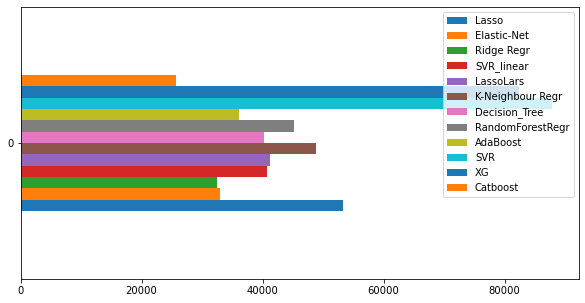

In [499]:
best_scores.plot(kind='barh', figsize=(10,5));


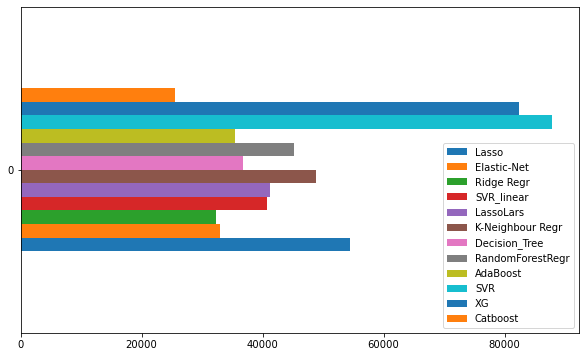

In [500]:
rmse_scores_df.plot(kind='barh', figsize=(10,6));

## Submitting 

In [501]:
test_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_NA,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NO,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,0,1,0,1,...,730.0,140,0,0,0,120,0,0,6,2010
1,0,0,0,0,1,0,0,1,0,1,...,312.0,393,36,0,0,0,0,12500,6,2010
2,0,0,0,0,1,0,0,1,0,1,...,482.0,212,34,0,0,0,0,0,3,2010
3,0,0,0,0,1,0,0,1,0,1,...,470.0,360,36,0,0,0,0,0,6,2010
4,0,0,0,0,1,0,0,1,0,1,...,506.0,0,82,0,0,144,0,0,1,2010


In [502]:
test_id = pd.read_csv("./data/test.csv")

In [692]:
dropped_feature_imp.nlargest(256)

GrLivArea                0.021155
LotArea                  0.020545
1stFlrSF                 0.020347
MoSold                   0.020252
BsmtUnfSF                0.020001
TotalBsmtSF              0.019727
GarageArea               0.019376
YearRemodAdd             0.018926
LotFrontage              0.018747
YrSold                   0.018624
YearBuilt                0.018077
GarageYrBlt              0.017852
BsmtFinSF1               0.017176
TotRmsAbvGrd             0.016517
WoodDeckSF               0.015736
OpenPorchSF              0.015532
OverallQual              0.014556
2ndFlrSF                 0.012892
MasVnrArea               0.012765
BedroomAbvGr             0.011919
OverallCond              0.010716
BsmtFullBath             0.010495
MSSubClass               0.010146
LotConfig_Inside         0.009717
BsmtExposure_No          0.009412
LotShape_Reg             0.009139
Fireplaces               0.009026
GarageCars               0.008953
LotShape_IR1             0.008814
GarageFinish_R

In [693]:
# Run the model with full trainset
dropped_X_train = dropped_X[dropped_extract_features(256)]
dropped_y_train = y

catboost_model = CatBoostRegressor(loss_function="RMSE",
                           eval_metric="RMSE",
                           learning_rate=0.01,
                            iterations=18000,
                           l2_leaf_reg=2,
                           random_seed=42,
                           od_type="Iter",
                           depth=2)
catboost_model.fit(dropped_X_train , dropped_y_train)

0:	learn: 78993.5939853	total: 7.23ms	remaining: 2m 10s
1:	learn: 78556.9549198	total: 22ms	remaining: 3m 18s
2:	learn: 78162.1715020	total: 35.6ms	remaining: 3m 33s
3:	learn: 77726.1121037	total: 51.2ms	remaining: 3m 50s
4:	learn: 77300.6412438	total: 79.5ms	remaining: 4m 46s
5:	learn: 76883.1229520	total: 136ms	remaining: 6m 49s
6:	learn: 76467.1807519	total: 147ms	remaining: 6m 17s
7:	learn: 76057.9996844	total: 154ms	remaining: 5m 45s
8:	learn: 75687.1163443	total: 162ms	remaining: 5m 24s
9:	learn: 75297.0253756	total: 175ms	remaining: 5m 14s
10:	learn: 74901.5693569	total: 183ms	remaining: 4m 58s
11:	learn: 74503.5919226	total: 190ms	remaining: 4m 44s
12:	learn: 74118.5742861	total: 198ms	remaining: 4m 34s
13:	learn: 73730.0765430	total: 205ms	remaining: 4m 23s
14:	learn: 73375.8228728	total: 241ms	remaining: 4m 49s
15:	learn: 73048.4507917	total: 250ms	remaining: 4m 41s
16:	learn: 72661.0710495	total: 258ms	remaining: 4m 33s
17:	learn: 72320.9279947	total: 267ms	remaining: 4m 26s

156:	learn: 43995.3091100	total: 1.84s	remaining: 3m 29s
157:	learn: 43897.5872796	total: 1.85s	remaining: 3m 29s
158:	learn: 43789.9927566	total: 1.86s	remaining: 3m 28s
159:	learn: 43690.1612539	total: 1.87s	remaining: 3m 28s
160:	learn: 43581.4329159	total: 1.88s	remaining: 3m 27s
161:	learn: 43486.3124258	total: 1.88s	remaining: 3m 27s
162:	learn: 43396.6832792	total: 1.92s	remaining: 3m 29s
163:	learn: 43283.6204842	total: 1.92s	remaining: 3m 29s
164:	learn: 43180.7408867	total: 1.93s	remaining: 3m 28s
165:	learn: 43072.8748079	total: 1.94s	remaining: 3m 28s
166:	learn: 42969.1372788	total: 1.95s	remaining: 3m 28s
167:	learn: 42881.2332365	total: 1.95s	remaining: 3m 27s
168:	learn: 42783.3261664	total: 1.96s	remaining: 3m 26s
169:	learn: 42687.5359983	total: 1.97s	remaining: 3m 26s
170:	learn: 42604.6152735	total: 1.97s	remaining: 3m 25s
171:	learn: 42507.2856249	total: 1.98s	remaining: 3m 24s
172:	learn: 42422.0263427	total: 1.98s	remaining: 3m 24s
173:	learn: 42348.4642494	total

303:	learn: 34319.6073182	total: 3.33s	remaining: 3m 14s
304:	learn: 34296.8925499	total: 3.34s	remaining: 3m 13s
305:	learn: 34253.3624370	total: 3.35s	remaining: 3m 13s
306:	learn: 34211.2712276	total: 3.37s	remaining: 3m 14s
307:	learn: 34172.8267650	total: 3.42s	remaining: 3m 16s
308:	learn: 34137.6831880	total: 3.42s	remaining: 3m 15s
309:	learn: 34102.5088452	total: 3.43s	remaining: 3m 15s
310:	learn: 34066.5764194	total: 3.44s	remaining: 3m 15s
311:	learn: 34028.7257532	total: 3.45s	remaining: 3m 15s
312:	learn: 33996.2087386	total: 3.46s	remaining: 3m 15s
313:	learn: 33956.1628278	total: 3.46s	remaining: 3m 15s
314:	learn: 33917.3582996	total: 3.47s	remaining: 3m 14s
315:	learn: 33880.1760663	total: 3.5s	remaining: 3m 15s
316:	learn: 33837.1591069	total: 3.51s	remaining: 3m 15s
317:	learn: 33803.2753371	total: 3.52s	remaining: 3m 15s
318:	learn: 33764.6376371	total: 3.52s	remaining: 3m 15s
319:	learn: 33728.4640081	total: 3.53s	remaining: 3m 15s
320:	learn: 33688.4265608	total:

449:	learn: 29985.7020913	total: 4.63s	remaining: 3m
450:	learn: 29967.1835745	total: 4.64s	remaining: 3m
451:	learn: 29945.6618401	total: 4.65s	remaining: 3m
452:	learn: 29922.1086284	total: 4.66s	remaining: 3m
453:	learn: 29895.7429300	total: 4.66s	remaining: 3m
454:	learn: 29878.2069845	total: 4.69s	remaining: 3m 1s
455:	learn: 29859.2386181	total: 4.71s	remaining: 3m 1s
456:	learn: 29840.6909573	total: 4.72s	remaining: 3m 1s
457:	learn: 29821.4036906	total: 4.72s	remaining: 3m
458:	learn: 29804.4202323	total: 4.73s	remaining: 3m
459:	learn: 29787.4419630	total: 4.74s	remaining: 3m
460:	learn: 29750.7635150	total: 4.75s	remaining: 3m
461:	learn: 29739.1891430	total: 4.76s	remaining: 3m
462:	learn: 29719.9774388	total: 4.77s	remaining: 3m
463:	learn: 29696.9049929	total: 4.77s	remaining: 3m
464:	learn: 29677.0957684	total: 4.78s	remaining: 3m
465:	learn: 29654.0102254	total: 4.79s	remaining: 3m
466:	learn: 29637.9634417	total: 4.79s	remaining: 3m
467:	learn: 29616.9124477	total: 4.8s

601:	learn: 27329.0493303	total: 6.84s	remaining: 3m 17s
602:	learn: 27315.2127329	total: 6.87s	remaining: 3m 18s
603:	learn: 27307.1684236	total: 6.88s	remaining: 3m 18s
604:	learn: 27294.5088761	total: 6.89s	remaining: 3m 18s
605:	learn: 27281.9894652	total: 6.9s	remaining: 3m 18s
606:	learn: 27271.6558202	total: 6.93s	remaining: 3m 18s
607:	learn: 27255.9955560	total: 6.98s	remaining: 3m 19s
608:	learn: 27244.1859114	total: 6.99s	remaining: 3m 19s
609:	learn: 27221.8055860	total: 6.99s	remaining: 3m 19s
610:	learn: 27209.4481852	total: 7s	remaining: 3m 19s
611:	learn: 27192.7293168	total: 7.03s	remaining: 3m 19s
612:	learn: 27183.4851938	total: 7.04s	remaining: 3m 19s
613:	learn: 27163.2566068	total: 7.05s	remaining: 3m 19s
614:	learn: 27151.0298310	total: 7.06s	remaining: 3m 19s
615:	learn: 27139.5118504	total: 7.07s	remaining: 3m 19s
616:	learn: 27131.5736042	total: 7.08s	remaining: 3m 19s
617:	learn: 27118.7884555	total: 7.08s	remaining: 3m 19s
618:	learn: 27104.9966691	total: 7.

750:	learn: 25559.4841958	total: 9.29s	remaining: 3m 33s
751:	learn: 25545.8010220	total: 9.3s	remaining: 3m 33s
752:	learn: 25534.5161674	total: 9.31s	remaining: 3m 33s
753:	learn: 25519.7920062	total: 9.33s	remaining: 3m 33s
754:	learn: 25511.0937798	total: 9.34s	remaining: 3m 33s
755:	learn: 25502.2548292	total: 9.35s	remaining: 3m 33s
756:	learn: 25493.1904423	total: 9.37s	remaining: 3m 33s
757:	learn: 25484.3540122	total: 9.38s	remaining: 3m 33s
758:	learn: 25474.3223829	total: 9.39s	remaining: 3m 33s
759:	learn: 25465.5702202	total: 9.41s	remaining: 3m 33s
760:	learn: 25455.2894508	total: 9.44s	remaining: 3m 33s
761:	learn: 25445.2486426	total: 9.45s	remaining: 3m 33s
762:	learn: 25434.9019037	total: 9.49s	remaining: 3m 34s
763:	learn: 25413.2053477	total: 9.5s	remaining: 3m 34s
764:	learn: 25405.5909267	total: 9.51s	remaining: 3m 34s
765:	learn: 25397.3277129	total: 9.55s	remaining: 3m 34s
766:	learn: 25388.5188928	total: 9.59s	remaining: 3m 35s
767:	learn: 25380.3600355	total: 

901:	learn: 24160.6361226	total: 12s	remaining: 3m 46s
902:	learn: 24152.9715676	total: 12s	remaining: 3m 46s
903:	learn: 24145.3325836	total: 12s	remaining: 3m 46s
904:	learn: 24138.0074984	total: 12s	remaining: 3m 46s
905:	learn: 24130.8501640	total: 12s	remaining: 3m 46s
906:	learn: 24123.7764102	total: 12s	remaining: 3m 46s
907:	learn: 24109.5374859	total: 12s	remaining: 3m 46s
908:	learn: 24102.8296353	total: 12s	remaining: 3m 46s
909:	learn: 24097.2917130	total: 12s	remaining: 3m 46s
910:	learn: 24087.7697751	total: 12.1s	remaining: 3m 46s
911:	learn: 24081.1706490	total: 12.1s	remaining: 3m 46s
912:	learn: 24074.2629443	total: 12.1s	remaining: 3m 45s
913:	learn: 24067.7509333	total: 12.1s	remaining: 3m 45s
914:	learn: 24059.8551306	total: 12.1s	remaining: 3m 45s
915:	learn: 24051.3551009	total: 12.1s	remaining: 3m 45s
916:	learn: 24044.4581752	total: 12.2s	remaining: 3m 46s
917:	learn: 24036.8872276	total: 12.2s	remaining: 3m 46s
918:	learn: 24027.5915163	total: 12.3s	remaining:

1052:	learn: 23115.4018367	total: 14.6s	remaining: 3m 55s
1053:	learn: 23109.9889530	total: 14.6s	remaining: 3m 55s
1054:	learn: 23102.3665603	total: 14.7s	remaining: 3m 55s
1055:	learn: 23099.0985641	total: 14.7s	remaining: 3m 55s
1056:	learn: 23094.3405087	total: 14.7s	remaining: 3m 55s
1057:	learn: 23087.8206672	total: 14.7s	remaining: 3m 55s
1058:	learn: 23081.0099378	total: 14.7s	remaining: 3m 55s
1059:	learn: 23075.8882929	total: 14.8s	remaining: 3m 55s
1060:	learn: 23069.2056755	total: 14.8s	remaining: 3m 55s
1061:	learn: 23063.9226211	total: 14.8s	remaining: 3m 55s
1062:	learn: 23057.7244747	total: 14.8s	remaining: 3m 55s
1063:	learn: 23051.1717287	total: 14.9s	remaining: 3m 56s
1064:	learn: 23044.8330375	total: 14.9s	remaining: 3m 56s
1065:	learn: 23038.5644567	total: 14.9s	remaining: 3m 56s
1066:	learn: 23036.3297603	total: 14.9s	remaining: 3m 56s
1067:	learn: 23030.7508072	total: 14.9s	remaining: 3m 56s
1068:	learn: 23023.7158949	total: 14.9s	remaining: 3m 56s
1069:	learn: 2

1202:	learn: 22144.8444995	total: 17s	remaining: 3m 56s
1203:	learn: 22139.9884807	total: 17s	remaining: 3m 56s
1204:	learn: 22135.7269140	total: 17s	remaining: 3m 56s
1205:	learn: 22130.5670249	total: 17s	remaining: 3m 56s
1206:	learn: 22126.9188503	total: 17s	remaining: 3m 56s
1207:	learn: 22119.9934971	total: 17s	remaining: 3m 56s
1208:	learn: 22113.1558659	total: 17s	remaining: 3m 56s
1209:	learn: 22108.1290623	total: 17s	remaining: 3m 56s
1210:	learn: 22103.8239282	total: 17s	remaining: 3m 56s
1211:	learn: 22095.9572189	total: 17.1s	remaining: 3m 56s
1212:	learn: 22090.9080899	total: 17.1s	remaining: 3m 56s
1213:	learn: 22087.5289229	total: 17.1s	remaining: 3m 55s
1214:	learn: 22083.2243834	total: 17.1s	remaining: 3m 55s
1215:	learn: 22070.4482559	total: 17.1s	remaining: 3m 55s
1216:	learn: 22065.1502327	total: 17.1s	remaining: 3m 55s
1217:	learn: 22059.6555743	total: 17.1s	remaining: 3m 55s
1218:	learn: 22054.5379407	total: 17.1s	remaining: 3m 55s
1219:	learn: 22049.7769566	total

1350:	learn: 21392.8077514	total: 18.2s	remaining: 3m 44s
1351:	learn: 21382.7171954	total: 18.2s	remaining: 3m 44s
1352:	learn: 21377.5510734	total: 18.2s	remaining: 3m 44s
1353:	learn: 21370.4908454	total: 18.2s	remaining: 3m 44s
1354:	learn: 21365.4146580	total: 18.2s	remaining: 3m 43s
1355:	learn: 21358.6909231	total: 18.3s	remaining: 3m 44s
1356:	learn: 21354.6623867	total: 18.3s	remaining: 3m 44s
1357:	learn: 21351.2410663	total: 18.3s	remaining: 3m 43s
1358:	learn: 21348.4315458	total: 18.3s	remaining: 3m 43s
1359:	learn: 21343.8899946	total: 18.3s	remaining: 3m 43s
1360:	learn: 21338.6431712	total: 18.3s	remaining: 3m 43s
1361:	learn: 21333.5511179	total: 18.3s	remaining: 3m 43s
1362:	learn: 21329.8788443	total: 18.3s	remaining: 3m 43s
1363:	learn: 21323.5787267	total: 18.3s	remaining: 3m 43s
1364:	learn: 21318.7351912	total: 18.3s	remaining: 3m 43s
1365:	learn: 21314.3263843	total: 18.3s	remaining: 3m 43s
1366:	learn: 21310.2874578	total: 18.3s	remaining: 3m 43s
1367:	learn: 2

1510:	learn: 20718.1957153	total: 19.5s	remaining: 3m 32s
1511:	learn: 20714.5901968	total: 19.5s	remaining: 3m 32s
1512:	learn: 20711.1625619	total: 19.5s	remaining: 3m 32s
1513:	learn: 20707.4920339	total: 19.5s	remaining: 3m 32s
1514:	learn: 20702.8688594	total: 19.5s	remaining: 3m 32s
1515:	learn: 20699.4048760	total: 19.6s	remaining: 3m 32s
1516:	learn: 20695.1357393	total: 19.6s	remaining: 3m 32s
1517:	learn: 20689.4617129	total: 19.6s	remaining: 3m 32s
1518:	learn: 20687.2860672	total: 19.6s	remaining: 3m 32s
1519:	learn: 20684.1570166	total: 19.6s	remaining: 3m 32s
1520:	learn: 20681.1815920	total: 19.6s	remaining: 3m 32s
1521:	learn: 20679.0339502	total: 19.6s	remaining: 3m 32s
1522:	learn: 20675.3597456	total: 19.6s	remaining: 3m 32s
1523:	learn: 20672.1259266	total: 19.6s	remaining: 3m 32s
1524:	learn: 20664.3666631	total: 19.6s	remaining: 3m 31s
1525:	learn: 20660.0091619	total: 19.6s	remaining: 3m 31s
1526:	learn: 20656.1538948	total: 19.6s	remaining: 3m 31s
1527:	learn: 2

1666:	learn: 20147.9808750	total: 20.8s	remaining: 3m 23s
1667:	learn: 20143.2506834	total: 20.8s	remaining: 3m 23s
1668:	learn: 20139.2969095	total: 20.8s	remaining: 3m 23s
1669:	learn: 20137.1229315	total: 20.8s	remaining: 3m 23s
1670:	learn: 20134.4795323	total: 20.9s	remaining: 3m 24s
1671:	learn: 20131.5818170	total: 20.9s	remaining: 3m 23s
1672:	learn: 20128.6266383	total: 20.9s	remaining: 3m 23s
1673:	learn: 20124.7364033	total: 20.9s	remaining: 3m 23s
1674:	learn: 20121.3969499	total: 20.9s	remaining: 3m 23s
1675:	learn: 20117.2737990	total: 20.9s	remaining: 3m 23s
1676:	learn: 20113.5439859	total: 20.9s	remaining: 3m 23s
1677:	learn: 20109.8956651	total: 20.9s	remaining: 3m 23s
1678:	learn: 20108.2353565	total: 20.9s	remaining: 3m 23s
1679:	learn: 20106.5957047	total: 20.9s	remaining: 3m 23s
1680:	learn: 20103.7742625	total: 21s	remaining: 3m 23s
1681:	learn: 20100.5652552	total: 21s	remaining: 3m 23s
1682:	learn: 20097.4673165	total: 21s	remaining: 3m 23s
1683:	learn: 20094.7

1821:	learn: 19682.3617077	total: 22s	remaining: 3m 15s
1822:	learn: 19681.7026537	total: 22.1s	remaining: 3m 15s
1823:	learn: 19679.3309754	total: 22.1s	remaining: 3m 15s
1824:	learn: 19678.0752783	total: 22.1s	remaining: 3m 15s
1825:	learn: 19674.6395733	total: 22.1s	remaining: 3m 15s
1826:	learn: 19672.4487492	total: 22.1s	remaining: 3m 15s
1827:	learn: 19670.2395858	total: 22.1s	remaining: 3m 15s
1828:	learn: 19666.0673522	total: 22.1s	remaining: 3m 15s
1829:	learn: 19663.4046329	total: 22.1s	remaining: 3m 15s
1830:	learn: 19661.2681723	total: 22.1s	remaining: 3m 15s
1831:	learn: 19656.6400970	total: 22.1s	remaining: 3m 15s
1832:	learn: 19652.3244522	total: 22.1s	remaining: 3m 15s
1833:	learn: 19650.3394653	total: 22.1s	remaining: 3m 15s
1834:	learn: 19648.0284099	total: 22.1s	remaining: 3m 15s
1835:	learn: 19647.2520679	total: 22.1s	remaining: 3m 15s
1836:	learn: 19644.5075408	total: 22.2s	remaining: 3m 14s
1837:	learn: 19641.1725264	total: 22.2s	remaining: 3m 14s
1838:	learn: 196

1966:	learn: 19295.4543726	total: 23.2s	remaining: 3m 8s
1967:	learn: 19293.6424093	total: 23.2s	remaining: 3m 8s
1968:	learn: 19288.3061910	total: 23.2s	remaining: 3m 8s
1969:	learn: 19286.2522058	total: 23.2s	remaining: 3m 8s
1970:	learn: 19284.1762706	total: 23.2s	remaining: 3m 8s
1971:	learn: 19278.9321288	total: 23.2s	remaining: 3m 8s
1972:	learn: 19276.8257189	total: 23.2s	remaining: 3m 8s
1973:	learn: 19274.7625621	total: 23.2s	remaining: 3m 8s
1974:	learn: 19272.4830371	total: 23.3s	remaining: 3m 8s
1975:	learn: 19270.0864769	total: 23.3s	remaining: 3m 8s
1976:	learn: 19265.0354211	total: 23.3s	remaining: 3m 8s
1977:	learn: 19263.2376910	total: 23.3s	remaining: 3m 8s
1978:	learn: 19261.1178725	total: 23.3s	remaining: 3m 8s
1979:	learn: 19259.0846515	total: 23.3s	remaining: 3m 8s
1980:	learn: 19255.7559398	total: 23.3s	remaining: 3m 8s
1981:	learn: 19253.9119160	total: 23.3s	remaining: 3m 8s
1982:	learn: 19251.2461509	total: 23.3s	remaining: 3m 8s
1983:	learn: 19248.4696536	tota

2125:	learn: 18892.3643828	total: 24.5s	remaining: 3m 2s
2126:	learn: 18890.9147138	total: 24.5s	remaining: 3m 2s
2127:	learn: 18888.7341979	total: 24.5s	remaining: 3m 2s
2128:	learn: 18886.1881094	total: 24.5s	remaining: 3m 2s
2129:	learn: 18881.6393664	total: 24.5s	remaining: 3m 2s
2130:	learn: 18879.7340407	total: 24.5s	remaining: 3m 2s
2131:	learn: 18878.3530674	total: 24.5s	remaining: 3m 2s
2132:	learn: 18874.7357133	total: 24.6s	remaining: 3m 2s
2133:	learn: 18873.0512441	total: 24.6s	remaining: 3m 2s
2134:	learn: 18871.4799433	total: 24.6s	remaining: 3m 2s
2135:	learn: 18869.7010395	total: 24.6s	remaining: 3m 2s
2136:	learn: 18866.8659786	total: 24.6s	remaining: 3m 2s
2137:	learn: 18864.5458773	total: 24.6s	remaining: 3m 2s
2138:	learn: 18860.9726682	total: 24.6s	remaining: 3m 2s
2139:	learn: 18856.5346643	total: 24.6s	remaining: 3m 2s
2140:	learn: 18854.1534093	total: 24.6s	remaining: 3m 2s
2141:	learn: 18852.5031407	total: 24.6s	remaining: 3m 2s
2142:	learn: 18849.1254398	tota

2288:	learn: 18530.0689673	total: 25.7s	remaining: 2m 56s
2289:	learn: 18529.4954397	total: 25.8s	remaining: 2m 56s
2290:	learn: 18527.8616599	total: 25.8s	remaining: 2m 56s
2291:	learn: 18526.2379857	total: 25.8s	remaining: 2m 56s
2292:	learn: 18522.1107454	total: 25.8s	remaining: 2m 56s
2293:	learn: 18518.8190614	total: 25.8s	remaining: 2m 56s
2294:	learn: 18517.3659102	total: 25.8s	remaining: 2m 56s
2295:	learn: 18516.4102852	total: 25.8s	remaining: 2m 56s
2296:	learn: 18514.9660836	total: 25.9s	remaining: 2m 56s
2297:	learn: 18512.9511344	total: 25.9s	remaining: 2m 56s
2298:	learn: 18509.7081778	total: 25.9s	remaining: 2m 56s
2299:	learn: 18505.6834688	total: 25.9s	remaining: 2m 56s
2300:	learn: 18502.1124265	total: 25.9s	remaining: 2m 56s
2301:	learn: 18500.8504872	total: 25.9s	remaining: 2m 56s
2302:	learn: 18499.1435819	total: 25.9s	remaining: 2m 56s
2303:	learn: 18497.2951008	total: 25.9s	remaining: 2m 56s
2304:	learn: 18493.7843258	total: 25.9s	remaining: 2m 56s
2305:	learn: 1

2435:	learn: 18222.3752892	total: 27.6s	remaining: 2m 56s
2436:	learn: 18219.1438484	total: 27.6s	remaining: 2m 56s
2437:	learn: 18217.4508716	total: 27.6s	remaining: 2m 56s
2438:	learn: 18216.3022307	total: 27.6s	remaining: 2m 56s
2439:	learn: 18214.7797169	total: 27.7s	remaining: 2m 56s
2440:	learn: 18212.6579809	total: 27.7s	remaining: 2m 56s
2441:	learn: 18209.7464569	total: 27.7s	remaining: 2m 56s
2442:	learn: 18206.1265923	total: 27.7s	remaining: 2m 56s
2443:	learn: 18203.0407742	total: 27.7s	remaining: 2m 56s
2444:	learn: 18201.5456996	total: 27.7s	remaining: 2m 56s
2445:	learn: 18199.2028067	total: 27.7s	remaining: 2m 56s
2446:	learn: 18195.6392113	total: 27.7s	remaining: 2m 56s
2447:	learn: 18193.9885817	total: 27.7s	remaining: 2m 56s
2448:	learn: 18190.4457974	total: 27.8s	remaining: 2m 56s
2449:	learn: 18187.2682845	total: 27.8s	remaining: 2m 56s
2450:	learn: 18185.5897477	total: 27.8s	remaining: 2m 56s
2451:	learn: 18184.2121067	total: 27.8s	remaining: 2m 56s
2452:	learn: 1

2588:	learn: 17914.5483118	total: 29.9s	remaining: 2m 58s
2589:	learn: 17910.3719429	total: 29.9s	remaining: 2m 58s
2590:	learn: 17907.0268154	total: 29.9s	remaining: 2m 57s
2591:	learn: 17905.8333319	total: 29.9s	remaining: 2m 58s
2592:	learn: 17902.7017687	total: 30s	remaining: 2m 58s
2593:	learn: 17901.0211702	total: 30s	remaining: 2m 58s
2594:	learn: 17899.4512928	total: 30s	remaining: 2m 58s
2595:	learn: 17897.8945577	total: 30s	remaining: 2m 58s
2596:	learn: 17893.4645199	total: 30s	remaining: 2m 57s
2597:	learn: 17891.9113833	total: 30s	remaining: 2m 57s
2598:	learn: 17890.2092060	total: 30s	remaining: 2m 57s
2599:	learn: 17887.2316940	total: 30s	remaining: 2m 57s
2600:	learn: 17883.9116952	total: 30s	remaining: 2m 57s
2601:	learn: 17882.0500408	total: 30s	remaining: 2m 57s
2602:	learn: 17880.4160240	total: 30s	remaining: 2m 57s
2603:	learn: 17878.2321220	total: 30.1s	remaining: 2m 57s
2604:	learn: 17877.7376522	total: 30.1s	remaining: 2m 57s
2605:	learn: 17875.0910287	total: 30

2731:	learn: 17648.5675636	total: 31.2s	remaining: 2m 54s
2732:	learn: 17646.9570910	total: 31.2s	remaining: 2m 54s
2733:	learn: 17645.3586707	total: 31.3s	remaining: 2m 54s
2734:	learn: 17644.2667137	total: 31.3s	remaining: 2m 54s
2735:	learn: 17643.8084424	total: 31.3s	remaining: 2m 54s
2736:	learn: 17642.3288477	total: 31.3s	remaining: 2m 54s
2737:	learn: 17640.7419148	total: 31.3s	remaining: 2m 54s
2738:	learn: 17639.2458988	total: 31.4s	remaining: 2m 54s
2739:	learn: 17637.6701813	total: 31.4s	remaining: 2m 54s
2740:	learn: 17637.2096432	total: 31.4s	remaining: 2m 54s
2741:	learn: 17634.1736312	total: 31.4s	remaining: 2m 54s
2742:	learn: 17633.1854333	total: 31.4s	remaining: 2m 54s
2743:	learn: 17630.0175756	total: 31.4s	remaining: 2m 54s
2744:	learn: 17628.9134527	total: 31.4s	remaining: 2m 54s
2745:	learn: 17627.4816328	total: 31.4s	remaining: 2m 54s
2746:	learn: 17626.7496501	total: 31.5s	remaining: 2m 54s
2747:	learn: 17625.2792002	total: 31.5s	remaining: 2m 54s
2748:	learn: 1

2888:	learn: 17386.6777682	total: 32.5s	remaining: 2m 50s
2889:	learn: 17385.1611408	total: 32.5s	remaining: 2m 50s
2890:	learn: 17382.2780247	total: 32.5s	remaining: 2m 50s
2891:	learn: 17380.5505338	total: 32.5s	remaining: 2m 50s
2892:	learn: 17378.4066545	total: 32.5s	remaining: 2m 49s
2893:	learn: 17375.9991128	total: 32.6s	remaining: 2m 49s
2894:	learn: 17374.6533503	total: 32.6s	remaining: 2m 49s
2895:	learn: 17371.2684218	total: 32.6s	remaining: 2m 49s
2896:	learn: 17369.1638992	total: 32.6s	remaining: 2m 49s
2897:	learn: 17368.1996432	total: 32.6s	remaining: 2m 49s
2898:	learn: 17364.8800369	total: 32.6s	remaining: 2m 49s
2899:	learn: 17363.7414691	total: 32.6s	remaining: 2m 49s
2900:	learn: 17361.6705333	total: 32.6s	remaining: 2m 49s
2901:	learn: 17360.8913894	total: 32.6s	remaining: 2m 49s
2902:	learn: 17357.9368103	total: 32.6s	remaining: 2m 49s
2903:	learn: 17356.4972216	total: 32.6s	remaining: 2m 49s
2904:	learn: 17355.1848594	total: 32.7s	remaining: 2m 49s
2905:	learn: 1

3041:	learn: 17133.9097238	total: 33.8s	remaining: 2m 46s
3042:	learn: 17133.0568372	total: 33.8s	remaining: 2m 46s
3043:	learn: 17132.1706560	total: 33.8s	remaining: 2m 46s
3044:	learn: 17129.9159303	total: 33.8s	remaining: 2m 46s
3045:	learn: 17128.4854502	total: 33.8s	remaining: 2m 46s
3046:	learn: 17125.8623296	total: 33.8s	remaining: 2m 46s
3047:	learn: 17124.5107463	total: 33.9s	remaining: 2m 46s
3048:	learn: 17124.1201824	total: 33.9s	remaining: 2m 46s
3049:	learn: 17123.2368690	total: 33.9s	remaining: 2m 46s
3050:	learn: 17121.6308360	total: 33.9s	remaining: 2m 45s
3051:	learn: 17118.9284910	total: 33.9s	remaining: 2m 45s
3052:	learn: 17118.5334845	total: 33.9s	remaining: 2m 45s
3053:	learn: 17117.3246133	total: 33.9s	remaining: 2m 45s
3054:	learn: 17116.1820694	total: 33.9s	remaining: 2m 45s
3055:	learn: 17115.3029970	total: 33.9s	remaining: 2m 45s
3056:	learn: 17114.7758719	total: 33.9s	remaining: 2m 45s
3057:	learn: 17113.9071394	total: 33.9s	remaining: 2m 45s
3058:	learn: 1

3189:	learn: 16908.6821269	total: 35.1s	remaining: 2m 43s
3190:	learn: 16906.0763247	total: 35.2s	remaining: 2m 43s
3191:	learn: 16904.1931577	total: 35.2s	remaining: 2m 43s
3192:	learn: 16901.5970060	total: 35.2s	remaining: 2m 43s
3193:	learn: 16899.7407032	total: 35.2s	remaining: 2m 43s
3194:	learn: 16898.7591003	total: 35.2s	remaining: 2m 43s
3195:	learn: 16896.7000373	total: 35.2s	remaining: 2m 43s
3196:	learn: 16895.7229788	total: 35.3s	remaining: 2m 43s
3197:	learn: 16894.6519983	total: 35.3s	remaining: 2m 43s
3198:	learn: 16891.5779721	total: 35.3s	remaining: 2m 43s
3199:	learn: 16889.7499731	total: 35.3s	remaining: 2m 43s
3200:	learn: 16888.1936659	total: 35.3s	remaining: 2m 43s
3201:	learn: 16886.5060228	total: 35.3s	remaining: 2m 43s
3202:	learn: 16885.3761174	total: 35.3s	remaining: 2m 43s
3203:	learn: 16883.9671337	total: 35.3s	remaining: 2m 43s
3204:	learn: 16882.9989907	total: 35.3s	remaining: 2m 42s
3205:	learn: 16882.7094071	total: 35.3s	remaining: 2m 42s
3206:	learn: 1

3345:	learn: 16657.6729882	total: 36.4s	remaining: 2m 39s
3346:	learn: 16656.8747350	total: 36.5s	remaining: 2m 39s
3347:	learn: 16656.0432631	total: 36.5s	remaining: 2m 39s
3348:	learn: 16655.7119011	total: 36.5s	remaining: 2m 39s
3349:	learn: 16654.0795265	total: 36.5s	remaining: 2m 39s
3350:	learn: 16652.6832375	total: 36.5s	remaining: 2m 39s
3351:	learn: 16650.7331857	total: 36.6s	remaining: 2m 39s
3352:	learn: 16650.4054591	total: 36.6s	remaining: 2m 39s
3353:	learn: 16649.1489106	total: 36.6s	remaining: 2m 39s
3354:	learn: 16646.6990214	total: 36.6s	remaining: 2m 39s
3355:	learn: 16644.5714992	total: 36.6s	remaining: 2m 39s
3356:	learn: 16642.9261259	total: 36.6s	remaining: 2m 39s
3357:	learn: 16641.3777998	total: 36.6s	remaining: 2m 39s
3358:	learn: 16640.2590769	total: 36.6s	remaining: 2m 39s
3359:	learn: 16637.9676099	total: 36.6s	remaining: 2m 39s
3360:	learn: 16635.0308965	total: 36.6s	remaining: 2m 39s
3361:	learn: 16633.5133020	total: 36.6s	remaining: 2m 39s
3362:	learn: 1

3501:	learn: 16432.9569913	total: 37.7s	remaining: 2m 36s
3502:	learn: 16430.6492075	total: 37.7s	remaining: 2m 36s
3503:	learn: 16428.3399760	total: 37.8s	remaining: 2m 36s
3504:	learn: 16427.3807715	total: 37.8s	remaining: 2m 36s
3505:	learn: 16426.4859804	total: 37.8s	remaining: 2m 36s
3506:	learn: 16426.2387392	total: 37.8s	remaining: 2m 36s
3507:	learn: 16425.3414615	total: 37.8s	remaining: 2m 36s
3508:	learn: 16423.1726068	total: 37.8s	remaining: 2m 36s
3509:	learn: 16422.2770956	total: 37.8s	remaining: 2m 36s
3510:	learn: 16421.4741538	total: 37.9s	remaining: 2m 36s
3511:	learn: 16420.6583656	total: 37.9s	remaining: 2m 36s
3512:	learn: 16418.5041386	total: 37.9s	remaining: 2m 36s
3513:	learn: 16417.5729847	total: 37.9s	remaining: 2m 36s
3514:	learn: 16416.0527252	total: 37.9s	remaining: 2m 36s
3515:	learn: 16414.7039525	total: 37.9s	remaining: 2m 36s
3516:	learn: 16413.7344372	total: 37.9s	remaining: 2m 36s
3517:	learn: 16412.7591338	total: 38s	remaining: 2m 36s
3518:	learn: 164

3652:	learn: 16224.5198568	total: 39s	remaining: 2m 33s
3653:	learn: 16223.0977182	total: 39s	remaining: 2m 33s
3654:	learn: 16221.6123466	total: 39.1s	remaining: 2m 33s
3655:	learn: 16219.6287917	total: 39.1s	remaining: 2m 33s
3656:	learn: 16218.1862559	total: 39.1s	remaining: 2m 33s
3657:	learn: 16216.8296686	total: 39.1s	remaining: 2m 33s
3658:	learn: 16215.8583819	total: 39.1s	remaining: 2m 33s
3659:	learn: 16214.7975886	total: 39.1s	remaining: 2m 33s
3660:	learn: 16213.7545145	total: 39.1s	remaining: 2m 33s
3661:	learn: 16212.9106810	total: 39.1s	remaining: 2m 33s
3662:	learn: 16212.2694883	total: 39.1s	remaining: 2m 33s
3663:	learn: 16212.0328878	total: 39.1s	remaining: 2m 33s
3664:	learn: 16211.1129636	total: 39.1s	remaining: 2m 33s
3665:	learn: 16209.8091174	total: 39.2s	remaining: 2m 33s
3666:	learn: 16209.5253064	total: 39.2s	remaining: 2m 33s
3667:	learn: 16208.7360869	total: 39.2s	remaining: 2m 33s
3668:	learn: 16208.0120808	total: 39.2s	remaining: 2m 33s
3669:	learn: 16207

3804:	learn: 16032.1915624	total: 40.3s	remaining: 2m 30s
3805:	learn: 16029.5875876	total: 40.3s	remaining: 2m 30s
3806:	learn: 16028.1010862	total: 40.3s	remaining: 2m 30s
3807:	learn: 16026.4704869	total: 40.4s	remaining: 2m 30s
3808:	learn: 16025.0575227	total: 40.4s	remaining: 2m 30s
3809:	learn: 16022.1881994	total: 40.4s	remaining: 2m 30s
3810:	learn: 16020.1135350	total: 40.4s	remaining: 2m 30s
3811:	learn: 16019.4287780	total: 40.4s	remaining: 2m 30s
3812:	learn: 16019.1141753	total: 40.4s	remaining: 2m 30s
3813:	learn: 16018.1438003	total: 40.4s	remaining: 2m 30s
3814:	learn: 16017.1883552	total: 40.4s	remaining: 2m 30s
3815:	learn: 16016.1227991	total: 40.4s	remaining: 2m 30s
3816:	learn: 16014.2365593	total: 40.4s	remaining: 2m 30s
3817:	learn: 16013.3927082	total: 40.4s	remaining: 2m 30s
3818:	learn: 16011.9875564	total: 40.5s	remaining: 2m 30s
3819:	learn: 16010.7260939	total: 40.5s	remaining: 2m 30s
3820:	learn: 16009.7111201	total: 40.5s	remaining: 2m 30s
3821:	learn: 1

3960:	learn: 15834.4164846	total: 41.7s	remaining: 2m 27s
3961:	learn: 15833.1625967	total: 41.7s	remaining: 2m 27s
3962:	learn: 15832.5057057	total: 41.8s	remaining: 2m 27s
3963:	learn: 15830.8190459	total: 41.8s	remaining: 2m 27s
3964:	learn: 15828.8304988	total: 41.8s	remaining: 2m 27s
3965:	learn: 15828.0522078	total: 41.8s	remaining: 2m 27s
3966:	learn: 15826.6758086	total: 41.8s	remaining: 2m 27s
3967:	learn: 15824.2208614	total: 41.8s	remaining: 2m 27s
3968:	learn: 15823.1177242	total: 41.8s	remaining: 2m 27s
3969:	learn: 15822.3535918	total: 41.8s	remaining: 2m 27s
3970:	learn: 15821.7916178	total: 41.8s	remaining: 2m 27s
3971:	learn: 15821.2742724	total: 41.8s	remaining: 2m 27s
3972:	learn: 15820.0344278	total: 41.8s	remaining: 2m 27s
3973:	learn: 15818.3874429	total: 41.9s	remaining: 2m 27s
3974:	learn: 15816.7993112	total: 41.9s	remaining: 2m 27s
3975:	learn: 15814.9560756	total: 41.9s	remaining: 2m 27s
3976:	learn: 15813.4230212	total: 41.9s	remaining: 2m 27s
3977:	learn: 1

4104:	learn: 15657.0679863	total: 42.9s	remaining: 2m 25s
4105:	learn: 15655.8417401	total: 42.9s	remaining: 2m 25s
4106:	learn: 15654.0059909	total: 42.9s	remaining: 2m 25s
4107:	learn: 15653.4352172	total: 42.9s	remaining: 2m 25s
4108:	learn: 15652.3289742	total: 42.9s	remaining: 2m 25s
4109:	learn: 15650.8296701	total: 42.9s	remaining: 2m 25s
4110:	learn: 15649.8720407	total: 42.9s	remaining: 2m 25s
4111:	learn: 15648.2495219	total: 42.9s	remaining: 2m 25s
4112:	learn: 15646.9737449	total: 43s	remaining: 2m 25s
4113:	learn: 15645.7450635	total: 43s	remaining: 2m 24s
4114:	learn: 15644.4131085	total: 43s	remaining: 2m 24s
4115:	learn: 15643.3653994	total: 43s	remaining: 2m 24s
4116:	learn: 15642.2824293	total: 43s	remaining: 2m 24s
4117:	learn: 15641.5726025	total: 43s	remaining: 2m 24s
4118:	learn: 15640.4794575	total: 43s	remaining: 2m 24s
4119:	learn: 15639.5354035	total: 43s	remaining: 2m 24s
4120:	learn: 15637.7954079	total: 43s	remaining: 2m 24s
4121:	learn: 15636.3594810	total

4259:	learn: 15471.4251476	total: 44.2s	remaining: 2m 22s
4260:	learn: 15470.2419740	total: 44.2s	remaining: 2m 22s
4261:	learn: 15468.7877297	total: 44.2s	remaining: 2m 22s
4262:	learn: 15467.6747604	total: 44.2s	remaining: 2m 22s
4263:	learn: 15466.7854917	total: 44.2s	remaining: 2m 22s
4264:	learn: 15465.4195966	total: 44.2s	remaining: 2m 22s
4265:	learn: 15465.0156027	total: 44.2s	remaining: 2m 22s
4266:	learn: 15463.4065757	total: 44.2s	remaining: 2m 22s
4267:	learn: 15462.1137331	total: 44.2s	remaining: 2m 22s
4268:	learn: 15460.8300399	total: 44.2s	remaining: 2m 22s
4269:	learn: 15460.1244380	total: 44.2s	remaining: 2m 22s
4270:	learn: 15459.0751553	total: 44.3s	remaining: 2m 22s
4271:	learn: 15457.9536353	total: 44.3s	remaining: 2m 22s
4272:	learn: 15457.2362009	total: 44.3s	remaining: 2m 22s
4273:	learn: 15456.7348562	total: 44.3s	remaining: 2m 22s
4274:	learn: 15455.0876049	total: 44.3s	remaining: 2m 22s
4275:	learn: 15453.3787787	total: 44.3s	remaining: 2m 22s
4276:	learn: 1

4409:	learn: 15301.6715460	total: 45.4s	remaining: 2m 20s
4410:	learn: 15299.6682519	total: 45.4s	remaining: 2m 19s
4411:	learn: 15297.9067919	total: 45.4s	remaining: 2m 19s
4412:	learn: 15295.2075629	total: 45.5s	remaining: 2m 19s
4413:	learn: 15293.8617390	total: 45.5s	remaining: 2m 19s
4414:	learn: 15292.2325159	total: 45.5s	remaining: 2m 19s
4415:	learn: 15290.6727703	total: 45.5s	remaining: 2m 19s
4416:	learn: 15288.0592892	total: 45.5s	remaining: 2m 19s
4417:	learn: 15287.6622776	total: 45.5s	remaining: 2m 19s
4418:	learn: 15287.2713088	total: 45.5s	remaining: 2m 19s
4419:	learn: 15285.5330938	total: 45.5s	remaining: 2m 19s
4420:	learn: 15284.8386720	total: 45.5s	remaining: 2m 19s
4421:	learn: 15282.6464018	total: 45.6s	remaining: 2m 19s
4422:	learn: 15282.1795720	total: 45.6s	remaining: 2m 19s
4423:	learn: 15281.3895297	total: 45.6s	remaining: 2m 19s
4424:	learn: 15279.9354630	total: 45.6s	remaining: 2m 19s
4425:	learn: 15277.7742986	total: 45.6s	remaining: 2m 19s
4426:	learn: 1

4571:	learn: 15129.4501023	total: 46.7s	remaining: 2m 17s
4572:	learn: 15127.9773587	total: 46.7s	remaining: 2m 17s
4573:	learn: 15127.0708402	total: 46.7s	remaining: 2m 17s
4574:	learn: 15125.6766986	total: 46.7s	remaining: 2m 17s
4575:	learn: 15124.8574996	total: 46.7s	remaining: 2m 17s
4576:	learn: 15123.6444872	total: 46.8s	remaining: 2m 17s
4577:	learn: 15122.0335223	total: 46.8s	remaining: 2m 17s
4578:	learn: 15121.3353207	total: 46.8s	remaining: 2m 17s
4579:	learn: 15120.6672090	total: 46.8s	remaining: 2m 17s
4580:	learn: 15120.1238281	total: 46.8s	remaining: 2m 17s
4581:	learn: 15119.3145487	total: 46.8s	remaining: 2m 17s
4582:	learn: 15118.8468930	total: 46.8s	remaining: 2m 17s
4583:	learn: 15117.6130928	total: 46.8s	remaining: 2m 17s
4584:	learn: 15117.3225352	total: 46.8s	remaining: 2m 16s
4585:	learn: 15116.4436338	total: 46.8s	remaining: 2m 16s
4586:	learn: 15115.7208274	total: 46.8s	remaining: 2m 16s
4587:	learn: 15114.6781971	total: 46.8s	remaining: 2m 16s
4588:	learn: 1

4727:	learn: 14969.6698908	total: 48s	remaining: 2m 14s
4728:	learn: 14968.7557366	total: 48s	remaining: 2m 14s
4729:	learn: 14967.7939341	total: 48s	remaining: 2m 14s
4730:	learn: 14965.6277154	total: 48s	remaining: 2m 14s
4731:	learn: 14964.9487110	total: 48s	remaining: 2m 14s
4732:	learn: 14964.3305158	total: 48.1s	remaining: 2m 14s
4733:	learn: 14962.9788438	total: 48.1s	remaining: 2m 14s
4734:	learn: 14961.6118161	total: 48.1s	remaining: 2m 14s
4735:	learn: 14961.3117611	total: 48.1s	remaining: 2m 14s
4736:	learn: 14960.5411690	total: 48.1s	remaining: 2m 14s
4737:	learn: 14959.9016584	total: 48.1s	remaining: 2m 14s
4738:	learn: 14958.3637544	total: 48.1s	remaining: 2m 14s
4739:	learn: 14957.0494129	total: 48.1s	remaining: 2m 14s
4740:	learn: 14955.4927001	total: 48.1s	remaining: 2m 14s
4741:	learn: 14954.5545449	total: 48.1s	remaining: 2m 14s
4742:	learn: 14954.1799381	total: 48.2s	remaining: 2m 14s
4743:	learn: 14953.2865983	total: 48.2s	remaining: 2m 14s
4744:	learn: 14952.05431

4878:	learn: 14814.7092800	total: 49.3s	remaining: 2m 12s
4879:	learn: 14813.3264244	total: 49.3s	remaining: 2m 12s
4880:	learn: 14812.9920828	total: 49.3s	remaining: 2m 12s
4881:	learn: 14811.2789167	total: 49.3s	remaining: 2m 12s
4882:	learn: 14810.5592978	total: 49.3s	remaining: 2m 12s
4883:	learn: 14809.5170977	total: 49.3s	remaining: 2m 12s
4884:	learn: 14809.0471117	total: 49.4s	remaining: 2m 12s
4885:	learn: 14807.3163071	total: 49.4s	remaining: 2m 12s
4886:	learn: 14806.7715864	total: 49.4s	remaining: 2m 12s
4887:	learn: 14805.9317344	total: 49.4s	remaining: 2m 12s
4888:	learn: 14803.9130543	total: 49.4s	remaining: 2m 12s
4889:	learn: 14803.3067074	total: 49.4s	remaining: 2m 12s
4890:	learn: 14802.0884218	total: 49.4s	remaining: 2m 12s
4891:	learn: 14801.2421931	total: 49.4s	remaining: 2m 12s
4892:	learn: 14800.5390066	total: 49.4s	remaining: 2m 12s
4893:	learn: 14798.8309171	total: 49.4s	remaining: 2m 12s
4894:	learn: 14798.6228739	total: 49.4s	remaining: 2m 12s
4895:	learn: 1

5025:	learn: 14667.5248045	total: 50.6s	remaining: 2m 10s
5026:	learn: 14667.0925885	total: 50.6s	remaining: 2m 10s
5027:	learn: 14666.5891380	total: 50.6s	remaining: 2m 10s
5028:	learn: 14665.4303537	total: 50.6s	remaining: 2m 10s
5029:	learn: 14665.0442398	total: 50.6s	remaining: 2m 10s
5030:	learn: 14664.3021728	total: 50.6s	remaining: 2m 10s
5031:	learn: 14662.3890562	total: 50.6s	remaining: 2m 10s
5032:	learn: 14661.5379919	total: 50.7s	remaining: 2m 10s
5033:	learn: 14659.6486560	total: 50.7s	remaining: 2m 10s
5034:	learn: 14658.7628756	total: 50.7s	remaining: 2m 10s
5035:	learn: 14657.4016939	total: 50.7s	remaining: 2m 10s
5036:	learn: 14656.3035826	total: 50.7s	remaining: 2m 10s
5037:	learn: 14655.7142696	total: 50.7s	remaining: 2m 10s
5038:	learn: 14654.8401759	total: 50.7s	remaining: 2m 10s
5039:	learn: 14653.6547374	total: 50.7s	remaining: 2m 10s
5040:	learn: 14651.7517766	total: 50.8s	remaining: 2m 10s
5041:	learn: 14650.8861263	total: 50.8s	remaining: 2m 10s
5042:	learn: 1

5172:	learn: 14535.8193729	total: 51.9s	remaining: 2m 8s
5173:	learn: 14534.4958997	total: 51.9s	remaining: 2m 8s
5174:	learn: 14533.7100450	total: 51.9s	remaining: 2m 8s
5175:	learn: 14531.7492006	total: 51.9s	remaining: 2m 8s
5176:	learn: 14531.0672779	total: 51.9s	remaining: 2m 8s
5177:	learn: 14529.1436522	total: 51.9s	remaining: 2m 8s
5178:	learn: 14528.2555969	total: 51.9s	remaining: 2m 8s
5179:	learn: 14527.5125303	total: 51.9s	remaining: 2m 8s
5180:	learn: 14526.4395772	total: 51.9s	remaining: 2m 8s
5181:	learn: 14525.2223570	total: 51.9s	remaining: 2m 8s
5182:	learn: 14524.0750912	total: 52s	remaining: 2m 8s
5183:	learn: 14523.3912529	total: 52s	remaining: 2m 8s
5184:	learn: 14522.6505369	total: 52s	remaining: 2m 8s
5185:	learn: 14521.7777819	total: 52s	remaining: 2m 8s
5186:	learn: 14520.9173219	total: 52s	remaining: 2m 8s
5187:	learn: 14520.1386210	total: 52s	remaining: 2m 8s
5188:	learn: 14519.3611433	total: 52s	remaining: 2m 8s
5189:	learn: 14518.1823244	total: 52s	remaini

5333:	learn: 14391.9203743	total: 53.2s	remaining: 2m 6s
5334:	learn: 14391.3378646	total: 53.2s	remaining: 2m 6s
5335:	learn: 14390.7154047	total: 53.2s	remaining: 2m 6s
5336:	learn: 14389.1856814	total: 53.2s	remaining: 2m 6s
5337:	learn: 14388.5748589	total: 53.3s	remaining: 2m 6s
5338:	learn: 14386.9225197	total: 53.3s	remaining: 2m 6s
5339:	learn: 14386.3992672	total: 53.3s	remaining: 2m 6s
5340:	learn: 14385.1082779	total: 53.3s	remaining: 2m 6s
5341:	learn: 14384.6315061	total: 53.3s	remaining: 2m 6s
5342:	learn: 14384.4541764	total: 53.3s	remaining: 2m 6s
5343:	learn: 14383.9111011	total: 53.3s	remaining: 2m 6s
5344:	learn: 14383.4088045	total: 53.3s	remaining: 2m 6s
5345:	learn: 14382.7184691	total: 53.3s	remaining: 2m 6s
5346:	learn: 14381.8590193	total: 53.4s	remaining: 2m 6s
5347:	learn: 14381.6837135	total: 53.4s	remaining: 2m 6s
5348:	learn: 14380.4134010	total: 53.4s	remaining: 2m 6s
5349:	learn: 14379.9319941	total: 53.4s	remaining: 2m 6s
5350:	learn: 14378.5705280	tota

5495:	learn: 14265.6626932	total: 54.8s	remaining: 2m 4s
5496:	learn: 14264.9691194	total: 54.9s	remaining: 2m 4s
5497:	learn: 14264.2592900	total: 54.9s	remaining: 2m 4s
5498:	learn: 14262.7752919	total: 54.9s	remaining: 2m 4s
5499:	learn: 14261.3127075	total: 54.9s	remaining: 2m 4s
5500:	learn: 14260.5640105	total: 54.9s	remaining: 2m 4s
5501:	learn: 14260.4000074	total: 54.9s	remaining: 2m 4s
5502:	learn: 14259.7606312	total: 55s	remaining: 2m 4s
5503:	learn: 14258.7779377	total: 55s	remaining: 2m 4s
5504:	learn: 14258.2471382	total: 55s	remaining: 2m 4s
5505:	learn: 14257.2368111	total: 55s	remaining: 2m 4s
5506:	learn: 14256.7341968	total: 55s	remaining: 2m 4s
5507:	learn: 14255.2902092	total: 55s	remaining: 2m 4s
5508:	learn: 14255.1275449	total: 55s	remaining: 2m 4s
5509:	learn: 14254.0692392	total: 55s	remaining: 2m 4s
5510:	learn: 14253.4004191	total: 55s	remaining: 2m 4s
5511:	learn: 14252.3572665	total: 55s	remaining: 2m 4s
5512:	learn: 14251.5190800	total: 55.1s	remaining: 

5647:	learn: 14142.9584216	total: 56.1s	remaining: 2m 2s
5648:	learn: 14141.9675726	total: 56.1s	remaining: 2m 2s
5649:	learn: 14141.2124208	total: 56.1s	remaining: 2m 2s
5650:	learn: 14139.6559425	total: 56.2s	remaining: 2m 2s
5651:	learn: 14138.4460383	total: 56.2s	remaining: 2m 2s
5652:	learn: 14137.8042628	total: 56.2s	remaining: 2m 2s
5653:	learn: 14137.1185217	total: 56.2s	remaining: 2m 2s
5654:	learn: 14136.4205112	total: 56.2s	remaining: 2m 2s
5655:	learn: 14134.6949352	total: 56.2s	remaining: 2m 2s
5656:	learn: 14133.6493679	total: 56.2s	remaining: 2m 2s
5657:	learn: 14133.0287957	total: 56.2s	remaining: 2m 2s
5658:	learn: 14131.7749672	total: 56.2s	remaining: 2m 2s
5659:	learn: 14131.4121783	total: 56.2s	remaining: 2m 2s
5660:	learn: 14130.9764231	total: 56.2s	remaining: 2m 2s
5661:	learn: 14129.9979349	total: 56.3s	remaining: 2m 2s
5662:	learn: 14129.5592355	total: 56.3s	remaining: 2m 2s
5663:	learn: 14128.7916435	total: 56.3s	remaining: 2m 2s
5664:	learn: 14128.4674084	tota

5808:	learn: 14012.1823527	total: 57.7s	remaining: 2m 1s
5809:	learn: 14010.8807270	total: 57.7s	remaining: 2m 1s
5810:	learn: 14009.9665797	total: 57.7s	remaining: 2m 1s
5811:	learn: 14009.4058391	total: 57.7s	remaining: 2m 1s
5812:	learn: 14009.2599300	total: 57.8s	remaining: 2m 1s
5813:	learn: 14008.4141912	total: 57.8s	remaining: 2m 1s
5814:	learn: 14007.8987047	total: 57.8s	remaining: 2m 1s
5815:	learn: 14007.2655996	total: 57.8s	remaining: 2m 1s
5816:	learn: 14006.1537352	total: 57.8s	remaining: 2m 1s
5817:	learn: 14005.1819876	total: 57.8s	remaining: 2m 1s
5818:	learn: 14003.6781643	total: 57.8s	remaining: 2m 1s
5819:	learn: 14003.2095360	total: 57.8s	remaining: 2m 1s
5820:	learn: 14002.4022335	total: 57.8s	remaining: 2m 1s
5821:	learn: 14001.4691060	total: 57.8s	remaining: 2m
5822:	learn: 14001.0392596	total: 57.9s	remaining: 2m
5823:	learn: 14000.5327227	total: 57.9s	remaining: 2m
5824:	learn: 13999.2448775	total: 57.9s	remaining: 2m
5825:	learn: 13997.3330405	total: 57.9s	rem

5964:	learn: 13886.5617013	total: 59s	remaining: 1m 59s
5965:	learn: 13886.2604795	total: 59s	remaining: 1m 59s
5966:	learn: 13885.8571934	total: 59s	remaining: 1m 59s
5967:	learn: 13884.4469552	total: 59s	remaining: 1m 59s
5968:	learn: 13883.2258714	total: 59s	remaining: 1m 59s
5969:	learn: 13882.3204687	total: 59.1s	remaining: 1m 59s
5970:	learn: 13881.1164733	total: 59.1s	remaining: 1m 59s
5971:	learn: 13880.7699473	total: 59.1s	remaining: 1m 59s
5972:	learn: 13879.8449604	total: 59.1s	remaining: 1m 59s
5973:	learn: 13878.7095120	total: 59.1s	remaining: 1m 59s
5974:	learn: 13877.7121628	total: 59.1s	remaining: 1m 58s
5975:	learn: 13877.2923115	total: 59.1s	remaining: 1m 58s
5976:	learn: 13876.4718717	total: 59.1s	remaining: 1m 58s
5977:	learn: 13875.9748313	total: 59.1s	remaining: 1m 58s
5978:	learn: 13875.5772311	total: 59.1s	remaining: 1m 58s
5979:	learn: 13873.7244477	total: 59.2s	remaining: 1m 58s
5980:	learn: 13872.9344072	total: 59.2s	remaining: 1m 58s
5981:	learn: 13872.56453

6113:	learn: 13776.7008555	total: 1m	remaining: 1m 57s
6114:	learn: 13776.2152110	total: 1m	remaining: 1m 57s
6115:	learn: 13775.2488372	total: 1m	remaining: 1m 57s
6116:	learn: 13774.4430989	total: 1m	remaining: 1m 57s
6117:	learn: 13774.1611760	total: 1m	remaining: 1m 57s
6118:	learn: 13773.6575743	total: 1m	remaining: 1m 57s
6119:	learn: 13772.8493362	total: 1m	remaining: 1m 57s
6120:	learn: 13771.5257179	total: 1m	remaining: 1m 57s
6121:	learn: 13770.9377379	total: 1m	remaining: 1m 57s
6122:	learn: 13770.5142393	total: 1m	remaining: 1m 57s
6123:	learn: 13769.2832949	total: 1m	remaining: 1m 57s
6124:	learn: 13768.3396086	total: 1m	remaining: 1m 57s
6125:	learn: 13767.6927257	total: 1m	remaining: 1m 57s
6126:	learn: 13766.7595397	total: 1m	remaining: 1m 57s
6127:	learn: 13766.3589374	total: 1m	remaining: 1m 57s
6128:	learn: 13765.4689172	total: 1m	remaining: 1m 57s
6129:	learn: 13764.7632504	total: 1m	remaining: 1m 57s
6130:	learn: 13763.6999646	total: 1m	remaining: 1m 57s
6131:	lear

6275:	learn: 13653.3563273	total: 1m 1s	remaining: 1m 55s
6276:	learn: 13652.5336654	total: 1m 1s	remaining: 1m 55s
6277:	learn: 13651.6123667	total: 1m 1s	remaining: 1m 55s
6278:	learn: 13649.9193046	total: 1m 1s	remaining: 1m 55s
6279:	learn: 13649.6422664	total: 1m 1s	remaining: 1m 55s
6280:	learn: 13649.0327430	total: 1m 1s	remaining: 1m 55s
6281:	learn: 13648.4977590	total: 1m 1s	remaining: 1m 55s
6282:	learn: 13647.7839323	total: 1m 1s	remaining: 1m 55s
6283:	learn: 13647.6294337	total: 1m 1s	remaining: 1m 55s
6284:	learn: 13646.9135030	total: 1m 1s	remaining: 1m 55s
6285:	learn: 13646.1011359	total: 1m 1s	remaining: 1m 55s
6286:	learn: 13645.9476977	total: 1m 1s	remaining: 1m 55s
6287:	learn: 13645.2609708	total: 1m 1s	remaining: 1m 55s
6288:	learn: 13644.4484117	total: 1m 1s	remaining: 1m 55s
6289:	learn: 13644.1539339	total: 1m 1s	remaining: 1m 55s
6290:	learn: 13643.3992855	total: 1m 1s	remaining: 1m 55s
6291:	learn: 13642.3172559	total: 1m 1s	remaining: 1m 55s
6292:	learn: 1

6437:	learn: 13541.0662916	total: 1m 3s	remaining: 1m 53s
6438:	learn: 13540.2461921	total: 1m 3s	remaining: 1m 53s
6439:	learn: 13540.0958239	total: 1m 3s	remaining: 1m 53s
6440:	learn: 13539.4165282	total: 1m 3s	remaining: 1m 53s
6441:	learn: 13539.1348972	total: 1m 3s	remaining: 1m 53s
6442:	learn: 13538.3720900	total: 1m 3s	remaining: 1m 53s
6443:	learn: 13537.5355097	total: 1m 3s	remaining: 1m 53s
6444:	learn: 13537.0973032	total: 1m 3s	remaining: 1m 53s
6445:	learn: 13536.9818558	total: 1m 3s	remaining: 1m 53s
6446:	learn: 13535.9215197	total: 1m 3s	remaining: 1m 53s
6447:	learn: 13534.6689670	total: 1m 3s	remaining: 1m 53s
6448:	learn: 13533.7722724	total: 1m 3s	remaining: 1m 53s
6449:	learn: 13533.2024223	total: 1m 3s	remaining: 1m 53s
6450:	learn: 13532.8121366	total: 1m 3s	remaining: 1m 53s
6451:	learn: 13532.3242522	total: 1m 3s	remaining: 1m 53s
6452:	learn: 13532.1367983	total: 1m 3s	remaining: 1m 53s
6453:	learn: 13531.1144926	total: 1m 3s	remaining: 1m 53s
6454:	learn: 1

6592:	learn: 13434.2388699	total: 1m 4s	remaining: 1m 51s
6593:	learn: 13433.1915882	total: 1m 4s	remaining: 1m 51s
6594:	learn: 13432.3023955	total: 1m 4s	remaining: 1m 51s
6595:	learn: 13431.8344343	total: 1m 4s	remaining: 1m 51s
6596:	learn: 13430.7768360	total: 1m 4s	remaining: 1m 51s
6597:	learn: 13430.3215619	total: 1m 4s	remaining: 1m 51s
6598:	learn: 13429.3730521	total: 1m 4s	remaining: 1m 51s
6599:	learn: 13429.0846386	total: 1m 4s	remaining: 1m 51s
6600:	learn: 13427.6524858	total: 1m 4s	remaining: 1m 51s
6601:	learn: 13427.1964557	total: 1m 4s	remaining: 1m 51s
6602:	learn: 13426.6011897	total: 1m 4s	remaining: 1m 51s
6603:	learn: 13426.1866732	total: 1m 4s	remaining: 1m 51s
6604:	learn: 13426.0405709	total: 1m 4s	remaining: 1m 51s
6605:	learn: 13425.4526277	total: 1m 4s	remaining: 1m 51s
6606:	learn: 13424.1960413	total: 1m 4s	remaining: 1m 51s
6607:	learn: 13423.8816360	total: 1m 4s	remaining: 1m 51s
6608:	learn: 13423.4695523	total: 1m 4s	remaining: 1m 51s
6609:	learn: 1

6751:	learn: 13332.4182364	total: 1m 5s	remaining: 1m 49s
6752:	learn: 13331.8482615	total: 1m 5s	remaining: 1m 49s
6753:	learn: 13330.6911274	total: 1m 5s	remaining: 1m 49s
6754:	learn: 13330.4155490	total: 1m 5s	remaining: 1m 49s
6755:	learn: 13329.1362203	total: 1m 5s	remaining: 1m 49s
6756:	learn: 13328.9160092	total: 1m 5s	remaining: 1m 49s
6757:	learn: 13328.0760493	total: 1m 5s	remaining: 1m 49s
6758:	learn: 13327.6182581	total: 1m 5s	remaining: 1m 49s
6759:	learn: 13327.5111277	total: 1m 5s	remaining: 1m 49s
6760:	learn: 13326.6478590	total: 1m 5s	remaining: 1m 49s
6761:	learn: 13326.2001656	total: 1m 5s	remaining: 1m 49s
6762:	learn: 13325.0552540	total: 1m 5s	remaining: 1m 49s
6763:	learn: 13324.7486812	total: 1m 6s	remaining: 1m 49s
6764:	learn: 13323.8355344	total: 1m 6s	remaining: 1m 49s
6765:	learn: 13323.2580758	total: 1m 6s	remaining: 1m 49s
6766:	learn: 13322.8138272	total: 1m 6s	remaining: 1m 49s
6767:	learn: 13322.3700053	total: 1m 6s	remaining: 1m 49s
6768:	learn: 1

6908:	learn: 13245.7391449	total: 1m 7s	remaining: 1m 48s
6909:	learn: 13244.5419943	total: 1m 7s	remaining: 1m 48s
6910:	learn: 13243.7409924	total: 1m 7s	remaining: 1m 48s
6911:	learn: 13243.2079440	total: 1m 7s	remaining: 1m 48s
6912:	learn: 13242.5966541	total: 1m 7s	remaining: 1m 48s
6913:	learn: 13241.7815364	total: 1m 7s	remaining: 1m 48s
6914:	learn: 13241.5776692	total: 1m 7s	remaining: 1m 47s
6915:	learn: 13240.8390800	total: 1m 7s	remaining: 1m 47s
6916:	learn: 13240.5199165	total: 1m 7s	remaining: 1m 47s
6917:	learn: 13240.2038480	total: 1m 7s	remaining: 1m 47s
6918:	learn: 13239.3443069	total: 1m 7s	remaining: 1m 47s
6919:	learn: 13238.9079334	total: 1m 7s	remaining: 1m 47s
6920:	learn: 13238.5937040	total: 1m 7s	remaining: 1m 47s
6921:	learn: 13238.4104704	total: 1m 7s	remaining: 1m 47s
6922:	learn: 13237.7127842	total: 1m 7s	remaining: 1m 47s
6923:	learn: 13236.7284881	total: 1m 7s	remaining: 1m 47s
6924:	learn: 13236.1724021	total: 1m 7s	remaining: 1m 47s
6925:	learn: 1

7051:	learn: 13164.6707156	total: 1m 8s	remaining: 1m 46s
7052:	learn: 13163.5649966	total: 1m 8s	remaining: 1m 46s
7053:	learn: 13163.4239181	total: 1m 8s	remaining: 1m 46s
7054:	learn: 13162.7231539	total: 1m 8s	remaining: 1m 46s
7055:	learn: 13161.8226358	total: 1m 8s	remaining: 1m 46s
7056:	learn: 13161.5475352	total: 1m 8s	remaining: 1m 46s
7057:	learn: 13161.2655269	total: 1m 8s	remaining: 1m 46s
7058:	learn: 13161.1261411	total: 1m 8s	remaining: 1m 46s
7059:	learn: 13160.3976106	total: 1m 8s	remaining: 1m 46s
7060:	learn: 13159.5898190	total: 1m 8s	remaining: 1m 46s
7061:	learn: 13159.2788225	total: 1m 8s	remaining: 1m 46s
7062:	learn: 13158.7611920	total: 1m 8s	remaining: 1m 46s
7063:	learn: 13158.2674955	total: 1m 8s	remaining: 1m 46s
7064:	learn: 13157.8731111	total: 1m 8s	remaining: 1m 46s
7065:	learn: 13157.6053872	total: 1m 8s	remaining: 1m 46s
7066:	learn: 13157.3802766	total: 1m 8s	remaining: 1m 46s
7067:	learn: 13157.1143198	total: 1m 8s	remaining: 1m 46s
7068:	learn: 1

7205:	learn: 13081.7673357	total: 1m 9s	remaining: 1m 44s
7206:	learn: 13081.4541992	total: 1m 9s	remaining: 1m 44s
7207:	learn: 13080.0273274	total: 1m 9s	remaining: 1m 44s
7208:	learn: 13079.4240697	total: 1m 9s	remaining: 1m 44s
7209:	learn: 13079.3012907	total: 1m 10s	remaining: 1m 44s
7210:	learn: 13078.8713473	total: 1m 10s	remaining: 1m 44s
7211:	learn: 13078.7404844	total: 1m 10s	remaining: 1m 44s
7212:	learn: 13077.8506828	total: 1m 10s	remaining: 1m 44s
7213:	learn: 13077.2009192	total: 1m 10s	remaining: 1m 44s
7214:	learn: 13075.9884937	total: 1m 10s	remaining: 1m 44s
7215:	learn: 13074.8133203	total: 1m 10s	remaining: 1m 44s
7216:	learn: 13074.2553703	total: 1m 10s	remaining: 1m 44s
7217:	learn: 13074.1255092	total: 1m 10s	remaining: 1m 44s
7218:	learn: 13073.7124635	total: 1m 10s	remaining: 1m 44s
7219:	learn: 13073.4839407	total: 1m 10s	remaining: 1m 44s
7220:	learn: 13073.1302839	total: 1m 10s	remaining: 1m 44s
7221:	learn: 13072.3819172	total: 1m 10s	remaining: 1m 44s
7

7345:	learn: 12998.3258228	total: 1m 11s	remaining: 1m 43s
7346:	learn: 12997.4711225	total: 1m 11s	remaining: 1m 43s
7347:	learn: 12996.6032801	total: 1m 11s	remaining: 1m 43s
7348:	learn: 12996.1578067	total: 1m 11s	remaining: 1m 43s
7349:	learn: 12995.5375731	total: 1m 11s	remaining: 1m 43s
7350:	learn: 12995.1390330	total: 1m 11s	remaining: 1m 43s
7351:	learn: 12994.6170837	total: 1m 11s	remaining: 1m 43s
7352:	learn: 12994.2464897	total: 1m 11s	remaining: 1m 43s
7353:	learn: 12993.1180116	total: 1m 11s	remaining: 1m 43s
7354:	learn: 12992.4047921	total: 1m 11s	remaining: 1m 43s
7355:	learn: 12992.2639380	total: 1m 11s	remaining: 1m 43s
7356:	learn: 12991.0911618	total: 1m 11s	remaining: 1m 43s
7357:	learn: 12990.2837087	total: 1m 11s	remaining: 1m 43s
7358:	learn: 12989.5802087	total: 1m 11s	remaining: 1m 43s
7359:	learn: 12989.2643105	total: 1m 11s	remaining: 1m 43s
7360:	learn: 12989.0250035	total: 1m 11s	remaining: 1m 43s
7361:	learn: 12988.5363179	total: 1m 11s	remaining: 1m 4

7500:	learn: 12905.9431422	total: 1m 12s	remaining: 1m 41s
7501:	learn: 12905.1765037	total: 1m 12s	remaining: 1m 41s
7502:	learn: 12905.0552099	total: 1m 12s	remaining: 1m 41s
7503:	learn: 12904.7791558	total: 1m 12s	remaining: 1m 41s
7504:	learn: 12904.1253165	total: 1m 12s	remaining: 1m 41s
7505:	learn: 12903.6626714	total: 1m 12s	remaining: 1m 41s
7506:	learn: 12902.7154421	total: 1m 12s	remaining: 1m 41s
7507:	learn: 12901.4951104	total: 1m 12s	remaining: 1m 41s
7508:	learn: 12900.8529690	total: 1m 12s	remaining: 1m 41s
7509:	learn: 12900.4423810	total: 1m 12s	remaining: 1m 41s
7510:	learn: 12899.6833150	total: 1m 12s	remaining: 1m 41s
7511:	learn: 12898.5442104	total: 1m 12s	remaining: 1m 41s
7512:	learn: 12898.1707499	total: 1m 12s	remaining: 1m 41s
7513:	learn: 12897.5390119	total: 1m 12s	remaining: 1m 41s
7514:	learn: 12897.0406019	total: 1m 12s	remaining: 1m 41s
7515:	learn: 12896.8937023	total: 1m 12s	remaining: 1m 41s
7516:	learn: 12895.7314439	total: 1m 12s	remaining: 1m 4

7639:	learn: 12824.4900859	total: 1m 13s	remaining: 1m 40s
7640:	learn: 12824.1001958	total: 1m 13s	remaining: 1m 40s
7641:	learn: 12823.2890882	total: 1m 13s	remaining: 1m 40s
7642:	learn: 12822.9687847	total: 1m 13s	remaining: 1m 40s
7643:	learn: 12822.5713977	total: 1m 13s	remaining: 1m 40s
7644:	learn: 12822.4794295	total: 1m 13s	remaining: 1m 40s
7645:	learn: 12821.9944733	total: 1m 13s	remaining: 1m 40s
7646:	learn: 12820.6343699	total: 1m 13s	remaining: 1m 40s
7647:	learn: 12819.7807584	total: 1m 13s	remaining: 1m 40s
7648:	learn: 12818.9832132	total: 1m 13s	remaining: 1m 40s
7649:	learn: 12818.5092318	total: 1m 13s	remaining: 1m 40s
7650:	learn: 12818.2951049	total: 1m 13s	remaining: 1m 40s
7651:	learn: 12817.6708684	total: 1m 13s	remaining: 1m 40s
7652:	learn: 12816.8750238	total: 1m 13s	remaining: 1m 39s
7653:	learn: 12816.5374926	total: 1m 13s	remaining: 1m 39s
7654:	learn: 12816.3989679	total: 1m 13s	remaining: 1m 39s
7655:	learn: 12815.6758504	total: 1m 13s	remaining: 1m 3

7781:	learn: 12742.2312444	total: 1m 14s	remaining: 1m 38s
7782:	learn: 12741.8910369	total: 1m 14s	remaining: 1m 38s
7783:	learn: 12741.4202289	total: 1m 14s	remaining: 1m 38s
7784:	learn: 12741.3018523	total: 1m 14s	remaining: 1m 38s
7785:	learn: 12740.9922973	total: 1m 14s	remaining: 1m 38s
7786:	learn: 12740.8674668	total: 1m 14s	remaining: 1m 38s
7787:	learn: 12740.5503771	total: 1m 15s	remaining: 1m 38s
7788:	learn: 12740.2185054	total: 1m 15s	remaining: 1m 38s
7789:	learn: 12739.2445661	total: 1m 15s	remaining: 1m 38s
7790:	learn: 12738.8083937	total: 1m 15s	remaining: 1m 38s
7791:	learn: 12738.1683287	total: 1m 15s	remaining: 1m 38s
7792:	learn: 12737.2092903	total: 1m 15s	remaining: 1m 38s
7793:	learn: 12737.0900020	total: 1m 15s	remaining: 1m 38s
7794:	learn: 12736.6601150	total: 1m 15s	remaining: 1m 38s
7795:	learn: 12735.9350323	total: 1m 15s	remaining: 1m 38s
7796:	learn: 12735.1128150	total: 1m 15s	remaining: 1m 38s
7797:	learn: 12734.8229323	total: 1m 15s	remaining: 1m 3

7930:	learn: 12658.1449307	total: 1m 16s	remaining: 1m 36s
7931:	learn: 12657.6319518	total: 1m 16s	remaining: 1m 36s
7932:	learn: 12656.8736772	total: 1m 16s	remaining: 1m 36s
7933:	learn: 12656.5779854	total: 1m 16s	remaining: 1m 36s
7934:	learn: 12656.0181652	total: 1m 16s	remaining: 1m 36s
7935:	learn: 12655.6171688	total: 1m 16s	remaining: 1m 36s
7936:	learn: 12655.1065362	total: 1m 16s	remaining: 1m 36s
7937:	learn: 12654.5994645	total: 1m 16s	remaining: 1m 36s
7938:	learn: 12653.8047212	total: 1m 16s	remaining: 1m 36s
7939:	learn: 12652.7908340	total: 1m 16s	remaining: 1m 36s
7940:	learn: 12652.2367693	total: 1m 16s	remaining: 1m 36s
7941:	learn: 12651.9005049	total: 1m 16s	remaining: 1m 36s
7942:	learn: 12651.1770595	total: 1m 16s	remaining: 1m 36s
7943:	learn: 12650.4592564	total: 1m 16s	remaining: 1m 36s
7944:	learn: 12649.7479264	total: 1m 16s	remaining: 1m 36s
7945:	learn: 12649.4571373	total: 1m 16s	remaining: 1m 36s
7946:	learn: 12649.1637039	total: 1m 16s	remaining: 1m 3

8077:	learn: 12576.5323587	total: 1m 17s	remaining: 1m 35s
8078:	learn: 12576.1207659	total: 1m 17s	remaining: 1m 35s
8079:	learn: 12575.3275758	total: 1m 17s	remaining: 1m 35s
8080:	learn: 12574.2744123	total: 1m 17s	remaining: 1m 35s
8081:	learn: 12574.0353762	total: 1m 17s	remaining: 1m 35s
8082:	learn: 12573.5297095	total: 1m 17s	remaining: 1m 35s
8083:	learn: 12572.6410961	total: 1m 17s	remaining: 1m 35s
8084:	learn: 12572.1071247	total: 1m 17s	remaining: 1m 35s
8085:	learn: 12571.7289108	total: 1m 17s	remaining: 1m 35s
8086:	learn: 12570.4030590	total: 1m 17s	remaining: 1m 35s
8087:	learn: 12570.1144406	total: 1m 17s	remaining: 1m 35s
8088:	learn: 12569.5828969	total: 1m 17s	remaining: 1m 35s
8089:	learn: 12568.7342051	total: 1m 17s	remaining: 1m 35s
8090:	learn: 12568.4411424	total: 1m 17s	remaining: 1m 35s
8091:	learn: 12567.4052258	total: 1m 17s	remaining: 1m 35s
8092:	learn: 12567.2206953	total: 1m 17s	remaining: 1m 35s
8093:	learn: 12566.8530594	total: 1m 17s	remaining: 1m 3

8219:	learn: 12494.1829107	total: 1m 18s	remaining: 1m 33s
8220:	learn: 12493.1953995	total: 1m 18s	remaining: 1m 33s
8221:	learn: 12492.5920848	total: 1m 18s	remaining: 1m 33s
8222:	learn: 12492.3067277	total: 1m 18s	remaining: 1m 33s
8223:	learn: 12491.7821042	total: 1m 18s	remaining: 1m 33s
8224:	learn: 12491.4129418	total: 1m 18s	remaining: 1m 33s
8225:	learn: 12490.1388709	total: 1m 18s	remaining: 1m 33s
8226:	learn: 12489.1140900	total: 1m 18s	remaining: 1m 33s
8227:	learn: 12488.6376660	total: 1m 18s	remaining: 1m 33s
8228:	learn: 12488.3933059	total: 1m 18s	remaining: 1m 33s
8229:	learn: 12487.9383812	total: 1m 18s	remaining: 1m 33s
8230:	learn: 12487.7390989	total: 1m 18s	remaining: 1m 33s
8231:	learn: 12487.0922530	total: 1m 18s	remaining: 1m 33s
8232:	learn: 12486.6432217	total: 1m 19s	remaining: 1m 33s
8233:	learn: 12486.2692687	total: 1m 19s	remaining: 1m 33s
8234:	learn: 12485.7270887	total: 1m 19s	remaining: 1m 33s
8235:	learn: 12485.2923885	total: 1m 19s	remaining: 1m 3

8360:	learn: 12415.9335274	total: 1m 20s	remaining: 1m 32s
8361:	learn: 12415.7111436	total: 1m 20s	remaining: 1m 32s
8362:	learn: 12415.2802502	total: 1m 20s	remaining: 1m 32s
8363:	learn: 12415.1179730	total: 1m 20s	remaining: 1m 32s
8364:	learn: 12413.6136468	total: 1m 20s	remaining: 1m 32s
8365:	learn: 12413.3380448	total: 1m 20s	remaining: 1m 32s
8366:	learn: 12413.1010724	total: 1m 20s	remaining: 1m 32s
8367:	learn: 12412.0689894	total: 1m 20s	remaining: 1m 32s
8368:	learn: 12410.8088289	total: 1m 20s	remaining: 1m 32s
8369:	learn: 12410.0122101	total: 1m 20s	remaining: 1m 32s
8370:	learn: 12409.7368487	total: 1m 20s	remaining: 1m 32s
8371:	learn: 12408.7451854	total: 1m 20s	remaining: 1m 32s
8372:	learn: 12408.0540639	total: 1m 20s	remaining: 1m 32s
8373:	learn: 12407.4609621	total: 1m 20s	remaining: 1m 32s
8374:	learn: 12407.2835598	total: 1m 20s	remaining: 1m 32s
8375:	learn: 12406.8297474	total: 1m 20s	remaining: 1m 32s
8376:	learn: 12406.7182658	total: 1m 20s	remaining: 1m 3

8499:	learn: 12348.2319060	total: 1m 21s	remaining: 1m 30s
8500:	learn: 12348.1099981	total: 1m 21s	remaining: 1m 30s
8501:	learn: 12348.0022011	total: 1m 21s	remaining: 1m 30s
8502:	learn: 12347.8402531	total: 1m 21s	remaining: 1m 30s
8503:	learn: 12347.6385728	total: 1m 21s	remaining: 1m 30s
8504:	learn: 12347.0064730	total: 1m 21s	remaining: 1m 30s
8505:	learn: 12345.4748105	total: 1m 21s	remaining: 1m 30s
8506:	learn: 12345.2258321	total: 1m 21s	remaining: 1m 30s
8507:	learn: 12344.9147284	total: 1m 21s	remaining: 1m 30s
8508:	learn: 12344.3423344	total: 1m 21s	remaining: 1m 30s
8509:	learn: 12343.1456779	total: 1m 21s	remaining: 1m 30s
8510:	learn: 12342.5051678	total: 1m 21s	remaining: 1m 30s
8511:	learn: 12341.3985151	total: 1m 21s	remaining: 1m 30s
8512:	learn: 12340.8647620	total: 1m 21s	remaining: 1m 30s
8513:	learn: 12340.4317574	total: 1m 21s	remaining: 1m 30s
8514:	learn: 12340.0577959	total: 1m 21s	remaining: 1m 30s
8515:	learn: 12339.4805968	total: 1m 21s	remaining: 1m 3

8638:	learn: 12273.7455687	total: 1m 22s	remaining: 1m 29s
8639:	learn: 12273.3189078	total: 1m 22s	remaining: 1m 29s
8640:	learn: 12272.8421054	total: 1m 22s	remaining: 1m 29s
8641:	learn: 12272.6408138	total: 1m 22s	remaining: 1m 29s
8642:	learn: 12272.4049478	total: 1m 22s	remaining: 1m 29s
8643:	learn: 12271.2503200	total: 1m 22s	remaining: 1m 29s
8644:	learn: 12270.3402697	total: 1m 22s	remaining: 1m 29s
8645:	learn: 12270.2340968	total: 1m 22s	remaining: 1m 29s
8646:	learn: 12269.7417284	total: 1m 22s	remaining: 1m 29s
8647:	learn: 12269.4229143	total: 1m 22s	remaining: 1m 29s
8648:	learn: 12268.7582745	total: 1m 22s	remaining: 1m 29s
8649:	learn: 12268.1611986	total: 1m 22s	remaining: 1m 29s
8650:	learn: 12267.7678857	total: 1m 22s	remaining: 1m 29s
8651:	learn: 12267.0753346	total: 1m 22s	remaining: 1m 29s
8652:	learn: 12266.2000426	total: 1m 22s	remaining: 1m 29s
8653:	learn: 12265.7533824	total: 1m 22s	remaining: 1m 29s
8654:	learn: 12265.4016388	total: 1m 22s	remaining: 1m 2

8788:	learn: 12198.3496465	total: 1m 23s	remaining: 1m 27s
8789:	learn: 12197.6688430	total: 1m 23s	remaining: 1m 27s
8790:	learn: 12197.2611020	total: 1m 23s	remaining: 1m 27s
8791:	learn: 12196.4773013	total: 1m 23s	remaining: 1m 27s
8792:	learn: 12195.6963888	total: 1m 23s	remaining: 1m 27s
8793:	learn: 12195.0406707	total: 1m 23s	remaining: 1m 27s
8794:	learn: 12194.7338418	total: 1m 23s	remaining: 1m 27s
8795:	learn: 12194.6294830	total: 1m 23s	remaining: 1m 27s
8796:	learn: 12194.3838550	total: 1m 23s	remaining: 1m 27s
8797:	learn: 12194.2801970	total: 1m 23s	remaining: 1m 27s
8798:	learn: 12194.0379029	total: 1m 23s	remaining: 1m 27s
8799:	learn: 12193.0396919	total: 1m 23s	remaining: 1m 27s
8800:	learn: 12192.8621715	total: 1m 23s	remaining: 1m 27s
8801:	learn: 12191.9517073	total: 1m 23s	remaining: 1m 27s
8802:	learn: 12191.3904803	total: 1m 23s	remaining: 1m 27s
8803:	learn: 12190.9868149	total: 1m 23s	remaining: 1m 27s
8804:	learn: 12190.3028144	total: 1m 23s	remaining: 1m 2

8937:	learn: 12121.4306117	total: 1m 25s	remaining: 1m 26s
8938:	learn: 12121.2541862	total: 1m 25s	remaining: 1m 26s
8939:	learn: 12121.1451261	total: 1m 25s	remaining: 1m 26s
8940:	learn: 12120.8810490	total: 1m 25s	remaining: 1m 26s
8941:	learn: 12120.5010700	total: 1m 25s	remaining: 1m 26s
8942:	learn: 12120.3978406	total: 1m 25s	remaining: 1m 26s
8943:	learn: 12120.1460450	total: 1m 25s	remaining: 1m 26s
8944:	learn: 12119.8444140	total: 1m 25s	remaining: 1m 26s
8945:	learn: 12119.2137391	total: 1m 25s	remaining: 1m 26s
8946:	learn: 12118.8159080	total: 1m 25s	remaining: 1m 26s
8947:	learn: 12118.5678639	total: 1m 25s	remaining: 1m 26s
8948:	learn: 12118.0152852	total: 1m 25s	remaining: 1m 26s
8949:	learn: 12117.6493951	total: 1m 25s	remaining: 1m 26s
8950:	learn: 12117.1163875	total: 1m 25s	remaining: 1m 26s
8951:	learn: 12116.6731429	total: 1m 25s	remaining: 1m 26s
8952:	learn: 12115.7659041	total: 1m 25s	remaining: 1m 26s
8953:	learn: 12115.0674042	total: 1m 25s	remaining: 1m 2

9090:	learn: 12042.0609713	total: 1m 26s	remaining: 1m 24s
9091:	learn: 12041.6530098	total: 1m 26s	remaining: 1m 24s
9092:	learn: 12041.3861378	total: 1m 26s	remaining: 1m 24s
9093:	learn: 12040.8192654	total: 1m 26s	remaining: 1m 24s
9094:	learn: 12040.2799589	total: 1m 26s	remaining: 1m 24s
9095:	learn: 12039.5764041	total: 1m 26s	remaining: 1m 24s
9096:	learn: 12039.0453615	total: 1m 26s	remaining: 1m 24s
9097:	learn: 12038.9735752	total: 1m 26s	remaining: 1m 24s
9098:	learn: 12038.2464262	total: 1m 26s	remaining: 1m 24s
9099:	learn: 12037.1551231	total: 1m 26s	remaining: 1m 24s
9100:	learn: 12036.6308337	total: 1m 26s	remaining: 1m 24s
9101:	learn: 12036.1997281	total: 1m 26s	remaining: 1m 24s
9102:	learn: 12035.9093096	total: 1m 26s	remaining: 1m 24s
9103:	learn: 12035.3925371	total: 1m 26s	remaining: 1m 24s
9104:	learn: 12034.6665219	total: 1m 26s	remaining: 1m 24s
9105:	learn: 12034.1034469	total: 1m 26s	remaining: 1m 24s
9106:	learn: 12033.4055288	total: 1m 26s	remaining: 1m 2

9234:	learn: 11968.7831636	total: 1m 27s	remaining: 1m 23s
9235:	learn: 11968.5183358	total: 1m 27s	remaining: 1m 23s
9236:	learn: 11967.7047851	total: 1m 27s	remaining: 1m 23s
9237:	learn: 11967.1977400	total: 1m 27s	remaining: 1m 23s
9238:	learn: 11967.0985325	total: 1m 27s	remaining: 1m 23s
9239:	learn: 11966.3522474	total: 1m 27s	remaining: 1m 23s
9240:	learn: 11966.0896050	total: 1m 27s	remaining: 1m 23s
9241:	learn: 11965.4981752	total: 1m 27s	remaining: 1m 23s
9242:	learn: 11964.6871866	total: 1m 27s	remaining: 1m 23s
9243:	learn: 11963.5862967	total: 1m 27s	remaining: 1m 23s
9244:	learn: 11963.2775038	total: 1m 27s	remaining: 1m 23s
9245:	learn: 11962.7780389	total: 1m 27s	remaining: 1m 23s
9246:	learn: 11962.0804431	total: 1m 27s	remaining: 1m 23s
9247:	learn: 11961.6627819	total: 1m 27s	remaining: 1m 23s
9248:	learn: 11961.1506135	total: 1m 27s	remaining: 1m 23s
9249:	learn: 11960.6880115	total: 1m 27s	remaining: 1m 23s
9250:	learn: 11960.4874060	total: 1m 27s	remaining: 1m 2

9375:	learn: 11902.2029998	total: 1m 29s	remaining: 1m 21s
9376:	learn: 11902.0326042	total: 1m 29s	remaining: 1m 21s
9377:	learn: 11900.9253894	total: 1m 29s	remaining: 1m 21s
9378:	learn: 11900.3333098	total: 1m 29s	remaining: 1m 21s
9379:	learn: 11900.2340983	total: 1m 29s	remaining: 1m 21s
9380:	learn: 11900.0257376	total: 1m 29s	remaining: 1m 21s
9381:	learn: 11899.9271928	total: 1m 29s	remaining: 1m 21s
9382:	learn: 11899.5094341	total: 1m 29s	remaining: 1m 21s
9383:	learn: 11898.6876724	total: 1m 29s	remaining: 1m 21s
9384:	learn: 11898.3957550	total: 1m 29s	remaining: 1m 21s
9385:	learn: 11897.8876071	total: 1m 29s	remaining: 1m 21s
9386:	learn: 11897.2885517	total: 1m 29s	remaining: 1m 21s
9387:	learn: 11896.7399595	total: 1m 29s	remaining: 1m 21s
9388:	learn: 11895.6929140	total: 1m 29s	remaining: 1m 21s
9389:	learn: 11895.1677324	total: 1m 29s	remaining: 1m 21s
9390:	learn: 11894.6627970	total: 1m 29s	remaining: 1m 21s
9391:	learn: 11894.1545914	total: 1m 29s	remaining: 1m 2

9528:	learn: 11831.2575839	total: 1m 30s	remaining: 1m 20s
9529:	learn: 11830.9284672	total: 1m 30s	remaining: 1m 20s
9530:	learn: 11830.3275378	total: 1m 30s	remaining: 1m 20s
9531:	learn: 11829.3798586	total: 1m 30s	remaining: 1m 20s
9532:	learn: 11829.1104988	total: 1m 30s	remaining: 1m 20s
9533:	learn: 11828.9727458	total: 1m 30s	remaining: 1m 20s
9534:	learn: 11827.7231168	total: 1m 30s	remaining: 1m 20s
9535:	learn: 11827.4297713	total: 1m 30s	remaining: 1m 20s
9536:	learn: 11826.3784383	total: 1m 30s	remaining: 1m 20s
9537:	learn: 11825.7375488	total: 1m 30s	remaining: 1m 20s
9538:	learn: 11825.6782500	total: 1m 30s	remaining: 1m 20s
9539:	learn: 11825.0571409	total: 1m 30s	remaining: 1m 20s
9540:	learn: 11824.6014665	total: 1m 30s	remaining: 1m 20s
9541:	learn: 11824.2403455	total: 1m 30s	remaining: 1m 20s
9542:	learn: 11823.5877893	total: 1m 30s	remaining: 1m 20s
9543:	learn: 11823.4295369	total: 1m 30s	remaining: 1m 20s
9544:	learn: 11822.9599330	total: 1m 30s	remaining: 1m 2

9675:	learn: 11758.7354804	total: 1m 31s	remaining: 1m 19s
9676:	learn: 11758.5184054	total: 1m 31s	remaining: 1m 19s
9677:	learn: 11758.3063993	total: 1m 31s	remaining: 1m 19s
9678:	learn: 11758.0513655	total: 1m 31s	remaining: 1m 18s
9679:	learn: 11757.0973479	total: 1m 31s	remaining: 1m 18s
9680:	learn: 11756.9323857	total: 1m 31s	remaining: 1m 18s
9681:	learn: 11756.3569066	total: 1m 31s	remaining: 1m 18s
9682:	learn: 11755.9955527	total: 1m 31s	remaining: 1m 18s
9683:	learn: 11755.0355797	total: 1m 31s	remaining: 1m 18s
9684:	learn: 11754.1706261	total: 1m 31s	remaining: 1m 18s
9685:	learn: 11753.5903509	total: 1m 31s	remaining: 1m 18s
9686:	learn: 11752.6763829	total: 1m 31s	remaining: 1m 18s
9687:	learn: 11752.2544753	total: 1m 32s	remaining: 1m 18s
9688:	learn: 11751.7032522	total: 1m 32s	remaining: 1m 18s
9689:	learn: 11751.6103363	total: 1m 32s	remaining: 1m 18s
9690:	learn: 11751.0600081	total: 1m 32s	remaining: 1m 18s
9691:	learn: 11750.6285548	total: 1m 32s	remaining: 1m 1

9828:	learn: 11689.6527464	total: 1m 33s	remaining: 1m 17s
9829:	learn: 11688.9366838	total: 1m 33s	remaining: 1m 17s
9830:	learn: 11688.4023481	total: 1m 33s	remaining: 1m 17s
9831:	learn: 11687.9536367	total: 1m 33s	remaining: 1m 17s
9832:	learn: 11687.4244129	total: 1m 33s	remaining: 1m 17s
9833:	learn: 11687.0606118	total: 1m 33s	remaining: 1m 17s
9834:	learn: 11686.6011908	total: 1m 33s	remaining: 1m 17s
9835:	learn: 11686.0799234	total: 1m 33s	remaining: 1m 17s
9836:	learn: 11685.5111688	total: 1m 33s	remaining: 1m 17s
9837:	learn: 11685.1804075	total: 1m 33s	remaining: 1m 17s
9838:	learn: 11684.7819266	total: 1m 33s	remaining: 1m 17s
9839:	learn: 11684.6026830	total: 1m 33s	remaining: 1m 17s
9840:	learn: 11684.4432181	total: 1m 33s	remaining: 1m 17s
9841:	learn: 11683.9392726	total: 1m 33s	remaining: 1m 17s
9842:	learn: 11683.5908786	total: 1m 33s	remaining: 1m 17s
9843:	learn: 11682.9936047	total: 1m 33s	remaining: 1m 17s
9844:	learn: 11682.5920781	total: 1m 33s	remaining: 1m 1

9967:	learn: 11625.5324968	total: 1m 34s	remaining: 1m 16s
9968:	learn: 11625.2815647	total: 1m 34s	remaining: 1m 16s
9969:	learn: 11624.7162680	total: 1m 34s	remaining: 1m 16s
9970:	learn: 11624.2191788	total: 1m 34s	remaining: 1m 16s
9971:	learn: 11623.6468194	total: 1m 34s	remaining: 1m 16s
9972:	learn: 11623.3010315	total: 1m 34s	remaining: 1m 16s
9973:	learn: 11622.9899548	total: 1m 34s	remaining: 1m 16s
9974:	learn: 11622.4929886	total: 1m 34s	remaining: 1m 16s
9975:	learn: 11621.9373955	total: 1m 34s	remaining: 1m 16s
9976:	learn: 11621.3790202	total: 1m 34s	remaining: 1m 16s
9977:	learn: 11621.0379892	total: 1m 34s	remaining: 1m 16s
9978:	learn: 11620.7271068	total: 1m 34s	remaining: 1m 16s
9979:	learn: 11620.6364971	total: 1m 34s	remaining: 1m 16s
9980:	learn: 11620.3526616	total: 1m 34s	remaining: 1m 16s
9981:	learn: 11619.5997533	total: 1m 34s	remaining: 1m 16s
9982:	learn: 11619.3502408	total: 1m 34s	remaining: 1m 16s
9983:	learn: 11619.1528746	total: 1m 34s	remaining: 1m 1

10118:	learn: 11560.9599571	total: 1m 35s	remaining: 1m 14s
10119:	learn: 11560.6957246	total: 1m 35s	remaining: 1m 14s
10120:	learn: 11560.5921028	total: 1m 35s	remaining: 1m 14s
10121:	learn: 11560.2461883	total: 1m 35s	remaining: 1m 14s
10122:	learn: 11559.7335307	total: 1m 35s	remaining: 1m 14s
10123:	learn: 11559.4919333	total: 1m 35s	remaining: 1m 14s
10124:	learn: 11559.2544235	total: 1m 35s	remaining: 1m 14s
10125:	learn: 11558.9443055	total: 1m 35s	remaining: 1m 14s
10126:	learn: 11558.0076286	total: 1m 35s	remaining: 1m 14s
10127:	learn: 11557.7004339	total: 1m 35s	remaining: 1m 14s
10128:	learn: 11557.4511483	total: 1m 35s	remaining: 1m 14s
10129:	learn: 11557.1923198	total: 1m 35s	remaining: 1m 14s
10130:	learn: 11557.0694005	total: 1m 35s	remaining: 1m 14s
10131:	learn: 11556.1155777	total: 1m 35s	remaining: 1m 14s
10132:	learn: 11555.0151477	total: 1m 35s	remaining: 1m 14s
10133:	learn: 11554.6036758	total: 1m 35s	remaining: 1m 14s
10134:	learn: 11553.9777605	total: 1m 36

10265:	learn: 11492.6140211	total: 1m 37s	remaining: 1m 13s
10266:	learn: 11492.2801086	total: 1m 37s	remaining: 1m 13s
10267:	learn: 11492.2109893	total: 1m 37s	remaining: 1m 13s
10268:	learn: 11491.2984070	total: 1m 37s	remaining: 1m 13s
10269:	learn: 11490.8702630	total: 1m 37s	remaining: 1m 13s
10270:	learn: 11490.6023379	total: 1m 37s	remaining: 1m 13s
10271:	learn: 11489.9082567	total: 1m 37s	remaining: 1m 13s
10272:	learn: 11489.8108791	total: 1m 37s	remaining: 1m 13s
10273:	learn: 11489.5637252	total: 1m 37s	remaining: 1m 13s
10274:	learn: 11489.2683018	total: 1m 37s	remaining: 1m 13s
10275:	learn: 11488.8410426	total: 1m 37s	remaining: 1m 13s
10276:	learn: 11488.6109825	total: 1m 37s	remaining: 1m 13s
10277:	learn: 11488.3771304	total: 1m 37s	remaining: 1m 13s
10278:	learn: 11487.8533311	total: 1m 37s	remaining: 1m 13s
10279:	learn: 11487.3999606	total: 1m 37s	remaining: 1m 13s
10280:	learn: 11487.1573738	total: 1m 37s	remaining: 1m 13s
10281:	learn: 11486.5621465	total: 1m 37

10406:	learn: 11429.7751959	total: 1m 38s	remaining: 1m 11s
10407:	learn: 11429.6078351	total: 1m 38s	remaining: 1m 11s
10408:	learn: 11429.4064138	total: 1m 38s	remaining: 1m 11s
10409:	learn: 11428.6639654	total: 1m 38s	remaining: 1m 11s
10410:	learn: 11428.4277125	total: 1m 38s	remaining: 1m 11s
10411:	learn: 11428.0574574	total: 1m 38s	remaining: 1m 11s
10412:	learn: 11426.6952314	total: 1m 38s	remaining: 1m 11s
10413:	learn: 11426.5395658	total: 1m 38s	remaining: 1m 11s
10414:	learn: 11425.6059185	total: 1m 38s	remaining: 1m 11s
10415:	learn: 11425.3975728	total: 1m 38s	remaining: 1m 11s
10416:	learn: 11424.7985592	total: 1m 38s	remaining: 1m 11s
10417:	learn: 11424.3270557	total: 1m 38s	remaining: 1m 11s
10418:	learn: 11424.0664089	total: 1m 38s	remaining: 1m 11s
10419:	learn: 11423.6708272	total: 1m 38s	remaining: 1m 11s
10420:	learn: 11423.4525655	total: 1m 38s	remaining: 1m 11s
10421:	learn: 11422.8257222	total: 1m 38s	remaining: 1m 11s
10422:	learn: 11422.3112081	total: 1m 38

10551:	learn: 11367.5994344	total: 1m 39s	remaining: 1m 10s
10552:	learn: 11367.2676992	total: 1m 39s	remaining: 1m 10s
10553:	learn: 11367.1730879	total: 1m 39s	remaining: 1m 10s
10554:	learn: 11366.9301830	total: 1m 39s	remaining: 1m 10s
10555:	learn: 11366.4950944	total: 1m 39s	remaining: 1m 10s
10556:	learn: 11366.2895806	total: 1m 39s	remaining: 1m 10s
10557:	learn: 11365.4176517	total: 1m 39s	remaining: 1m 10s
10558:	learn: 11365.0734135	total: 1m 39s	remaining: 1m 10s
10559:	learn: 11364.7409505	total: 1m 39s	remaining: 1m 10s
10560:	learn: 11363.9702608	total: 1m 39s	remaining: 1m 10s
10561:	learn: 11363.7874208	total: 1m 39s	remaining: 1m 10s
10562:	learn: 11363.4308597	total: 1m 39s	remaining: 1m 10s
10563:	learn: 11363.2040168	total: 1m 39s	remaining: 1m 10s
10564:	learn: 11362.9918885	total: 1m 39s	remaining: 1m 10s
10565:	learn: 11362.0350497	total: 1m 39s	remaining: 1m 10s
10566:	learn: 11361.4842777	total: 1m 39s	remaining: 1m 10s
10567:	learn: 11361.2561178	total: 1m 39

10694:	learn: 11302.4648002	total: 1m 41s	remaining: 1m 8s
10695:	learn: 11302.0857273	total: 1m 41s	remaining: 1m 8s
10696:	learn: 11301.3249022	total: 1m 41s	remaining: 1m 8s
10697:	learn: 11300.9518695	total: 1m 41s	remaining: 1m 8s
10698:	learn: 11300.7818966	total: 1m 41s	remaining: 1m 8s
10699:	learn: 11300.3296274	total: 1m 41s	remaining: 1m 8s
10700:	learn: 11300.0342540	total: 1m 41s	remaining: 1m 8s
10701:	learn: 11299.5271475	total: 1m 41s	remaining: 1m 8s
10702:	learn: 11299.2746511	total: 1m 41s	remaining: 1m 8s
10703:	learn: 11299.0620426	total: 1m 41s	remaining: 1m 8s
10704:	learn: 11298.6013424	total: 1m 41s	remaining: 1m 8s
10705:	learn: 11298.2605783	total: 1m 41s	remaining: 1m 8s
10706:	learn: 11297.4426415	total: 1m 41s	remaining: 1m 8s
10707:	learn: 11297.2317004	total: 1m 41s	remaining: 1m 8s
10708:	learn: 11297.0768849	total: 1m 41s	remaining: 1m 8s
10709:	learn: 11296.3300713	total: 1m 41s	remaining: 1m 8s
10710:	learn: 11296.2165506	total: 1m 41s	remaining: 1m 

10844:	learn: 11238.3027246	total: 1m 42s	remaining: 1m 7s
10845:	learn: 11237.8956964	total: 1m 42s	remaining: 1m 7s
10846:	learn: 11237.5982170	total: 1m 42s	remaining: 1m 7s
10847:	learn: 11236.9380370	total: 1m 42s	remaining: 1m 7s
10848:	learn: 11236.2570859	total: 1m 42s	remaining: 1m 7s
10849:	learn: 11235.4275598	total: 1m 42s	remaining: 1m 7s
10850:	learn: 11235.2179014	total: 1m 42s	remaining: 1m 7s
10851:	learn: 11234.4435991	total: 1m 42s	remaining: 1m 7s
10852:	learn: 11233.9109430	total: 1m 42s	remaining: 1m 7s
10853:	learn: 11233.1345312	total: 1m 42s	remaining: 1m 7s
10854:	learn: 11232.5377934	total: 1m 42s	remaining: 1m 7s
10855:	learn: 11231.7476419	total: 1m 42s	remaining: 1m 7s
10856:	learn: 11231.3446927	total: 1m 42s	remaining: 1m 7s
10857:	learn: 11230.9555541	total: 1m 42s	remaining: 1m 7s
10858:	learn: 11230.7827595	total: 1m 42s	remaining: 1m 7s
10859:	learn: 11230.5776105	total: 1m 42s	remaining: 1m 7s
10860:	learn: 11230.0927012	total: 1m 42s	remaining: 1m 

10986:	learn: 11170.7687890	total: 1m 43s	remaining: 1m 6s
10987:	learn: 11170.2478014	total: 1m 43s	remaining: 1m 6s
10988:	learn: 11169.5005763	total: 1m 43s	remaining: 1m 6s
10989:	learn: 11169.0311591	total: 1m 43s	remaining: 1m 6s
10990:	learn: 11168.9003751	total: 1m 43s	remaining: 1m 6s
10991:	learn: 11168.6916358	total: 1m 43s	remaining: 1m 6s
10992:	learn: 11168.4673598	total: 1m 43s	remaining: 1m 6s
10993:	learn: 11168.2789762	total: 1m 43s	remaining: 1m 6s
10994:	learn: 11167.5432089	total: 1m 43s	remaining: 1m 6s
10995:	learn: 11166.7865080	total: 1m 43s	remaining: 1m 6s
10996:	learn: 11166.2949267	total: 1m 43s	remaining: 1m 6s
10997:	learn: 11166.0856836	total: 1m 43s	remaining: 1m 5s
10998:	learn: 11165.8410343	total: 1m 43s	remaining: 1m 5s
10999:	learn: 11165.0345721	total: 1m 43s	remaining: 1m 5s
11000:	learn: 11164.6010642	total: 1m 43s	remaining: 1m 5s
11001:	learn: 11164.4913326	total: 1m 43s	remaining: 1m 5s
11002:	learn: 11163.5972646	total: 1m 43s	remaining: 1m 

11125:	learn: 11112.0330943	total: 1m 44s	remaining: 1m 4s
11126:	learn: 11111.5502566	total: 1m 44s	remaining: 1m 4s
11127:	learn: 11110.7982271	total: 1m 44s	remaining: 1m 4s
11128:	learn: 11110.5297561	total: 1m 44s	remaining: 1m 4s
11129:	learn: 11110.3243836	total: 1m 44s	remaining: 1m 4s
11130:	learn: 11110.2359666	total: 1m 44s	remaining: 1m 4s
11131:	learn: 11110.1081098	total: 1m 44s	remaining: 1m 4s
11132:	learn: 11109.9667068	total: 1m 44s	remaining: 1m 4s
11133:	learn: 11109.5194773	total: 1m 44s	remaining: 1m 4s
11134:	learn: 11109.1017853	total: 1m 44s	remaining: 1m 4s
11135:	learn: 11108.2161800	total: 1m 44s	remaining: 1m 4s
11136:	learn: 11107.5798343	total: 1m 44s	remaining: 1m 4s
11137:	learn: 11107.4939743	total: 1m 44s	remaining: 1m 4s
11138:	learn: 11107.0120682	total: 1m 44s	remaining: 1m 4s
11139:	learn: 11106.4715585	total: 1m 44s	remaining: 1m 4s
11140:	learn: 11106.0790359	total: 1m 44s	remaining: 1m 4s
11141:	learn: 11105.7910945	total: 1m 44s	remaining: 1m 

11268:	learn: 11055.4500585	total: 1m 46s	remaining: 1m 3s
11269:	learn: 11055.3009057	total: 1m 46s	remaining: 1m 3s
11270:	learn: 11054.7254547	total: 1m 46s	remaining: 1m 3s
11271:	learn: 11054.1496237	total: 1m 46s	remaining: 1m 3s
11272:	learn: 11053.7337088	total: 1m 46s	remaining: 1m 3s
11273:	learn: 11053.5325201	total: 1m 46s	remaining: 1m 3s
11274:	learn: 11053.3463236	total: 1m 46s	remaining: 1m 3s
11275:	learn: 11052.5533564	total: 1m 46s	remaining: 1m 3s
11276:	learn: 11052.0491049	total: 1m 46s	remaining: 1m 3s
11277:	learn: 11051.5870561	total: 1m 46s	remaining: 1m 3s
11278:	learn: 11051.2884232	total: 1m 46s	remaining: 1m 3s
11279:	learn: 11050.4195268	total: 1m 46s	remaining: 1m 3s
11280:	learn: 11050.2229382	total: 1m 46s	remaining: 1m 3s
11281:	learn: 11050.0769212	total: 1m 46s	remaining: 1m 3s
11282:	learn: 11049.4729613	total: 1m 46s	remaining: 1m 3s
11283:	learn: 11048.9591088	total: 1m 46s	remaining: 1m 3s
11284:	learn: 11048.4126270	total: 1m 46s	remaining: 1m 

11409:	learn: 10997.4645951	total: 1m 47s	remaining: 1m 2s
11410:	learn: 10997.2305827	total: 1m 47s	remaining: 1m 2s
11411:	learn: 10996.8526095	total: 1m 47s	remaining: 1m 2s
11412:	learn: 10996.0348657	total: 1m 47s	remaining: 1m 2s
11413:	learn: 10995.4495826	total: 1m 47s	remaining: 1m 1s
11414:	learn: 10995.1466162	total: 1m 47s	remaining: 1m 1s
11415:	learn: 10994.7626193	total: 1m 47s	remaining: 1m 1s
11416:	learn: 10994.6783756	total: 1m 47s	remaining: 1m 1s
11417:	learn: 10994.3072907	total: 1m 47s	remaining: 1m 1s
11418:	learn: 10994.0122568	total: 1m 47s	remaining: 1m 1s
11419:	learn: 10993.8952970	total: 1m 47s	remaining: 1m 1s
11420:	learn: 10993.1665920	total: 1m 47s	remaining: 1m 1s
11421:	learn: 10992.9561968	total: 1m 47s	remaining: 1m 1s
11422:	learn: 10992.7188872	total: 1m 47s	remaining: 1m 1s
11423:	learn: 10992.2500350	total: 1m 47s	remaining: 1m 1s
11424:	learn: 10992.0672460	total: 1m 47s	remaining: 1m 1s
11425:	learn: 10991.7626255	total: 1m 47s	remaining: 1m 

11550:	learn: 10938.7627727	total: 1m 48s	remaining: 1m
11551:	learn: 10938.6170292	total: 1m 48s	remaining: 1m
11552:	learn: 10938.3154252	total: 1m 48s	remaining: 1m
11553:	learn: 10938.0077264	total: 1m 48s	remaining: 1m
11554:	learn: 10937.5521337	total: 1m 48s	remaining: 1m
11555:	learn: 10937.2964633	total: 1m 48s	remaining: 1m
11556:	learn: 10936.8223718	total: 1m 48s	remaining: 1m
11557:	learn: 10936.7389957	total: 1m 48s	remaining: 1m
11558:	learn: 10936.4084139	total: 1m 48s	remaining: 1m
11559:	learn: 10936.1141129	total: 1m 48s	remaining: 1m
11560:	learn: 10936.0506689	total: 1m 48s	remaining: 1m
11561:	learn: 10935.3396561	total: 1m 48s	remaining: 1m
11562:	learn: 10934.7841596	total: 1m 48s	remaining: 1m
11563:	learn: 10934.5688612	total: 1m 48s	remaining: 1m
11564:	learn: 10934.4389564	total: 1m 48s	remaining: 1m
11565:	learn: 10934.3090462	total: 1m 48s	remaining: 1m
11566:	learn: 10933.5893759	total: 1m 48s	remaining: 1m
11567:	learn: 10932.7731109	total: 1m 48s	remain

11700:	learn: 10878.9849124	total: 1m 50s	remaining: 59.2s
11701:	learn: 10878.4547745	total: 1m 50s	remaining: 59.2s
11702:	learn: 10877.6582893	total: 1m 50s	remaining: 59.2s
11703:	learn: 10877.2350700	total: 1m 50s	remaining: 59.2s
11704:	learn: 10876.9404736	total: 1m 50s	remaining: 59.2s
11705:	learn: 10876.3626766	total: 1m 50s	remaining: 59.2s
11706:	learn: 10876.0453287	total: 1m 50s	remaining: 59.2s
11707:	learn: 10875.5703052	total: 1m 50s	remaining: 59.2s
11708:	learn: 10875.0680258	total: 1m 50s	remaining: 59.2s
11709:	learn: 10874.6260878	total: 1m 50s	remaining: 59.2s
11710:	learn: 10874.4106885	total: 1m 50s	remaining: 59.2s
11711:	learn: 10873.7545187	total: 1m 50s	remaining: 59.1s
11712:	learn: 10873.3752534	total: 1m 50s	remaining: 59.1s
11713:	learn: 10872.8354109	total: 1m 50s	remaining: 59.1s
11714:	learn: 10872.6508889	total: 1m 50s	remaining: 59.1s
11715:	learn: 10872.0540232	total: 1m 50s	remaining: 59.1s
11716:	learn: 10871.9881541	total: 1m 50s	remaining: 59.

11851:	learn: 10819.6872719	total: 1m 51s	remaining: 57.8s
11852:	learn: 10819.1393428	total: 1m 51s	remaining: 57.8s
11853:	learn: 10819.0760608	total: 1m 51s	remaining: 57.8s
11854:	learn: 10818.8379737	total: 1m 51s	remaining: 57.8s
11855:	learn: 10818.7736250	total: 1m 51s	remaining: 57.8s
11856:	learn: 10818.5487029	total: 1m 51s	remaining: 57.8s
11857:	learn: 10818.0645387	total: 1m 51s	remaining: 57.8s
11858:	learn: 10817.7799190	total: 1m 51s	remaining: 57.8s
11859:	learn: 10817.0751679	total: 1m 51s	remaining: 57.8s
11860:	learn: 10816.7913451	total: 1m 51s	remaining: 57.8s
11861:	learn: 10816.1609930	total: 1m 51s	remaining: 57.8s
11862:	learn: 10815.9745044	total: 1m 51s	remaining: 57.8s
11863:	learn: 10815.8313987	total: 1m 51s	remaining: 57.7s
11864:	learn: 10815.4802985	total: 1m 51s	remaining: 57.7s
11865:	learn: 10815.3931706	total: 1m 51s	remaining: 57.7s
11866:	learn: 10814.8552475	total: 1m 51s	remaining: 57.7s
11867:	learn: 10814.2717900	total: 1m 51s	remaining: 57.

11993:	learn: 10761.8107205	total: 1m 52s	remaining: 56.5s
11994:	learn: 10761.6364115	total: 1m 52s	remaining: 56.5s
11995:	learn: 10761.2778525	total: 1m 52s	remaining: 56.5s
11996:	learn: 10760.9919942	total: 1m 52s	remaining: 56.5s
11997:	learn: 10760.4694155	total: 1m 52s	remaining: 56.5s
11998:	learn: 10760.0562475	total: 1m 52s	remaining: 56.5s
11999:	learn: 10759.9194912	total: 1m 52s	remaining: 56.4s
12000:	learn: 10759.6994165	total: 1m 52s	remaining: 56.4s
12001:	learn: 10759.4035969	total: 1m 52s	remaining: 56.4s
12002:	learn: 10758.8674076	total: 1m 52s	remaining: 56.4s
12003:	learn: 10757.9530634	total: 1m 52s	remaining: 56.4s
12004:	learn: 10757.6707453	total: 1m 52s	remaining: 56.4s
12005:	learn: 10757.4646233	total: 1m 52s	remaining: 56.4s
12006:	learn: 10757.3052373	total: 1m 52s	remaining: 56.4s
12007:	learn: 10757.0783404	total: 1m 52s	remaining: 56.4s
12008:	learn: 10756.4572370	total: 1m 52s	remaining: 56.4s
12009:	learn: 10755.9314758	total: 1m 52s	remaining: 56.

12136:	learn: 10704.6816303	total: 1m 54s	remaining: 55.1s
12137:	learn: 10704.0137835	total: 1m 54s	remaining: 55.1s
12138:	learn: 10703.7593903	total: 1m 54s	remaining: 55.1s
12139:	learn: 10703.5024681	total: 1m 54s	remaining: 55.1s
12140:	learn: 10703.0577688	total: 1m 54s	remaining: 55.1s
12141:	learn: 10702.6228035	total: 1m 54s	remaining: 55.1s
12142:	learn: 10702.4621824	total: 1m 54s	remaining: 55.1s
12143:	learn: 10702.0780963	total: 1m 54s	remaining: 55.1s
12144:	learn: 10701.2471922	total: 1m 54s	remaining: 55.1s
12145:	learn: 10700.8387298	total: 1m 54s	remaining: 55s
12146:	learn: 10700.5586366	total: 1m 54s	remaining: 55s
12147:	learn: 10700.2580473	total: 1m 54s	remaining: 55s
12148:	learn: 10699.8085150	total: 1m 54s	remaining: 55s
12149:	learn: 10699.5841896	total: 1m 54s	remaining: 55s
12150:	learn: 10699.0252624	total: 1m 54s	remaining: 55s
12151:	learn: 10698.7498408	total: 1m 54s	remaining: 55s
12152:	learn: 10698.3680899	total: 1m 54s	remaining: 55s
12153:	learn:

12296:	learn: 10642.0627093	total: 1m 55s	remaining: 53.6s
12297:	learn: 10641.7088804	total: 1m 55s	remaining: 53.6s
12298:	learn: 10641.2595968	total: 1m 55s	remaining: 53.6s
12299:	learn: 10640.8183638	total: 1m 55s	remaining: 53.6s
12300:	learn: 10640.3791853	total: 1m 55s	remaining: 53.6s
12301:	learn: 10640.3353381	total: 1m 55s	remaining: 53.6s
12302:	learn: 10639.8018296	total: 1m 55s	remaining: 53.6s
12303:	learn: 10639.5985093	total: 1m 55s	remaining: 53.6s
12304:	learn: 10639.2663831	total: 1m 55s	remaining: 53.6s
12305:	learn: 10638.7372259	total: 1m 55s	remaining: 53.6s
12306:	learn: 10638.3022515	total: 1m 55s	remaining: 53.6s
12307:	learn: 10638.1267671	total: 1m 55s	remaining: 53.6s
12308:	learn: 10638.0536479	total: 1m 55s	remaining: 53.6s
12309:	learn: 10637.6253947	total: 1m 55s	remaining: 53.5s
12310:	learn: 10637.1478033	total: 1m 55s	remaining: 53.5s
12311:	learn: 10636.6814074	total: 1m 55s	remaining: 53.5s
12312:	learn: 10636.1969986	total: 1m 55s	remaining: 53.

12438:	learn: 10589.1944647	total: 1m 56s	remaining: 52.3s
12439:	learn: 10588.8518467	total: 1m 56s	remaining: 52.3s
12440:	learn: 10588.6891525	total: 1m 56s	remaining: 52.3s
12441:	learn: 10588.5167070	total: 1m 57s	remaining: 52.3s
12442:	learn: 10588.3387827	total: 1m 57s	remaining: 52.3s
12443:	learn: 10588.0762065	total: 1m 57s	remaining: 52.3s
12444:	learn: 10587.5502243	total: 1m 57s	remaining: 52.2s
12445:	learn: 10587.4125263	total: 1m 57s	remaining: 52.2s
12446:	learn: 10586.2647111	total: 1m 57s	remaining: 52.2s
12447:	learn: 10586.0722990	total: 1m 57s	remaining: 52.2s
12448:	learn: 10585.5761896	total: 1m 57s	remaining: 52.2s
12449:	learn: 10585.1212146	total: 1m 57s	remaining: 52.2s
12450:	learn: 10584.6495349	total: 1m 57s	remaining: 52.2s
12451:	learn: 10583.9553514	total: 1m 57s	remaining: 52.2s
12452:	learn: 10583.6761548	total: 1m 57s	remaining: 52.2s
12453:	learn: 10583.3406659	total: 1m 57s	remaining: 52.2s
12454:	learn: 10583.0831080	total: 1m 57s	remaining: 52.

12591:	learn: 10529.8906606	total: 1m 58s	remaining: 50.8s
12592:	learn: 10529.3761282	total: 1m 58s	remaining: 50.8s
12593:	learn: 10529.2579487	total: 1m 58s	remaining: 50.8s
12594:	learn: 10529.0569468	total: 1m 58s	remaining: 50.8s
12595:	learn: 10528.7460849	total: 1m 58s	remaining: 50.8s
12596:	learn: 10528.4496773	total: 1m 58s	remaining: 50.7s
12597:	learn: 10528.1224949	total: 1m 58s	remaining: 50.7s
12598:	learn: 10527.4702381	total: 1m 58s	remaining: 50.7s
12599:	learn: 10527.3181535	total: 1m 58s	remaining: 50.7s
12600:	learn: 10527.0731118	total: 1m 58s	remaining: 50.7s
12601:	learn: 10526.3644631	total: 1m 58s	remaining: 50.7s
12602:	learn: 10526.0297025	total: 1m 58s	remaining: 50.7s
12603:	learn: 10525.4497839	total: 1m 58s	remaining: 50.7s
12604:	learn: 10525.2386398	total: 1m 58s	remaining: 50.7s
12605:	learn: 10525.1305430	total: 1m 58s	remaining: 50.7s
12606:	learn: 10524.6686567	total: 1m 58s	remaining: 50.6s
12607:	learn: 10524.2436554	total: 1m 58s	remaining: 50.

12748:	learn: 10472.7372917	total: 1m 59s	remaining: 49.3s
12749:	learn: 10471.9547811	total: 1m 59s	remaining: 49.3s
12750:	learn: 10471.8434002	total: 1m 59s	remaining: 49.3s
12751:	learn: 10471.4156020	total: 1m 59s	remaining: 49.3s
12752:	learn: 10471.0401384	total: 1m 59s	remaining: 49.3s
12753:	learn: 10470.9801823	total: 1m 59s	remaining: 49.3s
12754:	learn: 10470.9063298	total: 1m 59s	remaining: 49.3s
12755:	learn: 10470.8318579	total: 1m 59s	remaining: 49.3s
12756:	learn: 10470.0605970	total: 1m 59s	remaining: 49.3s
12757:	learn: 10469.7949592	total: 1m 59s	remaining: 49.2s
12758:	learn: 10469.0225706	total: 1m 59s	remaining: 49.2s
12759:	learn: 10468.8718174	total: 1m 59s	remaining: 49.2s
12760:	learn: 10468.6688044	total: 1m 59s	remaining: 49.2s
12761:	learn: 10468.3365392	total: 1m 59s	remaining: 49.2s
12762:	learn: 10467.6409700	total: 1m 59s	remaining: 49.2s
12763:	learn: 10467.5516671	total: 1m 59s	remaining: 49.2s
12764:	learn: 10466.7145839	total: 1m 59s	remaining: 49.

12901:	learn: 10421.1069978	total: 2m 1s	remaining: 47.8s
12902:	learn: 10421.0323719	total: 2m 1s	remaining: 47.8s
12903:	learn: 10420.6458823	total: 2m 1s	remaining: 47.8s
12904:	learn: 10420.4670995	total: 2m 1s	remaining: 47.8s
12905:	learn: 10420.1477792	total: 2m 1s	remaining: 47.8s
12906:	learn: 10419.8616723	total: 2m 1s	remaining: 47.8s
12907:	learn: 10419.7949117	total: 2m 1s	remaining: 47.8s
12908:	learn: 10419.3953080	total: 2m 1s	remaining: 47.8s
12909:	learn: 10418.8187388	total: 2m 1s	remaining: 47.8s
12910:	learn: 10418.3239971	total: 2m 1s	remaining: 47.8s
12911:	learn: 10417.9522852	total: 2m 1s	remaining: 47.7s
12912:	learn: 10417.3789712	total: 2m 1s	remaining: 47.7s
12913:	learn: 10416.5805379	total: 2m 1s	remaining: 47.7s
12914:	learn: 10415.9687551	total: 2m 1s	remaining: 47.7s
12915:	learn: 10415.7718737	total: 2m 1s	remaining: 47.7s
12916:	learn: 10415.6879842	total: 2m 1s	remaining: 47.7s
12917:	learn: 10415.3987025	total: 2m 1s	remaining: 47.7s
12918:	learn: 

13056:	learn: 10360.7167728	total: 2m 2s	remaining: 46.4s
13057:	learn: 10360.3852405	total: 2m 2s	remaining: 46.4s
13058:	learn: 10360.3165410	total: 2m 2s	remaining: 46.4s
13059:	learn: 10359.9315887	total: 2m 2s	remaining: 46.4s
13060:	learn: 10359.6878584	total: 2m 2s	remaining: 46.4s
13061:	learn: 10359.6124986	total: 2m 2s	remaining: 46.3s
13062:	learn: 10359.3694068	total: 2m 2s	remaining: 46.3s
13063:	learn: 10359.2592064	total: 2m 2s	remaining: 46.3s
13064:	learn: 10358.5176568	total: 2m 2s	remaining: 46.3s
13065:	learn: 10357.7212294	total: 2m 2s	remaining: 46.3s
13066:	learn: 10357.6356646	total: 2m 2s	remaining: 46.3s
13067:	learn: 10357.1112633	total: 2m 2s	remaining: 46.3s
13068:	learn: 10356.8464117	total: 2m 2s	remaining: 46.3s
13069:	learn: 10356.1755178	total: 2m 2s	remaining: 46.3s
13070:	learn: 10355.7687522	total: 2m 2s	remaining: 46.3s
13071:	learn: 10355.2426070	total: 2m 2s	remaining: 46.3s
13072:	learn: 10355.1390858	total: 2m 2s	remaining: 46.3s
13073:	learn: 

13208:	learn: 10306.3321068	total: 2m 4s	remaining: 45.1s
13209:	learn: 10306.1954306	total: 2m 4s	remaining: 45.1s
13210:	learn: 10305.7806569	total: 2m 4s	remaining: 45.1s
13211:	learn: 10305.2397808	total: 2m 4s	remaining: 45.1s
13212:	learn: 10305.1920579	total: 2m 4s	remaining: 45.1s
13213:	learn: 10304.9947372	total: 2m 4s	remaining: 45s
13214:	learn: 10304.7206066	total: 2m 4s	remaining: 45s
13215:	learn: 10304.2330723	total: 2m 4s	remaining: 45s
13216:	learn: 10303.9784091	total: 2m 4s	remaining: 45s
13217:	learn: 10303.6411884	total: 2m 4s	remaining: 45s
13218:	learn: 10303.3930353	total: 2m 4s	remaining: 45s
13219:	learn: 10303.2716762	total: 2m 4s	remaining: 45s
13220:	learn: 10302.8416169	total: 2m 4s	remaining: 45s
13221:	learn: 10302.5592411	total: 2m 4s	remaining: 45s
13222:	learn: 10302.3254558	total: 2m 4s	remaining: 45s
13223:	learn: 10302.2771462	total: 2m 4s	remaining: 45s
13224:	learn: 10301.6218167	total: 2m 4s	remaining: 44.9s
13225:	learn: 10301.1525942	total: 2

13354:	learn: 10256.1264612	total: 2m 5s	remaining: 43.7s
13355:	learn: 10255.9158106	total: 2m 5s	remaining: 43.7s
13356:	learn: 10255.8461802	total: 2m 5s	remaining: 43.7s
13357:	learn: 10255.7155551	total: 2m 5s	remaining: 43.7s
13358:	learn: 10255.2137812	total: 2m 5s	remaining: 43.7s
13359:	learn: 10254.7897402	total: 2m 5s	remaining: 43.7s
13360:	learn: 10254.7273647	total: 2m 5s	remaining: 43.7s
13361:	learn: 10254.2763581	total: 2m 5s	remaining: 43.6s
13362:	learn: 10254.0738720	total: 2m 5s	remaining: 43.6s
13363:	learn: 10253.6123115	total: 2m 5s	remaining: 43.6s
13364:	learn: 10253.3930382	total: 2m 5s	remaining: 43.6s
13365:	learn: 10252.8127074	total: 2m 5s	remaining: 43.6s
13366:	learn: 10252.6084671	total: 2m 5s	remaining: 43.6s
13367:	learn: 10252.0193102	total: 2m 5s	remaining: 43.6s
13368:	learn: 10251.9756431	total: 2m 5s	remaining: 43.6s
13369:	learn: 10251.5606653	total: 2m 5s	remaining: 43.6s
13370:	learn: 10251.0648355	total: 2m 5s	remaining: 43.6s
13371:	learn: 

13498:	learn: 10205.8442375	total: 2m 6s	remaining: 42.3s
13499:	learn: 10205.3345168	total: 2m 6s	remaining: 42.3s
13500:	learn: 10204.5713708	total: 2m 7s	remaining: 42.3s
13501:	learn: 10203.8636332	total: 2m 7s	remaining: 42.3s
13502:	learn: 10203.5946661	total: 2m 7s	remaining: 42.3s
13503:	learn: 10203.2104204	total: 2m 7s	remaining: 42.3s
13504:	learn: 10203.0534473	total: 2m 7s	remaining: 42.3s
13505:	learn: 10202.8287458	total: 2m 7s	remaining: 42.3s
13506:	learn: 10202.4617989	total: 2m 7s	remaining: 42.3s
13507:	learn: 10202.1518274	total: 2m 7s	remaining: 42.3s
13508:	learn: 10201.4892889	total: 2m 7s	remaining: 42.3s
13509:	learn: 10201.0048934	total: 2m 7s	remaining: 42.2s
13510:	learn: 10200.5732997	total: 2m 7s	remaining: 42.2s
13511:	learn: 10200.4574666	total: 2m 7s	remaining: 42.2s
13512:	learn: 10200.2939968	total: 2m 7s	remaining: 42.2s
13513:	learn: 10199.9376360	total: 2m 7s	remaining: 42.2s
13514:	learn: 10199.3574465	total: 2m 7s	remaining: 42.2s
13515:	learn: 

13641:	learn: 10152.9785664	total: 2m 8s	remaining: 41s
13642:	learn: 10152.3353294	total: 2m 8s	remaining: 41s
13643:	learn: 10151.9140190	total: 2m 8s	remaining: 41s
13644:	learn: 10151.6840045	total: 2m 8s	remaining: 41s
13645:	learn: 10151.6142354	total: 2m 8s	remaining: 41s
13646:	learn: 10151.2835092	total: 2m 8s	remaining: 41s
13647:	learn: 10151.1393842	total: 2m 8s	remaining: 41s
13648:	learn: 10150.5556006	total: 2m 8s	remaining: 40.9s
13649:	learn: 10150.2194749	total: 2m 8s	remaining: 40.9s
13650:	learn: 10149.6881440	total: 2m 8s	remaining: 40.9s
13651:	learn: 10149.1770260	total: 2m 8s	remaining: 40.9s
13652:	learn: 10148.7676230	total: 2m 8s	remaining: 40.9s
13653:	learn: 10148.0414455	total: 2m 8s	remaining: 40.9s
13654:	learn: 10147.8779787	total: 2m 8s	remaining: 40.9s
13655:	learn: 10147.7022570	total: 2m 8s	remaining: 40.9s
13656:	learn: 10146.9628122	total: 2m 8s	remaining: 40.9s
13657:	learn: 10146.6123407	total: 2m 8s	remaining: 40.8s
13658:	learn: 10146.1374606	

13796:	learn: 10092.4507902	total: 2m 9s	remaining: 39.5s
13797:	learn: 10092.3794329	total: 2m 9s	remaining: 39.5s
13798:	learn: 10091.8251157	total: 2m 9s	remaining: 39.5s
13799:	learn: 10091.7140013	total: 2m 9s	remaining: 39.5s
13800:	learn: 10091.2805620	total: 2m 9s	remaining: 39.5s
13801:	learn: 10090.9404316	total: 2m 9s	remaining: 39.5s
13802:	learn: 10089.9688839	total: 2m 9s	remaining: 39.5s
13803:	learn: 10089.5537995	total: 2m 9s	remaining: 39.5s
13804:	learn: 10088.8502549	total: 2m 9s	remaining: 39.5s
13805:	learn: 10088.6544425	total: 2m 9s	remaining: 39.5s
13806:	learn: 10088.3772933	total: 2m 9s	remaining: 39.4s
13807:	learn: 10087.8343091	total: 2m 9s	remaining: 39.4s
13808:	learn: 10087.3945916	total: 2m 9s	remaining: 39.4s
13809:	learn: 10087.1729801	total: 2m 9s	remaining: 39.4s
13810:	learn: 10086.6858054	total: 2m 9s	remaining: 39.4s
13811:	learn: 10086.2464451	total: 2m 9s	remaining: 39.4s
13812:	learn: 10086.1082214	total: 2m 9s	remaining: 39.4s
13813:	learn: 

13945:	learn: 10035.2692828	total: 2m 11s	remaining: 38.1s
13946:	learn: 10034.7862191	total: 2m 11s	remaining: 38.1s
13947:	learn: 10034.3133056	total: 2m 11s	remaining: 38.1s
13948:	learn: 10033.8866534	total: 2m 11s	remaining: 38.1s
13949:	learn: 10033.6638703	total: 2m 11s	remaining: 38.1s
13950:	learn: 10033.2579889	total: 2m 11s	remaining: 38.1s
13951:	learn: 10032.8591718	total: 2m 11s	remaining: 38.1s
13952:	learn: 10032.5726273	total: 2m 11s	remaining: 38s
13953:	learn: 10032.5007255	total: 2m 11s	remaining: 38s
13954:	learn: 10031.9927498	total: 2m 11s	remaining: 38s
13955:	learn: 10031.7516551	total: 2m 11s	remaining: 38s
13956:	learn: 10031.2632057	total: 2m 11s	remaining: 38s
13957:	learn: 10031.0956649	total: 2m 11s	remaining: 38s
13958:	learn: 10030.9055109	total: 2m 11s	remaining: 38s
13959:	learn: 10030.4900065	total: 2m 11s	remaining: 38s
13960:	learn: 10030.3284311	total: 2m 11s	remaining: 38s
13961:	learn: 10030.0944670	total: 2m 11s	remaining: 38s
13962:	learn: 100

14087:	learn: 9983.5497934	total: 2m 12s	remaining: 36.8s
14088:	learn: 9983.1391232	total: 2m 12s	remaining: 36.8s
14089:	learn: 9982.9039282	total: 2m 12s	remaining: 36.7s
14090:	learn: 9982.5171159	total: 2m 12s	remaining: 36.7s
14091:	learn: 9982.0400319	total: 2m 12s	remaining: 36.7s
14092:	learn: 9981.7911188	total: 2m 12s	remaining: 36.7s
14093:	learn: 9981.3384684	total: 2m 12s	remaining: 36.7s
14094:	learn: 9980.9505486	total: 2m 12s	remaining: 36.7s
14095:	learn: 9980.7867554	total: 2m 12s	remaining: 36.7s
14096:	learn: 9980.5743547	total: 2m 12s	remaining: 36.7s
14097:	learn: 9980.0472976	total: 2m 12s	remaining: 36.7s
14098:	learn: 9979.8035620	total: 2m 12s	remaining: 36.7s
14099:	learn: 9979.6410529	total: 2m 12s	remaining: 36.6s
14100:	learn: 9979.2537763	total: 2m 12s	remaining: 36.6s
14101:	learn: 9978.8886287	total: 2m 12s	remaining: 36.6s
14102:	learn: 9978.6093618	total: 2m 12s	remaining: 36.6s
14103:	learn: 9978.3268146	total: 2m 12s	remaining: 36.6s
14104:	learn: 

14234:	learn: 9931.1119600	total: 2m 13s	remaining: 35.4s
14235:	learn: 9930.5870172	total: 2m 13s	remaining: 35.4s
14236:	learn: 9930.3436930	total: 2m 13s	remaining: 35.3s
14237:	learn: 9930.1729295	total: 2m 13s	remaining: 35.3s
14238:	learn: 9930.1057138	total: 2m 13s	remaining: 35.3s
14239:	learn: 9929.6995232	total: 2m 13s	remaining: 35.3s
14240:	learn: 9929.0393265	total: 2m 13s	remaining: 35.3s
14241:	learn: 9928.6447803	total: 2m 13s	remaining: 35.3s
14242:	learn: 9928.4751287	total: 2m 13s	remaining: 35.3s
14243:	learn: 9928.1290089	total: 2m 13s	remaining: 35.3s
14244:	learn: 9927.6989714	total: 2m 13s	remaining: 35.3s
14245:	learn: 9927.3075007	total: 2m 13s	remaining: 35.3s
14246:	learn: 9927.0187582	total: 2m 13s	remaining: 35.2s
14247:	learn: 9926.6196716	total: 2m 13s	remaining: 35.2s
14248:	learn: 9926.4179440	total: 2m 13s	remaining: 35.2s
14249:	learn: 9926.1859346	total: 2m 13s	remaining: 35.2s
14250:	learn: 9926.1422719	total: 2m 13s	remaining: 35.2s
14251:	learn: 

14385:	learn: 9879.7284964	total: 2m 15s	remaining: 34s
14386:	learn: 9879.1128964	total: 2m 15s	remaining: 34s
14387:	learn: 9878.9329519	total: 2m 15s	remaining: 34s
14388:	learn: 9878.7779428	total: 2m 15s	remaining: 33.9s
14389:	learn: 9878.4596355	total: 2m 15s	remaining: 33.9s
14390:	learn: 9878.0723260	total: 2m 15s	remaining: 33.9s
14391:	learn: 9877.8030099	total: 2m 15s	remaining: 33.9s
14392:	learn: 9877.5201844	total: 2m 15s	remaining: 33.9s
14393:	learn: 9877.2984930	total: 2m 15s	remaining: 33.9s
14394:	learn: 9876.6469742	total: 2m 15s	remaining: 33.9s
14395:	learn: 9876.2370628	total: 2m 15s	remaining: 33.9s
14396:	learn: 9875.8864876	total: 2m 15s	remaining: 33.9s
14397:	learn: 9875.5071641	total: 2m 15s	remaining: 33.9s
14398:	learn: 9875.0005461	total: 2m 15s	remaining: 33.9s
14399:	learn: 9874.1995830	total: 2m 15s	remaining: 33.8s
14400:	learn: 9874.0413328	total: 2m 15s	remaining: 33.8s
14401:	learn: 9873.9751029	total: 2m 15s	remaining: 33.8s
14402:	learn: 9873.3

14540:	learn: 9826.7581654	total: 2m 16s	remaining: 32.5s
14541:	learn: 9826.6104951	total: 2m 16s	remaining: 32.5s
14542:	learn: 9825.9684116	total: 2m 16s	remaining: 32.5s
14543:	learn: 9825.7485907	total: 2m 16s	remaining: 32.5s
14544:	learn: 9825.4810279	total: 2m 16s	remaining: 32.5s
14545:	learn: 9825.3963276	total: 2m 16s	remaining: 32.5s
14546:	learn: 9825.0885991	total: 2m 16s	remaining: 32.5s
14547:	learn: 9824.7195124	total: 2m 16s	remaining: 32.5s
14548:	learn: 9824.3220382	total: 2m 16s	remaining: 32.4s
14549:	learn: 9824.1859931	total: 2m 16s	remaining: 32.4s
14550:	learn: 9824.1141069	total: 2m 16s	remaining: 32.4s
14551:	learn: 9823.8457544	total: 2m 16s	remaining: 32.4s
14552:	learn: 9823.5798483	total: 2m 16s	remaining: 32.4s
14553:	learn: 9823.4122369	total: 2m 16s	remaining: 32.4s
14554:	learn: 9823.3179946	total: 2m 16s	remaining: 32.4s
14555:	learn: 9822.8320193	total: 2m 16s	remaining: 32.4s
14556:	learn: 9822.3625157	total: 2m 16s	remaining: 32.4s
14557:	learn: 

14699:	learn: 9776.6729229	total: 2m 18s	remaining: 31s
14700:	learn: 9776.2337656	total: 2m 18s	remaining: 31s
14701:	learn: 9775.6288191	total: 2m 18s	remaining: 31s
14702:	learn: 9775.4123661	total: 2m 18s	remaining: 31s
14703:	learn: 9774.8166072	total: 2m 18s	remaining: 31s
14704:	learn: 9774.2542066	total: 2m 18s	remaining: 31s
14705:	learn: 9773.6905963	total: 2m 18s	remaining: 31s
14706:	learn: 9773.3344321	total: 2m 18s	remaining: 30.9s
14707:	learn: 9773.0312329	total: 2m 18s	remaining: 30.9s
14708:	learn: 9772.4906877	total: 2m 18s	remaining: 30.9s
14709:	learn: 9771.9883897	total: 2m 18s	remaining: 30.9s
14710:	learn: 9771.6110593	total: 2m 18s	remaining: 30.9s
14711:	learn: 9771.3725817	total: 2m 18s	remaining: 30.9s
14712:	learn: 9771.1542858	total: 2m 18s	remaining: 30.9s
14713:	learn: 9770.8138156	total: 2m 18s	remaining: 30.9s
14714:	learn: 9770.2647821	total: 2m 18s	remaining: 30.9s
14715:	learn: 9769.6668745	total: 2m 18s	remaining: 30.9s
14716:	learn: 9769.3089907	t

14847:	learn: 9727.7751525	total: 2m 19s	remaining: 29.6s
14848:	learn: 9726.9057024	total: 2m 19s	remaining: 29.6s
14849:	learn: 9726.8010774	total: 2m 19s	remaining: 29.6s
14850:	learn: 9726.5292651	total: 2m 19s	remaining: 29.6s
14851:	learn: 9726.2769277	total: 2m 19s	remaining: 29.6s
14852:	learn: 9726.0372343	total: 2m 19s	remaining: 29.6s
14853:	learn: 9725.8957839	total: 2m 19s	remaining: 29.6s
14854:	learn: 9725.5944247	total: 2m 19s	remaining: 29.6s
14855:	learn: 9725.2915963	total: 2m 19s	remaining: 29.6s
14856:	learn: 9724.9764721	total: 2m 19s	remaining: 29.6s
14857:	learn: 9724.8339542	total: 2m 19s	remaining: 29.6s
14858:	learn: 9724.5816689	total: 2m 19s	remaining: 29.5s
14859:	learn: 9724.4038856	total: 2m 19s	remaining: 29.5s
14860:	learn: 9723.9774807	total: 2m 19s	remaining: 29.5s
14861:	learn: 9723.5639410	total: 2m 19s	remaining: 29.5s
14862:	learn: 9723.1980327	total: 2m 19s	remaining: 29.5s
14863:	learn: 9722.4209957	total: 2m 19s	remaining: 29.5s
14864:	learn: 

14993:	learn: 9683.8812576	total: 2m 21s	remaining: 28.3s
14994:	learn: 9683.4338347	total: 2m 21s	remaining: 28.3s
14995:	learn: 9682.9699356	total: 2m 21s	remaining: 28.3s
14996:	learn: 9682.8080166	total: 2m 21s	remaining: 28.3s
14997:	learn: 9682.3217584	total: 2m 21s	remaining: 28.3s
14998:	learn: 9682.1282920	total: 2m 21s	remaining: 28.3s
14999:	learn: 9681.8908108	total: 2m 21s	remaining: 28.3s
15000:	learn: 9681.4136476	total: 2m 21s	remaining: 28.3s
15001:	learn: 9681.0763110	total: 2m 21s	remaining: 28.2s
15002:	learn: 9681.0278106	total: 2m 21s	remaining: 28.2s
15003:	learn: 9680.2074035	total: 2m 21s	remaining: 28.2s
15004:	learn: 9679.8866697	total: 2m 21s	remaining: 28.2s
15005:	learn: 9679.4436214	total: 2m 21s	remaining: 28.2s
15006:	learn: 9679.1036668	total: 2m 21s	remaining: 28.2s
15007:	learn: 9678.7838798	total: 2m 21s	remaining: 28.2s
15008:	learn: 9678.5564663	total: 2m 21s	remaining: 28.2s
15009:	learn: 9678.1468387	total: 2m 21s	remaining: 28.2s
15010:	learn: 

15144:	learn: 9633.4404696	total: 2m 22s	remaining: 26.9s
15145:	learn: 9633.2681914	total: 2m 22s	remaining: 26.9s
15146:	learn: 9633.1173156	total: 2m 22s	remaining: 26.9s
15147:	learn: 9632.6141873	total: 2m 22s	remaining: 26.9s
15148:	learn: 9632.4215089	total: 2m 22s	remaining: 26.8s
15149:	learn: 9632.0649255	total: 2m 22s	remaining: 26.8s
15150:	learn: 9631.8738018	total: 2m 22s	remaining: 26.8s
15151:	learn: 9631.7229638	total: 2m 22s	remaining: 26.8s
15152:	learn: 9631.5929530	total: 2m 22s	remaining: 26.8s
15153:	learn: 9631.2924894	total: 2m 22s	remaining: 26.8s
15154:	learn: 9630.8135121	total: 2m 22s	remaining: 26.8s
15155:	learn: 9630.6517153	total: 2m 22s	remaining: 26.8s
15156:	learn: 9630.4281997	total: 2m 22s	remaining: 26.8s
15157:	learn: 9630.1791304	total: 2m 22s	remaining: 26.8s
15158:	learn: 9629.7744164	total: 2m 22s	remaining: 26.8s
15159:	learn: 9629.5983887	total: 2m 22s	remaining: 26.7s
15160:	learn: 9629.2111281	total: 2m 22s	remaining: 26.7s
15161:	learn: 

15303:	learn: 9583.6731567	total: 2m 24s	remaining: 25.4s
15304:	learn: 9583.2060728	total: 2m 24s	remaining: 25.4s
15305:	learn: 9582.7922699	total: 2m 24s	remaining: 25.4s
15306:	learn: 9582.2736065	total: 2m 24s	remaining: 25.3s
15307:	learn: 9581.7355739	total: 2m 24s	remaining: 25.3s
15308:	learn: 9581.4693533	total: 2m 24s	remaining: 25.3s
15309:	learn: 9580.9462213	total: 2m 24s	remaining: 25.3s
15310:	learn: 9580.7027728	total: 2m 24s	remaining: 25.3s
15311:	learn: 9579.9971265	total: 2m 24s	remaining: 25.3s
15312:	learn: 9579.6490206	total: 2m 24s	remaining: 25.3s
15313:	learn: 9579.1593946	total: 2m 24s	remaining: 25.3s
15314:	learn: 9578.8951181	total: 2m 24s	remaining: 25.3s
15315:	learn: 9578.5567065	total: 2m 24s	remaining: 25.3s
15316:	learn: 9578.3576578	total: 2m 24s	remaining: 25.3s
15317:	learn: 9578.0012615	total: 2m 24s	remaining: 25.3s
15318:	learn: 9577.4812817	total: 2m 24s	remaining: 25.2s
15319:	learn: 9577.1452399	total: 2m 24s	remaining: 25.2s
15320:	learn: 

15456:	learn: 9533.6963208	total: 2m 25s	remaining: 23.9s
15457:	learn: 9533.0840494	total: 2m 25s	remaining: 23.9s
15458:	learn: 9532.8922675	total: 2m 25s	remaining: 23.9s
15459:	learn: 9532.4739251	total: 2m 25s	remaining: 23.9s
15460:	learn: 9531.9451758	total: 2m 25s	remaining: 23.9s
15461:	learn: 9531.4979520	total: 2m 25s	remaining: 23.9s
15462:	learn: 9531.3008124	total: 2m 25s	remaining: 23.9s
15463:	learn: 9531.1021676	total: 2m 25s	remaining: 23.9s
15464:	learn: 9530.7784682	total: 2m 25s	remaining: 23.9s
15465:	learn: 9530.4661148	total: 2m 25s	remaining: 23.9s
15466:	learn: 9530.2780836	total: 2m 25s	remaining: 23.9s
15467:	learn: 9529.7937014	total: 2m 25s	remaining: 23.8s
15468:	learn: 9529.6169462	total: 2m 25s	remaining: 23.8s
15469:	learn: 9529.4888743	total: 2m 25s	remaining: 23.8s
15470:	learn: 9528.9250817	total: 2m 25s	remaining: 23.8s
15471:	learn: 9528.5471084	total: 2m 25s	remaining: 23.8s
15472:	learn: 9528.2272360	total: 2m 25s	remaining: 23.8s
15473:	learn: 

15614:	learn: 9480.4676944	total: 2m 27s	remaining: 22.5s
15615:	learn: 9480.2674583	total: 2m 27s	remaining: 22.4s
15616:	learn: 9480.1086984	total: 2m 27s	remaining: 22.4s
15617:	learn: 9480.0380608	total: 2m 27s	remaining: 22.4s
15618:	learn: 9479.3920974	total: 2m 27s	remaining: 22.4s
15619:	learn: 9479.0704906	total: 2m 27s	remaining: 22.4s
15620:	learn: 9478.7080143	total: 2m 27s	remaining: 22.4s
15621:	learn: 9478.4094803	total: 2m 27s	remaining: 22.4s
15622:	learn: 9477.8012181	total: 2m 27s	remaining: 22.4s
15623:	learn: 9477.2438030	total: 2m 27s	remaining: 22.4s
15624:	learn: 9477.0688538	total: 2m 27s	remaining: 22.4s
15625:	learn: 9476.6849262	total: 2m 27s	remaining: 22.4s
15626:	learn: 9476.4166786	total: 2m 27s	remaining: 22.3s
15627:	learn: 9476.3571466	total: 2m 27s	remaining: 22.3s
15628:	learn: 9476.1691438	total: 2m 27s	remaining: 22.3s
15629:	learn: 9475.9518646	total: 2m 27s	remaining: 22.3s
15630:	learn: 9475.7485099	total: 2m 27s	remaining: 22.3s
15631:	learn: 

15763:	learn: 9435.5439088	total: 2m 28s	remaining: 21.1s
15764:	learn: 9435.2458060	total: 2m 28s	remaining: 21.1s
15765:	learn: 9435.1446559	total: 2m 28s	remaining: 21.1s
15766:	learn: 9434.8155355	total: 2m 28s	remaining: 21.1s
15767:	learn: 9434.3513585	total: 2m 28s	remaining: 21s
15768:	learn: 9434.1285694	total: 2m 28s	remaining: 21s
15769:	learn: 9433.9930583	total: 2m 28s	remaining: 21s
15770:	learn: 9433.7739615	total: 2m 28s	remaining: 21s
15771:	learn: 9433.1795294	total: 2m 28s	remaining: 21s
15772:	learn: 9433.0126359	total: 2m 28s	remaining: 21s
15773:	learn: 9432.3467552	total: 2m 28s	remaining: 21s
15774:	learn: 9432.0173033	total: 2m 28s	remaining: 21s
15775:	learn: 9431.5745071	total: 2m 28s	remaining: 21s
15776:	learn: 9431.1513455	total: 2m 28s	remaining: 21s
15777:	learn: 9430.8296676	total: 2m 28s	remaining: 21s
15778:	learn: 9430.6084981	total: 2m 28s	remaining: 20.9s
15779:	learn: 9430.3415710	total: 2m 28s	remaining: 20.9s
15780:	learn: 9429.9032878	total: 2m

15915:	learn: 9383.5112841	total: 2m 30s	remaining: 19.7s
15916:	learn: 9383.4658358	total: 2m 30s	remaining: 19.7s
15917:	learn: 9382.9873379	total: 2m 30s	remaining: 19.7s
15918:	learn: 9382.5758344	total: 2m 30s	remaining: 19.6s
15919:	learn: 9382.3142377	total: 2m 30s	remaining: 19.6s
15920:	learn: 9381.9553521	total: 2m 30s	remaining: 19.6s
15921:	learn: 9381.6639176	total: 2m 30s	remaining: 19.6s
15922:	learn: 9381.2882598	total: 2m 30s	remaining: 19.6s
15923:	learn: 9380.8911233	total: 2m 30s	remaining: 19.6s
15924:	learn: 9380.6603416	total: 2m 30s	remaining: 19.6s
15925:	learn: 9380.3245627	total: 2m 30s	remaining: 19.6s
15926:	learn: 9380.0205067	total: 2m 30s	remaining: 19.6s
15927:	learn: 9379.6937364	total: 2m 30s	remaining: 19.6s
15928:	learn: 9379.5722772	total: 2m 30s	remaining: 19.6s
15929:	learn: 9379.4699726	total: 2m 30s	remaining: 19.5s
15930:	learn: 9378.9076308	total: 2m 30s	remaining: 19.5s
15931:	learn: 9378.8384224	total: 2m 30s	remaining: 19.5s
15932:	learn: 

16059:	learn: 9340.1445953	total: 2m 31s	remaining: 18.3s
16060:	learn: 9339.8388257	total: 2m 31s	remaining: 18.3s
16061:	learn: 9339.5468243	total: 2m 31s	remaining: 18.3s
16062:	learn: 9339.3628573	total: 2m 31s	remaining: 18.3s
16063:	learn: 9339.0602568	total: 2m 31s	remaining: 18.3s
16064:	learn: 9338.7009273	total: 2m 31s	remaining: 18.3s
16065:	learn: 9338.4040275	total: 2m 31s	remaining: 18.3s
16066:	learn: 9338.0281187	total: 2m 31s	remaining: 18.3s
16067:	learn: 9337.8691432	total: 2m 31s	remaining: 18.3s
16068:	learn: 9337.6264867	total: 2m 31s	remaining: 18.2s
16069:	learn: 9337.3937705	total: 2m 31s	remaining: 18.2s
16070:	learn: 9336.8433739	total: 2m 31s	remaining: 18.2s
16071:	learn: 9336.7324796	total: 2m 31s	remaining: 18.2s
16072:	learn: 9336.4344743	total: 2m 31s	remaining: 18.2s
16073:	learn: 9336.3163665	total: 2m 31s	remaining: 18.2s
16074:	learn: 9335.9848594	total: 2m 31s	remaining: 18.2s
16075:	learn: 9335.4352300	total: 2m 31s	remaining: 18.2s
16076:	learn: 

16204:	learn: 9298.2936972	total: 2m 33s	remaining: 17s
16205:	learn: 9297.9912290	total: 2m 33s	remaining: 17s
16206:	learn: 9297.7856821	total: 2m 33s	remaining: 16.9s
16207:	learn: 9297.3718296	total: 2m 33s	remaining: 16.9s
16208:	learn: 9297.0398582	total: 2m 33s	remaining: 16.9s
16209:	learn: 9296.6191510	total: 2m 33s	remaining: 16.9s
16210:	learn: 9296.3331672	total: 2m 33s	remaining: 16.9s
16211:	learn: 9296.1750901	total: 2m 33s	remaining: 16.9s
16212:	learn: 9295.8007686	total: 2m 33s	remaining: 16.9s
16213:	learn: 9295.4060161	total: 2m 33s	remaining: 16.9s
16214:	learn: 9295.1890118	total: 2m 33s	remaining: 16.9s
16215:	learn: 9294.6387957	total: 2m 33s	remaining: 16.9s
16216:	learn: 9294.4300109	total: 2m 33s	remaining: 16.9s
16217:	learn: 9294.1554086	total: 2m 33s	remaining: 16.9s
16218:	learn: 9293.9257835	total: 2m 33s	remaining: 16.8s
16219:	learn: 9293.7514889	total: 2m 33s	remaining: 16.8s
16220:	learn: 9293.4941225	total: 2m 33s	remaining: 16.8s
16221:	learn: 9293

16362:	learn: 9252.0914535	total: 2m 34s	remaining: 15.5s
16363:	learn: 9251.7016364	total: 2m 34s	remaining: 15.5s
16364:	learn: 9251.4274206	total: 2m 34s	remaining: 15.5s
16365:	learn: 9251.0900188	total: 2m 34s	remaining: 15.5s
16366:	learn: 9250.8459914	total: 2m 34s	remaining: 15.5s
16367:	learn: 9250.7300485	total: 2m 34s	remaining: 15.4s
16368:	learn: 9250.2348129	total: 2m 34s	remaining: 15.4s
16369:	learn: 9250.1021869	total: 2m 34s	remaining: 15.4s
16370:	learn: 9249.6760350	total: 2m 34s	remaining: 15.4s
16371:	learn: 9249.3750315	total: 2m 34s	remaining: 15.4s
16372:	learn: 9249.1386726	total: 2m 34s	remaining: 15.4s
16373:	learn: 9249.0000610	total: 2m 34s	remaining: 15.4s
16374:	learn: 9248.8863243	total: 2m 34s	remaining: 15.4s
16375:	learn: 9248.8452610	total: 2m 35s	remaining: 15.4s
16376:	learn: 9248.7166753	total: 2m 35s	remaining: 15.4s
16377:	learn: 9248.3994969	total: 2m 35s	remaining: 15.4s
16378:	learn: 9248.1362267	total: 2m 35s	remaining: 15.3s
16379:	learn: 

16510:	learn: 9210.4198749	total: 2m 36s	remaining: 14.1s
16511:	learn: 9210.2447353	total: 2m 36s	remaining: 14.1s
16512:	learn: 9209.8821428	total: 2m 36s	remaining: 14.1s
16513:	learn: 9209.2231947	total: 2m 36s	remaining: 14.1s
16514:	learn: 9209.0425262	total: 2m 36s	remaining: 14.1s
16515:	learn: 9208.6126212	total: 2m 36s	remaining: 14s
16516:	learn: 9208.3101979	total: 2m 36s	remaining: 14s
16517:	learn: 9208.0314717	total: 2m 36s	remaining: 14s
16518:	learn: 9207.7699377	total: 2m 36s	remaining: 14s
16519:	learn: 9207.6125037	total: 2m 36s	remaining: 14s
16520:	learn: 9207.1017389	total: 2m 36s	remaining: 14s
16521:	learn: 9206.9251964	total: 2m 36s	remaining: 14s
16522:	learn: 9206.4608390	total: 2m 36s	remaining: 14s
16523:	learn: 9206.2209810	total: 2m 36s	remaining: 14s
16524:	learn: 9205.7743390	total: 2m 36s	remaining: 14s
16525:	learn: 9205.3891278	total: 2m 36s	remaining: 14s
16526:	learn: 9205.0988425	total: 2m 36s	remaining: 13.9s
16527:	learn: 9204.6308898	total: 2m

16658:	learn: 9167.4904615	total: 2m 37s	remaining: 12.7s
16659:	learn: 9167.0014574	total: 2m 37s	remaining: 12.7s
16660:	learn: 9166.7040640	total: 2m 37s	remaining: 12.7s
16661:	learn: 9166.4404254	total: 2m 37s	remaining: 12.7s
16662:	learn: 9166.0891953	total: 2m 37s	remaining: 12.7s
16663:	learn: 9165.5711891	total: 2m 37s	remaining: 12.7s
16664:	learn: 9165.4639864	total: 2m 37s	remaining: 12.6s
16665:	learn: 9165.1896808	total: 2m 37s	remaining: 12.6s
16666:	learn: 9164.9743842	total: 2m 37s	remaining: 12.6s
16667:	learn: 9164.6029468	total: 2m 37s	remaining: 12.6s
16668:	learn: 9164.2784687	total: 2m 37s	remaining: 12.6s
16669:	learn: 9163.9516574	total: 2m 37s	remaining: 12.6s
16670:	learn: 9163.7785264	total: 2m 37s	remaining: 12.6s
16671:	learn: 9163.1326302	total: 2m 37s	remaining: 12.6s
16672:	learn: 9162.6371355	total: 2m 37s	remaining: 12.6s
16673:	learn: 9162.1469417	total: 2m 37s	remaining: 12.6s
16674:	learn: 9161.6015748	total: 2m 37s	remaining: 12.6s
16675:	learn: 

16814:	learn: 9120.7490230	total: 2m 39s	remaining: 11.2s
16815:	learn: 9120.6481116	total: 2m 39s	remaining: 11.2s
16816:	learn: 9120.5545768	total: 2m 39s	remaining: 11.2s
16817:	learn: 9120.1899172	total: 2m 39s	remaining: 11.2s
16818:	learn: 9119.7157321	total: 2m 39s	remaining: 11.2s
16819:	learn: 9119.3339290	total: 2m 39s	remaining: 11.2s
16820:	learn: 9118.8173784	total: 2m 39s	remaining: 11.2s
16821:	learn: 9118.3306249	total: 2m 39s	remaining: 11.2s
16822:	learn: 9117.7978122	total: 2m 39s	remaining: 11.1s
16823:	learn: 9117.6298511	total: 2m 39s	remaining: 11.1s
16824:	learn: 9117.4223555	total: 2m 39s	remaining: 11.1s
16825:	learn: 9117.1545336	total: 2m 39s	remaining: 11.1s
16826:	learn: 9116.8036473	total: 2m 39s	remaining: 11.1s
16827:	learn: 9116.4180488	total: 2m 39s	remaining: 11.1s
16828:	learn: 9116.0613740	total: 2m 39s	remaining: 11.1s
16829:	learn: 9115.6494385	total: 2m 39s	remaining: 11.1s
16830:	learn: 9115.3355411	total: 2m 39s	remaining: 11.1s
16831:	learn: 

16970:	learn: 9074.0720407	total: 2m 40s	remaining: 9.74s
16971:	learn: 9073.6968257	total: 2m 40s	remaining: 9.73s
16972:	learn: 9073.4933110	total: 2m 40s	remaining: 9.72s
16973:	learn: 9073.0595199	total: 2m 40s	remaining: 9.71s
16974:	learn: 9072.8932133	total: 2m 40s	remaining: 9.71s
16975:	learn: 9072.4551923	total: 2m 40s	remaining: 9.7s
16976:	learn: 9072.1882333	total: 2m 40s	remaining: 9.69s
16977:	learn: 9072.0128319	total: 2m 40s	remaining: 9.68s
16978:	learn: 9071.5613815	total: 2m 40s	remaining: 9.67s
16979:	learn: 9071.2403236	total: 2m 40s	remaining: 9.66s
16980:	learn: 9070.7827119	total: 2m 40s	remaining: 9.65s
16981:	learn: 9070.4972040	total: 2m 40s	remaining: 9.64s
16982:	learn: 9070.0734172	total: 2m 40s	remaining: 9.63s
16983:	learn: 9069.6399018	total: 2m 40s	remaining: 9.62s
16984:	learn: 9069.5671226	total: 2m 40s	remaining: 9.61s
16985:	learn: 9068.9408852	total: 2m 40s	remaining: 9.6s
16986:	learn: 9068.5540298	total: 2m 40s	remaining: 9.59s
16987:	learn: 90

17124:	learn: 9029.6358545	total: 2m 42s	remaining: 8.29s
17125:	learn: 9029.3783432	total: 2m 42s	remaining: 8.28s
17126:	learn: 9029.1654881	total: 2m 42s	remaining: 8.27s
17127:	learn: 9028.7623882	total: 2m 42s	remaining: 8.26s
17128:	learn: 9028.4051044	total: 2m 42s	remaining: 8.25s
17129:	learn: 9027.9968431	total: 2m 42s	remaining: 8.24s
17130:	learn: 9027.7453494	total: 2m 42s	remaining: 8.23s
17131:	learn: 9027.5934365	total: 2m 42s	remaining: 8.22s
17132:	learn: 9027.4985187	total: 2m 42s	remaining: 8.21s
17133:	learn: 9027.3869179	total: 2m 42s	remaining: 8.2s
17134:	learn: 9027.2243368	total: 2m 42s	remaining: 8.19s
17135:	learn: 9027.0806126	total: 2m 42s	remaining: 8.18s
17136:	learn: 9026.7825809	total: 2m 42s	remaining: 8.17s
17137:	learn: 9026.4305199	total: 2m 42s	remaining: 8.16s
17138:	learn: 9025.9956594	total: 2m 42s	remaining: 8.15s
17139:	learn: 9025.8066828	total: 2m 42s	remaining: 8.14s
17140:	learn: 9025.7325367	total: 2m 42s	remaining: 8.13s
17141:	learn: 9

17283:	learn: 8982.7531886	total: 2m 43s	remaining: 6.78s
17284:	learn: 8982.4996063	total: 2m 43s	remaining: 6.77s
17285:	learn: 8982.2351763	total: 2m 43s	remaining: 6.76s
17286:	learn: 8982.1494030	total: 2m 43s	remaining: 6.75s
17287:	learn: 8981.7842342	total: 2m 43s	remaining: 6.74s
17288:	learn: 8981.5193991	total: 2m 43s	remaining: 6.73s
17289:	learn: 8980.9004064	total: 2m 43s	remaining: 6.72s
17290:	learn: 8980.8392610	total: 2m 43s	remaining: 6.71s
17291:	learn: 8980.7177959	total: 2m 43s	remaining: 6.7s
17292:	learn: 8980.2638092	total: 2m 43s	remaining: 6.69s
17293:	learn: 8979.9730506	total: 2m 43s	remaining: 6.68s
17294:	learn: 8979.6653226	total: 2m 43s	remaining: 6.67s
17295:	learn: 8979.2102725	total: 2m 43s	remaining: 6.67s
17296:	learn: 8978.9893988	total: 2m 43s	remaining: 6.66s
17297:	learn: 8978.7749960	total: 2m 43s	remaining: 6.65s
17298:	learn: 8978.5338962	total: 2m 43s	remaining: 6.64s
17299:	learn: 8978.2432839	total: 2m 43s	remaining: 6.63s
17300:	learn: 8

17426:	learn: 8943.2713253	total: 2m 45s	remaining: 5.43s
17427:	learn: 8943.2338943	total: 2m 45s	remaining: 5.42s
17428:	learn: 8943.0049330	total: 2m 45s	remaining: 5.41s
17429:	learn: 8942.7971630	total: 2m 45s	remaining: 5.4s
17430:	learn: 8942.6725851	total: 2m 45s	remaining: 5.39s
17431:	learn: 8942.5864914	total: 2m 45s	remaining: 5.38s
17432:	learn: 8942.3935148	total: 2m 45s	remaining: 5.37s
17433:	learn: 8941.9293651	total: 2m 45s	remaining: 5.36s
17434:	learn: 8941.7533446	total: 2m 45s	remaining: 5.35s
17435:	learn: 8941.6966748	total: 2m 45s	remaining: 5.34s
17436:	learn: 8941.4842326	total: 2m 45s	remaining: 5.33s
17437:	learn: 8941.2512459	total: 2m 45s	remaining: 5.32s
17438:	learn: 8941.0477438	total: 2m 45s	remaining: 5.32s
17439:	learn: 8940.8467701	total: 2m 45s	remaining: 5.3s
17440:	learn: 8940.6260985	total: 2m 45s	remaining: 5.29s
17441:	learn: 8940.3227572	total: 2m 45s	remaining: 5.29s
17442:	learn: 8940.1972758	total: 2m 45s	remaining: 5.28s
17443:	learn: 89

17584:	learn: 8902.0092040	total: 2m 46s	remaining: 3.93s
17585:	learn: 8901.8256710	total: 2m 46s	remaining: 3.92s
17586:	learn: 8901.3664300	total: 2m 46s	remaining: 3.91s
17587:	learn: 8901.1712067	total: 2m 46s	remaining: 3.9s
17588:	learn: 8900.7687409	total: 2m 46s	remaining: 3.89s
17589:	learn: 8900.4734833	total: 2m 46s	remaining: 3.88s
17590:	learn: 8900.2260931	total: 2m 46s	remaining: 3.87s
17591:	learn: 8899.8782513	total: 2m 46s	remaining: 3.86s
17592:	learn: 8899.6443112	total: 2m 46s	remaining: 3.85s
17593:	learn: 8899.5844644	total: 2m 46s	remaining: 3.85s
17594:	learn: 8899.4097741	total: 2m 46s	remaining: 3.84s
17595:	learn: 8899.3151184	total: 2m 46s	remaining: 3.83s
17596:	learn: 8899.1025551	total: 2m 46s	remaining: 3.82s
17597:	learn: 8898.6837225	total: 2m 46s	remaining: 3.81s
17598:	learn: 8898.3000704	total: 2m 46s	remaining: 3.8s
17599:	learn: 8897.9795837	total: 2m 46s	remaining: 3.79s
17600:	learn: 8897.7802104	total: 2m 46s	remaining: 3.78s
17601:	learn: 88

17736:	learn: 8861.0806137	total: 2m 48s	remaining: 2.49s
17737:	learn: 8860.8374570	total: 2m 48s	remaining: 2.48s
17738:	learn: 8860.4805264	total: 2m 48s	remaining: 2.47s
17739:	learn: 8860.4117213	total: 2m 48s	remaining: 2.46s
17740:	learn: 8860.1093616	total: 2m 48s	remaining: 2.45s
17741:	learn: 8859.9981632	total: 2m 48s	remaining: 2.44s
17742:	learn: 8859.5289814	total: 2m 48s	remaining: 2.44s
17743:	learn: 8859.2468522	total: 2m 48s	remaining: 2.42s
17744:	learn: 8858.8708491	total: 2m 48s	remaining: 2.42s
17745:	learn: 8858.7603802	total: 2m 48s	remaining: 2.41s
17746:	learn: 8858.5638756	total: 2m 48s	remaining: 2.4s
17747:	learn: 8858.3747611	total: 2m 48s	remaining: 2.39s
17748:	learn: 8858.1317168	total: 2m 48s	remaining: 2.38s
17749:	learn: 8858.0553503	total: 2m 48s	remaining: 2.37s
17750:	learn: 8857.6801281	total: 2m 48s	remaining: 2.36s
17751:	learn: 8857.3803262	total: 2m 48s	remaining: 2.35s
17752:	learn: 8856.9828744	total: 2m 48s	remaining: 2.34s
17753:	learn: 8

17881:	learn: 8825.5591449	total: 2m 49s	remaining: 1.12s
17882:	learn: 8825.5350136	total: 2m 49s	remaining: 1.11s
17883:	learn: 8825.3289840	total: 2m 49s	remaining: 1.1s
17884:	learn: 8824.9790706	total: 2m 49s	remaining: 1.09s
17885:	learn: 8824.4263522	total: 2m 49s	remaining: 1.08s
17886:	learn: 8824.0148718	total: 2m 49s	remaining: 1.07s
17887:	learn: 8823.8368540	total: 2m 49s	remaining: 1.06s
17888:	learn: 8823.6893075	total: 2m 49s	remaining: 1.05s
17889:	learn: 8823.4652225	total: 2m 49s	remaining: 1.04s
17890:	learn: 8823.2334398	total: 2m 49s	remaining: 1.03s
17891:	learn: 8823.0533890	total: 2m 49s	remaining: 1.02s
17892:	learn: 8822.8205150	total: 2m 49s	remaining: 1.01s
17893:	learn: 8822.4323960	total: 2m 49s	remaining: 1s
17894:	learn: 8822.0562113	total: 2m 49s	remaining: 996ms
17895:	learn: 8821.9654739	total: 2m 49s	remaining: 986ms
17896:	learn: 8821.7840976	total: 2m 49s	remaining: 977ms
17897:	learn: 8821.4757915	total: 2m 49s	remaining: 967ms
17898:	learn: 8821

In [657]:
# test_copy = test_df.copy()
# test_copy['HouseStyle_2.5Fin'] = 0
# test_copy['GarageQual_Ex'] = 0
# test_copy['PoolQC_Fa'] = 0
# # test_copy['Electrical_NA'] = 0
# # test_copy['Exterior1st_ImStucc'] = 0
# test_copy['Electrical_Mix'] = 0
# test_copy['Exterior1st_Stone'] = 0
# # test_copy['Condition2_RRNn'] = 0
# test_copy['Heating_OthW'] = 0
# test_copy = test_copy.sort_index(axis=1)

def test_extract_features(num_cols):
    '''
    This function takes in a integer and returns a list of largest columns based on the integer.
    '''
    test_colum_list = []
    for i in range(num_cols):
        large_col = dropped_feature_df[0].nlargest(i)
        for cols in large_col.index:
            test_colum_list.append(cols)
    return list(set(test_colum_list))


In [610]:
test_id

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [617]:
test_id = pd.read_csv("./data/test.csv")

In [694]:

test_preds_new = pd.DataFrame()
test_preds_new["Id"] = test_id["Id"]
test_preds_new["SalePrice"] = catboost_model.predict(dropped_test[test_extract_features(261)])



In [695]:
test_preds_new.to_csv("test_preds_catboost.csv", index=False)

In [696]:
test_preds_catboost = pd.read_csv("./test_preds_catboost.csv")
test_preds_catboost

,Id,SalePrice
0,1461,121868.861970
1,1462,164795.062470
2,1463,193414.706685
3,1464,198828.074110
4,1465,185303.840297
...,...,...
1454,2915,80356.349111
1455,2916,77997.695516
1456,2917,149237.836572
1457,2918,118951.611660
